# Módulo 2: Story telling

**Objetivo**:  Tomar lo hecho hasta el momento, juntar los 4 conjuntos y demostrar un panorama general los datos y de cómo estaba la educación del estado en los años 2013 a 2015.


In [97]:
import pandas as pd
import geopandas as gpd
import numpy as np
import re
import os
import matplotlib.pyplot as plt
import unidecode
from copy import deepcopy

%matplotlib inline
plt.style.use('ggplot')

In [98]:
# Reading files
files = {'evaluaciones': 'final_evaluaciones',
        'inversiones': 'final_inversiones',
        'genero_y_personal': 'final_genero_y_personal',
        'eficiencia': 'final_eficiencia'}

basedir = '.'

frames = {}
for file_type, file_name in files.items():
    print(f'-> Leyendo el file de tipo `{file_type}`.\n')
    
    file_dir = os.path.join(basedir, file_name + '.csv')
    frames[file_type] = pd.read_csv(file_dir, encoding='latin1')
    
print(f'-> Files leídos.')

-> Leyendo el file de tipo `evaluaciones`.

-> Leyendo el file de tipo `inversiones`.

-> Leyendo el file de tipo `genero_y_personal`.

-> Leyendo el file de tipo `eficiencia`.

-> Files leídos.


In [99]:
frames['inversiones'].head(1)

Unnamed: 0.2  Unnamed: 0  Unnamed: 0.1             municipio    clave_ct  \
0             0           0             0  AHUALULCO DE MERCADO  14DPR0273Q   

  responsable     turno  nombre_ct                        director     nivel  \
0           R  MATUTINO  5 DE MAYO  ANGELICA IVETT FLORES CARDENAS  PRIMARIA   

   ...  observacion_pec2014_pec2014  observacion_mobiliario_piezas  \
0  ...                          NaN                          569.0   

   observacion_mobiliario_alumnos  observacion_mobiliario_matricula  \
0                           304.0                             304.0   

   inmueble_cleaned                director_cleaned  responsable_cleaned  \
0          1406848k  angelica_ivett_flores_cardenas                    r   

   turno_cleaned  nombre_ct_cleaned  nivel_cleaned  
0       matutino          5_de_mayo       primaria  

[1 rows x 75 columns]

In [100]:
frames['evaluaciones'].head(1)

Unnamed: 0.2  Unnamed: 0  Unnamed: 0.1     nivel clave_de_la_escuela  \
0             0           0             0  PRIMARIA          14DPB0001Y   

      turno  alumnos_programados_prueba  \
0  MATUTINO                          12   

   porcentaje_de_evaluados_lenguaje_y_comunicacian  \
0                                             83.3   

   porcentaje_de_evaluados_matematicas  \
0                                 83.3   

  la_prueba_es_representativa_leguaje_y_comunicacian  ...  \
0                                                 SI  ...   

  nivel_i_lenguaje_y_comunicacian_(%) nivel_ii_lenguaje_y_comunicacian_(%)  \
0                                90.0                                 10.0   

  nivel_iii_lenguaje_y_comunicacian_(%)  nivel_iv_lenguaje_y_comunicacian_(%)  \
0                                   NaN                                   NaN   

   nivel_predominante_lenguaje_y_comunicacian  nivel_i_matematicas_(%)  \
0                                           I                    100.0   

   nivel_ii_matematicas_(%) nivel_iii_matematicas_(%)  \
0                       NaN                       NaN   

   nivel_iv_matematicas_(%)  nivel_predominante_matematicas  
0                       NaN                               I  

[1 rows x 23 columns]

In [101]:
frames['genero_y_personal'].head(1)

Unnamed: 0.2  Unnamed: 0  Unnamed: 0.1    clave_ct nom_turno  \
0             0           0             0  14DJN0128O  MATUTINO   

            nombre_ct       domicilio  localidad_inegi nombre_localidad  \
0  JUAN_DE_LA_BARRERA  ARQUIMEDES_723                1      GUADALAJARA   

      nombre_colonia  ...  docentes grupos docenete_educacion_fisica  \
0  HERMOSA_PROVINCIA  ...         6      6                         1   

  docente_actividades_artisticas docente_actividades_tecnonologicas  \
0                              1                                  0   

   docente_de_idiomas  personal_de_administrativo_y_servicios  \
0                   0                                       2   

   director_con_grupo  director_sin_grupo  total_de_personal  
0                   0                   1                 11  

[1 rows x 46 columns]

In [102]:
frames['eficiencia'].head(1)

Unnamed: 0.2  Unnamed: 0  Unnamed: 0.1    clave_ct nom_turno  \
0             0           0             0  14DJN0128O  MATUTINO   

            nombre_ct       domicilio  localidad_inegi nombre_localidad  \
0  JUAN_DE_LA_BARRERA  ARQUIMEDES_723                1      GUADALAJARA   

   colonia     nombre_colonia  municipio_clave_inegi nombre_municipio  \
0     9386  HERMOSA_PROVINCIA                     39      GUADALAJARA   

  sostenimiento       nivel programa  deserciin_intracurricular  reprobaciin  \
0  FEDERALIZADO  PREESCOLAR  GENERAL                        NaN          NaN   

   reprobaciin__con_regularizados  eficiencia_terminal  
0                             NaN                  NaN

Para poder mergear nuestros sets es importante identificar los `keys` con los que vamos a `joinear`. 




In [103]:
# Keys
indexes = {'evaluaciones': 'clave_de_la_escuela',
          'inversiones': 'clave_ct',
          'genero_y_personal': 'clave_ct',
          'eficiencia': 'clave_ct'}

##### Merge de nuestros sets

Comenzaremos haciendo _merge_ de nuestros sets, antes de eso hay que considerar que pueden existir duplicados y necesitamos tener muy claro cómo vamos a hacer ese merge. 

In [104]:
df = frames['inversiones'].copy()

duplicates = df.loc[df.clave_ct.duplicated(), 'clave_ct'].unique()
duplicate_sum = df.clave_ct.duplicated().sum()

duplicate_sum

90

Iniciamos con 100 duplicados, tomaremos una instancia que se repite en todos los sets y veamos paso a paso cómo va cambiando. 

In [105]:
df.loc[df.clave_ct == '14DST0034B']

Unnamed: 0.2  Unnamed: 0  Unnamed: 0.1 municipio    clave_ct  \
8647          9421        9421          9421    TONALA  14DST0034B   
8648          9422        9422          9422    TONALA  14DST0034B   

     responsable       turno                      nombre_ct  \
8647           R    MATUTINO  ESCUELA SECUNDARIA TECNICA 34   
8648           L  VESPERTINO  ESCUELA SECUNDARIA TECNICA 34   

                           director       nivel  ...  \
8647  ENRIQUE ANGEL RODRIGUEZ MEJIA  SECUNDARIA  ...   
8648  ENRIQUE ANGEL RODRIGUEZ MEJIA  SECUNDARIA  ...   

      observacion_pec2014_pec2014  observacion_mobiliario_piezas  \
8647                        765.0                            NaN   
8648                          NaN                            NaN   

      observacion_mobiliario_alumnos  observacion_mobiliario_matricula  \
8647                             NaN                               NaN   
8648                             NaN                               NaN   

      inmueble_cleaned               director_cleaned  responsable_cleaned  \
8647          1411124a  enrique_angel_rodriguez_mejia                    r   
8648          1411124a  enrique_angel_rodriguez_mejia                    l   

      turno_cleaned              nombre_ct_cleaned  nivel_cleaned  
8647       matutino  escuela_secundaria_tecnica_34     secundaria  
8648     vespertino  escuela_secundaria_tecnica_34     secundaria  

[2 rows x 75 columns]

Notamos que está bien que esté duplicada, si bien es el mismo plantel corresponde a dos instancias en principio diferentes pues son de turnos separados.

Un plantel tiene alumnos diferentes en cada turno, habrá que confirmar esto después de añadir información. 

##### Decidiendo claves para hacer merge
Tomemos el dataset de inversiones y el de eficiencia para comenzar. 

Notamos que comparten *CLAVE_CT* y *TURNO* (ésta con nombres diferentes cada uno).

La siguiente pregunta que tenemos que resolver es: ¿hay columnas que sean comunes entre ambos frames? 

In [106]:
intersection = set(frames['inversiones'].columns.tolist()).intersection(frames['eficiencia'].columns.tolist())
intersection

{'Unnamed: 0',
 'Unnamed: 0.1',
 'Unnamed: 0.2',
 'clave_ct',
 'nivel',
 'nombre_ct'}

In [107]:
df = pd.merge(frames['inversiones'], frames['eficiencia'],
              left_on=['clave_ct', 'turno'],
              right_on=['clave_ct', 'nom_turno'],
              how='inner',
              suffixes=('_inversion', '_eficiencia')
              )
duplicate_sum = df.clave_ct.duplicated().sum()
df.shape, duplicate_sum

((7631, 94), 87)

Hagamos una iteración de código para ver dónde es que nuestros datos son diferentes. 

In [108]:
for col in intersection:
    if col == 'clave_ct' or 'Unnamed' in col:
        continue
    different = df.loc[df[col + '_inversion'] != df[col + '_eficiencia']].shape[0]

    if different > 0:
        print(f'-> Problema con columna {col}.')
    else:
        print(f'-> Todo chido con {col}.')

-> Problema con columna nombre_ct.
-> Todo chido con nivel.


Veamos los errores con la columna de nombre. 

In [109]:
col = 'nombre_ct'
cols = [col + '_inversion', col + '_eficiencia']
df.loc[df[col + '_inversion'] != df[col + '_eficiencia'], cols + ['clave_ct']].tail()

nombre_ct_inversion         nombre_ct_eficiencia    clave_ct
7626          JORGE WILMONT MASON          JORGE_WILMONT_MASON  14DJN2279H
7627              HERMINIO LARIOS              HERMINIO_LARIOS  14EES0086O
7628                 JUAN SORIANO                 JUAN_SORIANO  14DPR4197B
7629  LUIS HECTOR ALVAREZ ALVAREZ  LUIS_HECTOR_ALVAREZ_ALVAREZ  14DPR4206T
7630     GONZALO CHAPELA Y BLANCO     GONZALO_CHAPELA_Y_BLANCO  14DES0144P

Ahora veamos la columna "todo cool"

In [110]:
col = 'nivel'

Vemos que los no coincidencias son por errores de textos originales en la forma de escribir el nombre por parte de los capturistas o al momento de leer archivos, no es de preocuparse y podemos omitir de manera segura una de esas columnas.

Para omitirlo de una manera segura, se hará otra vez el merge ahora ya sin el "sufijo".

In [111]:
df = pd.merge(frames['inversiones'], frames['eficiencia'],
              left_on=['clave_ct', 'turno'],
              right_on=['clave_ct', 'nom_turno'],
              how='inner',
              suffixes=('_drop', ''))

df[['nombre_ct_drop', 'nombre_ct']].head()

nombre_ct_drop                  nombre_ct
0               JAVIER URIBE               JAVIER_URIBE
1            JOSE MA MERCADO            JOSE_MA_MERCADO
2                     PATRIA                     PATRIA
3             LEONARDO OLIVA             LEONARDO_OLIVA
4  LUIS MANUEL ROJAS ARRIOLA  LUIS_MANUEL_ROJAS_ARRIOLA

Volvamos a revisar a nuestro plantel de confianza: 14DST0034B.  

In [112]:
df.loc[df.clave_ct == '14DST0034B']

Unnamed: 0.2_drop  Unnamed: 0_drop  Unnamed: 0.1_drop municipio  \
7575               9421             9421               9421    TONALA   
7576               9422             9422               9422    TONALA   

        clave_ct responsable       turno                 nombre_ct_drop  \
7575  14DST0034B           R    MATUTINO  ESCUELA SECUNDARIA TECNICA 34   
7576  14DST0034B           L  VESPERTINO  ESCUELA SECUNDARIA TECNICA 34   

                           director  nivel_drop  ...  nombre_colonia  \
7575  ENRIQUE ANGEL RODRIGUEZ MEJIA  SECUNDARIA  ...               0   
7576  ENRIQUE ANGEL RODRIGUEZ MEJIA  SECUNDARIA  ...               0   

      municipio_clave_inegi  nombre_municipio  sostenimiento       nivel  \
7575                    101            TONALA   FEDERALIZADO  SECUNDARIA   
7576                    101            TONALA   FEDERALIZADO  SECUNDARIA   

      programa  deserciin_intracurricular  reprobaciin  \
7575   TECNICA                       1.03         5.60   
7576   TECNICA                       3.20         6.61   

      reprobaciin__con_regularizados  eficiencia_terminal  
7575                            3.11                89.71  
7576                            5.11                95.05  

[2 rows x 94 columns]

¿Cómo puedo calificar que todo va bien? 

Porque sigo teniendo las dos instancias que había visto en un principio.


Todo bien, por lo que procedemos a hacer lo propio con otro set.

In [113]:
intersection = set(df.columns.tolist()).intersection(frames['genero_y_personal'].columns.tolist())
intersection

{'Unnamed: 0',
 'Unnamed: 0.1',
 'Unnamed: 0.2',
 'clave_ct',
 'domicilio',
 'grupos',
 'localidad_inegi',
 'municipio',
 'nivel',
 'nom_turno',
 'nombre_colonia',
 'nombre_ct',
 'nombre_localidad',
 'nombre_municipio',
 'programa',
 'sostenimiento'}

In [114]:
df = pd.merge(df, frames['genero_y_personal'],
              left_on=['clave_ct', 'turno'],
              right_on=['clave_ct', 'nom_turno'],
              how='inner',
              suffixes=('', '_genero'))

duplicate_sum = df.clave_ct.duplicated().sum()
duplicate_sum

87

In [115]:
cols_problemas =[]
for col in intersection:
    if col == 'clave_ct' or 'Unnamed' in col:
        continue
    different = df.loc[df[col] != df[col + '_genero']].shape[0]

    if different > 0:
        print(f'-> Problema con `{col}`.')
    else:
        print(f'-> Todo bien con `{col}`.')

-> Problema con `nombre_ct`.
-> Todo bien con `nombre_localidad`.
-> Todo bien con `nom_turno`.
-> Todo bien con `domicilio`.
-> Problema con `grupos`.
-> Todo bien con `nivel`.
-> Todo bien con `nombre_municipio`.
-> Todo bien con `programa`.
-> Todo bien con `localidad_inegi`.
-> Todo bien con `nombre_colonia`.
-> Todo bien con `sostenimiento`.
-> Problema con `municipio`.


In [116]:
for col in cols_problemas:
    cols = [col, col + '_genero']

    print(df.loc[df[col] != df[col + '_genero'], cols + ['clave_ct']])

Notamos que solo hay problema real con "GRUPOS", ¿por qué viene información diferente e inconsistente dado un mismo CT? :thinking-face

De ahí en fuera la columna de "Municipio" no nos interesa tenerla, tiene solo números que no nos generan valor al ser clasificaciones.

Definamos una variable de `droppers` para ir guardando las variables que tiraremos. 

In [117]:
droppers = [d for d in df if '_genero' in d and 'grupos' not in d]
droppers

['Unnamed: 0.2_genero',
 'Unnamed: 0_genero',
 'Unnamed: 0.1_genero',
 'nom_turno_genero',
 'nombre_ct_genero',
 'domicilio_genero',
 'localidad_inegi_genero',
 'nombre_localidad_genero',
 'nombre_colonia_genero',
 'municipio_genero',
 'nombre_municipio_genero',
 'sostenimiento_genero',
 'nivel_genero',
 'programa_genero']

Continuemos ahora con el set de evaluaciones. 

Analicemos primero la intersección de columnas. 

In [118]:
tmp_df = pd.merge(df, frames['evaluaciones'],
                  left_on=['clave_ct', 'turno'],
                  right_on=['clave_de_la_escuela', 'turno'],
                  suffixes=('_tmp', '_evaluaciones'))

duplicate_sum = df.clave_ct.duplicated().sum()
duplicate_sum

87

La columna de nivel y de turno son intersección, entonces la de nivel es la verdadera problemática. 

In [119]:
intersection = set(df.columns.tolist()).intersection(frames['evaluaciones'].columns.tolist())
intersection

{'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2', 'nivel', 'turno'}

In [120]:
tmp_df.loc[tmp_df['nivel_tmp'] != tmp_df['nivel_evaluaciones']]

Empty DataFrame
Columns: [Unnamed: 0.2_drop, Unnamed: 0_drop, Unnamed: 0.1_drop, municipio, clave_ct, responsable, turno, nombre_ct_drop, director, nivel_drop, matricula, docente, grupos, aulas_existentes, aulas_uso, inversion_tiempo_completo_2014, inversion_tiempo_completo_2015, inversion_aulas_interactivas_2015, inversion_aulas_interactivas_2014, inversion_aulas_interactivas_2013, inversion_aulas_provisionales_2013, inversion_aulas_provisionales_2014, inversion_aulas_provisionales_2015, inversion_pec_2013, inversion_pec_2014, inversion_mobiliario, inversion_excelencia_2014, inversion_pes_2013, inversion_pes_2014, inversion_coniba_2013, inversion_escuela_digna_2013, inversion_fonden_2013, inversion_programa_sana_2013, inversion_coniba_2014, inversion_escuelas_de_tiempo_completo_2014, inversion_escuela_digna_2014, inversion_faeb_2014, inversion_fonden_2014, inversion_infraestructura_educativa_estatal_2014_(recurso_2013), inversion_programa_escuelas_de_excelencia_2014, inversion_programa_sana_2014, inversion_programa_coniba_2015, inversion_escuelas_de_tiempo_completo_2015_(recurso_2014), inversion_programa_escuela_digna_2015, inversion_faeb_2015, inversion_fonden_2015, inversion_infraestructura_educativa_estatal_2015_(recurso_2013), inversion_programa_escuelas_de_excelencia_2015_(recurso_2014), inversion_programa_sana_2015, otros_programas, beneficiarios_alimentos_dif_2014_digit, aulas_interactivas_observacion_aulas, aulas_interactivas_observacion_por_sustituir, aulas_interactivas_observacion_sust_2013, aulas_interactivas_observacion_sust_2014, aulas_interactivas_observacion_sust_2015, aulas_interactivas_observacion_otro_uso, aulas_provisionales_observacion_aulas, aulas_provisionales_observacion_por_sustituir, aulas_provisionales_observacion_sust_2013, aulas_provisionales_observacion_sust_2014, aulas_provisionales_observacion_sust_2015, aulas_provisionales_observacion_otro_uso, conectividad_mbs, observacion_pec2013_pec2013, observacion_pec2014_pec2014, observacion_mobiliario_piezas, observacion_mobiliario_alumnos, observacion_mobiliario_matricula, inmueble_cleaned, director_cleaned, responsable_cleaned, turno_cleaned, nombre_ct_cleaned, nivel_cleaned, Unnamed: 0.2_tmp, Unnamed: 0_tmp, Unnamed: 0.1_tmp, nom_turno, nombre_ct, domicilio, localidad_inegi, nombre_localidad, colonia, nombre_colonia, municipio_clave_inegi, nombre_municipio, sostenimiento, nivel_tmp, programa, deserciin_intracurricular, reprobaciin, reprobaciin__con_regularizados, eficiencia_terminal, Unnamed: 0.2_genero, Unnamed: 0_genero, Unnamed: 0.1_genero, nom_turno_genero, nombre_ct_genero, domicilio_genero, ...]
Index: []

[0 rows x 161 columns]

No hay diferencia, entonces es seguro droppear una de ellas. Haremos otro merge diferente para que también les agreguemos la terminación "drop".  

In [121]:
df = pd.merge(df, frames['evaluaciones'],
              left_on=['clave_ct', 'turno'],
              right_on=['clave_de_la_escuela', 'turno'],
              suffixes=('', 'drop'))

In [122]:
df.loc[df.clave_ct == '14DST0034B']

Unnamed: 0.2_drop  Unnamed: 0_drop  Unnamed: 0.1_drop municipio  \
4426               9421             9421               9421    TONALA   
4427               9422             9422               9422    TONALA   

        clave_ct responsable       turno                 nombre_ct_drop  \
4426  14DST0034B           R    MATUTINO  ESCUELA SECUNDARIA TECNICA 34   
4427  14DST0034B           L  VESPERTINO  ESCUELA SECUNDARIA TECNICA 34   

                           director  nivel_drop  ...  \
4426  ENRIQUE ANGEL RODRIGUEZ MEJIA  SECUNDARIA  ...   
4427  ENRIQUE ANGEL RODRIGUEZ MEJIA  SECUNDARIA  ...   

      nivel_i_lenguaje_y_comunicacian_(%)  \
4426                                 26.9   
4427                                 23.1   

      nivel_ii_lenguaje_y_comunicacian_(%)  \
4426                                  52.2   
4427                                  50.8   

      nivel_iii_lenguaje_y_comunicacian_(%)  \
4426                                   19.4   
4427                                   20.0   

      nivel_iv_lenguaje_y_comunicacian_(%)  \
4426                                   1.5   
4427                                   6.2   

      nivel_predominante_lenguaje_y_comunicacian  nivel_i_matematicas_(%)  \
4426                                          II                     67.2   
4427                                          II                     63.5   

      nivel_ii_matematicas_(%)  nivel_iii_matematicas_(%)  \
4426                      29.9                        1.5   
4427                      30.2                        3.2   

      nivel_iv_matematicas_(%)  nivel_predominante_matematicas  
4426                       1.5                               I  
4427                       3.2                               I  

[2 rows x 161 columns]

Todo se ve finísimo, por lo que ahora vamos a remover las columnas problemáticas (droppers).

In [123]:
droppers

['Unnamed: 0.2_genero',
 'Unnamed: 0_genero',
 'Unnamed: 0.1_genero',
 'nom_turno_genero',
 'nombre_ct_genero',
 'domicilio_genero',
 'localidad_inegi_genero',
 'nombre_localidad_genero',
 'nombre_colonia_genero',
 'municipio_genero',
 'nombre_municipio_genero',
 'sostenimiento_genero',
 'nivel_genero',
 'programa_genero']

Tenemos que agregar las columnas que le agregamos suffix `_drop`. 

In [124]:
new_droppers = [c for c in df if 'Unnamed' in c or 'drop' in c] + droppers
new_droppers

['Unnamed: 0.2_drop',
 'Unnamed: 0_drop',
 'Unnamed: 0.1_drop',
 'nombre_ct_drop',
 'nivel_drop',
 'Unnamed: 0.2',
 'Unnamed: 0',
 'Unnamed: 0.1',
 'Unnamed: 0.2_genero',
 'Unnamed: 0_genero',
 'Unnamed: 0.1_genero',
 'Unnamed: 0.2drop',
 'Unnamed: 0drop',
 'Unnamed: 0.1drop',
 'niveldrop',
 'Unnamed: 0.2_genero',
 'Unnamed: 0_genero',
 'Unnamed: 0.1_genero',
 'nom_turno_genero',
 'nombre_ct_genero',
 'domicilio_genero',
 'localidad_inegi_genero',
 'nombre_localidad_genero',
 'nombre_colonia_genero',
 'municipio_genero',
 'nombre_municipio_genero',
 'sostenimiento_genero',
 'nivel_genero',
 'programa_genero']

In [125]:
df.drop(new_droppers, axis=1, inplace=True)

In [126]:

df.loc[df.clave_ct == '14DST0034B']


municipio    clave_ct responsable       turno  \
4426    TONALA  14DST0034B           R    MATUTINO   
4427    TONALA  14DST0034B           L  VESPERTINO   

                           director  matricula  docente  grupos  \
4426  ENRIQUE ANGEL RODRIGUEZ MEJIA      439.0     15.0    12.0   
4427  ENRIQUE ANGEL RODRIGUEZ MEJIA      326.0     12.0     9.0   

      aulas_existentes  aulas_uso  ...  nivel_i_lenguaje_y_comunicacian_(%)  \
4426              12.0       12.0  ...                                 26.9   
4427              12.0        9.0  ...                                 23.1   

      nivel_ii_lenguaje_y_comunicacian_(%)  \
4426                                  52.2   
4427                                  50.8   

      nivel_iii_lenguaje_y_comunicacian_(%)  \
4426                                   19.4   
4427                                   20.0   

      nivel_iv_lenguaje_y_comunicacian_(%)  \
4426                                   1.5   
4427                                   6.2   

      nivel_predominante_lenguaje_y_comunicacian  nivel_i_matematicas_(%)  \
4426                                          II                     67.2   
4427                                          II                     63.5   

      nivel_ii_matematicas_(%)  nivel_iii_matematicas_(%)  \
4426                      29.9                        1.5   
4427                      30.2                        3.2   

      nivel_iv_matematicas_(%)  nivel_predominante_matematicas  
4426                       1.5                               I  
4427                       3.2                               I  

[2 rows x 135 columns]

Por seguridad extra, revisemos si los duplicados se siguen dando por la misma razón.

In [127]:
duplicate_sum = df.clave_ct.duplicated().sum()
duplicate_sum, df.shape

(84, (4459, 135))

In [128]:
basedir = '.'
saving_df = os.path.join(basedir, 'final_data.csv')
df.to_csv(saving_df)

## Retomando la clase de análisis. 

In [129]:
def get_shp_files(basedir, object_type, file_type='.shp'):
    print(f'Initiating with {file_type} file reading over {object_type} type of files.')
    
    final_dir = os.path.join(basedir, object_type)
    
    existing_files = os.listdir(final_dir)
    
    returning_files = {}
    for existing_file in existing_files:

        if file_type in existing_file:

            file_name = existing_file.strip(file_type)
            
            print(f'Found file {file_type}: {file_name}.')
                                            
            path_to_specific_file = os.path.join(final_dir, existing_file)
            returning_files[file_name] = gpd.read_file(path_to_specific_file)
    
    print(f'Done with file seek over {object_type}.')
    return returning_files

# Algunas utilerías que vamos a usar
def autolabel(rects, ax):
    """
    Método auxiliar para agregarle el númerito correspondiente a su valor 
    a la barra en una gráfica de barras.
    
    Esta función no la hice yo (aunque sí la modifiqué). La origi está en:
    https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
    
    rects: La figura de la gráfica guardada en una variable
    ax: El eje donde se está graficando.
    """
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2.,
                1.05*height,
                '%d'%int(height),
                ha='center', va='bottom')
        
def _get_colors_to_use(variables):
    """ Función para asignarle colores crecientes a una lista de elements
    
    Parámetros
    ----------
    variables: Lista de elementos a los cuales les queremos asignar color


    Regresa
    -------
    Dictionario de la forma: {element: color}
    """
    colors = plt.cm.jet(np.linspace(0, 1, len(variables)))
    return dict(zip(variables, colors))


def plot_numeric(df, numeric_stats):
    corr = df.select_dtypes(exclude=['object']).corr()

    fig, ax = plt.subplots(figsize=(15, 15))
    ax.matshow(corr, cmap='Blues')

    ax.set_xticks(range(len(corr.columns)))
    ax.set_xticklabels(corr.columns, rotation=90)

    ax.set_yticks(range(len(corr.columns)))
    ax.set_yticklabels(corr.columns)

    ax.grid(False)
    
    metrics = ['mean', 'median', 'std', 'q25', 'q75', 'nulls']
    colors = _get_colors_to_use(metrics)

    for index, variable in enumerate(sorted(numeric_stats.keys())):

        # Plotting basic metrics
        fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))

        bar_position = -1
        for metric, value in numeric_stats[variable].items():
            bar_position += 1

            if value is None or np.isnan(value):
                value = -1

            # Plotting bars
            bar_plot = ax[0].bar(bar_position, value,
                                 label=metric, color=colors[metric])
            autolabel(bar_plot, ax[0])

            # Plotting histogram
            df[variable].plot(kind='hist', color='blue',
                              alpha=0.4, ax=ax[1])

            # Plotting boxplot
            df.boxplot(ax=ax[2], column=variable)

            ax[0].set_xticks(range(len(metrics)))
            ax[0].set_xticklabels(metrics, rotation=90)
            ax[2].set_xticklabels('', rotation=90)

            ax[0].set_title('\n Basic metrics \n', fontsize=10)
            ax[1].set_title('\n Data histogram \n', fontsize=10)
            ax[2].set_title('\n Data boxplot \n', fontsize=10)
            fig.suptitle(f'Variable: {variable} \n\n\n', fontsize=15)

            fig.tight_layout()
    return


def plot_categorical(df, object_stats):

    metrics = ['unique_vals', 'mode', 'null_count']
    colors = _get_colors_to_use(metrics)

    for index, variable in enumerate(sorted(object_stats.keys())):

        # Plotting basic metrics
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

        bar_position = -1
        for metric, value in object_stats[variable].items():
            bar_position += 1

            if metric == 'mode':
                mode = value[0]
                value = value[1]

            if value is None or np.isnan(value):
                value = -1

            bar_plot = ax.bar(bar_position, value,
                              label=metric, color=colors[metric])
            autolabel(bar_plot, ax)

        ax.set_xticks(range(len(metrics)))
        ax.set_xticklabels(metrics, rotation=90, fontsize=15)

        ax.set_title(
            f'\n Basic object metrics: {variable} \n Mode: {mode}\n',
            fontsize=15)

        fig.tight_layout()
    return

def get_numeric_stats(df):
    """
    Esta magia sacará estadísticas básicas DE LAS VARIABLES NUMÉRICAS.

    Parámetros
    ----------
    df: pandas.DataFrame
        Tabla con variables limpias.

    Regresa
    -------
    stats: diccionario
        Dict de la forma {columna: {nombre de la métrica: valor de la métrica}}
    """
    # Seleccionando las variables numéricas únicamente
    numeric_df = df.select_dtypes(include=['float64', 'int64'])

    # Este va a ser el diccionario que regresaremos, lo llenaremos con un looop.
    stats = {}

    # Recorramos las columnas
    for numeric_column in numeric_df.columns:
        # Obtengamos el promedio
        mean = numeric_df[numeric_column].mean()

        # Ahora la mediana
        median = numeric_df[numeric_column].median()

        # Ahora la desviación estándar
        std = numeric_df[numeric_column].std()

        # Obtengamos el primer y tercer cuartil
        quantile25, quantile75 = numeric_df[numeric_column].quantile(
            q=[0.25, 0.75])

        # ¿Cuál es el porcentaje de nulos?
        null_count = 100 * (
        numeric_df[numeric_column].isnull().sum() / len(numeric_df))

        # Guardemos
        stats[numeric_column] = {'mean': mean,
                                 'median': median,
                                 'std': std,
                                 'q25': quantile25,
                                 'q75': quantile75,
                                 'nulls': null_count
                                 }
    return stats

def get_cat_stats(df):
    """
    Esta magia sacará estadísticas básicas DE LAS VARIABLES CATEGÓRICAS

    Parámetros
    ----------
    df: pandas.DataFrame
        Tabla con variables limpias.

    Regresa
    -------
    stats: diccionario
        Dict de la forma {columna: {nombre de la métrica: valor de la métrica}}
    """
    # Seleccionando los objetos
    object_df = df.select_dtypes(include=['object'])

    # El dict que regresaremos
    stats = {}

    # Recorramos las columnas
    for object_column in object_df.columns:
        # ¿Cuántos valores únicos hay?
        unique_vals = len(object_df[object_column].unique())

        # Saquemos la "moda" (valor más común).
        # Para eso primero usamos value_counts para encontrar la frecuenc
        all_values = object_df[object_column].value_counts()

        # Ahora sacaremos una tupla con el valor más común y el porcentaje de veces
        # que aparece
        mode = (all_values.index[0],
                100 * (all_values.values[0] / len(object_df)))

        # Cuenta de nulos
        null_count = (object_df[object_column].isnull().sum() / len(
            object_df)) * 100

        # Stats a devolver
        stats[object_column] = {'unique_vals': unique_vals,
                                'mode': mode,
                                'null_count': null_count}

    return stats

C:\Users\hecto\AppData\Local\Temp\ipykernel_7592\3040763349.py:79: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))


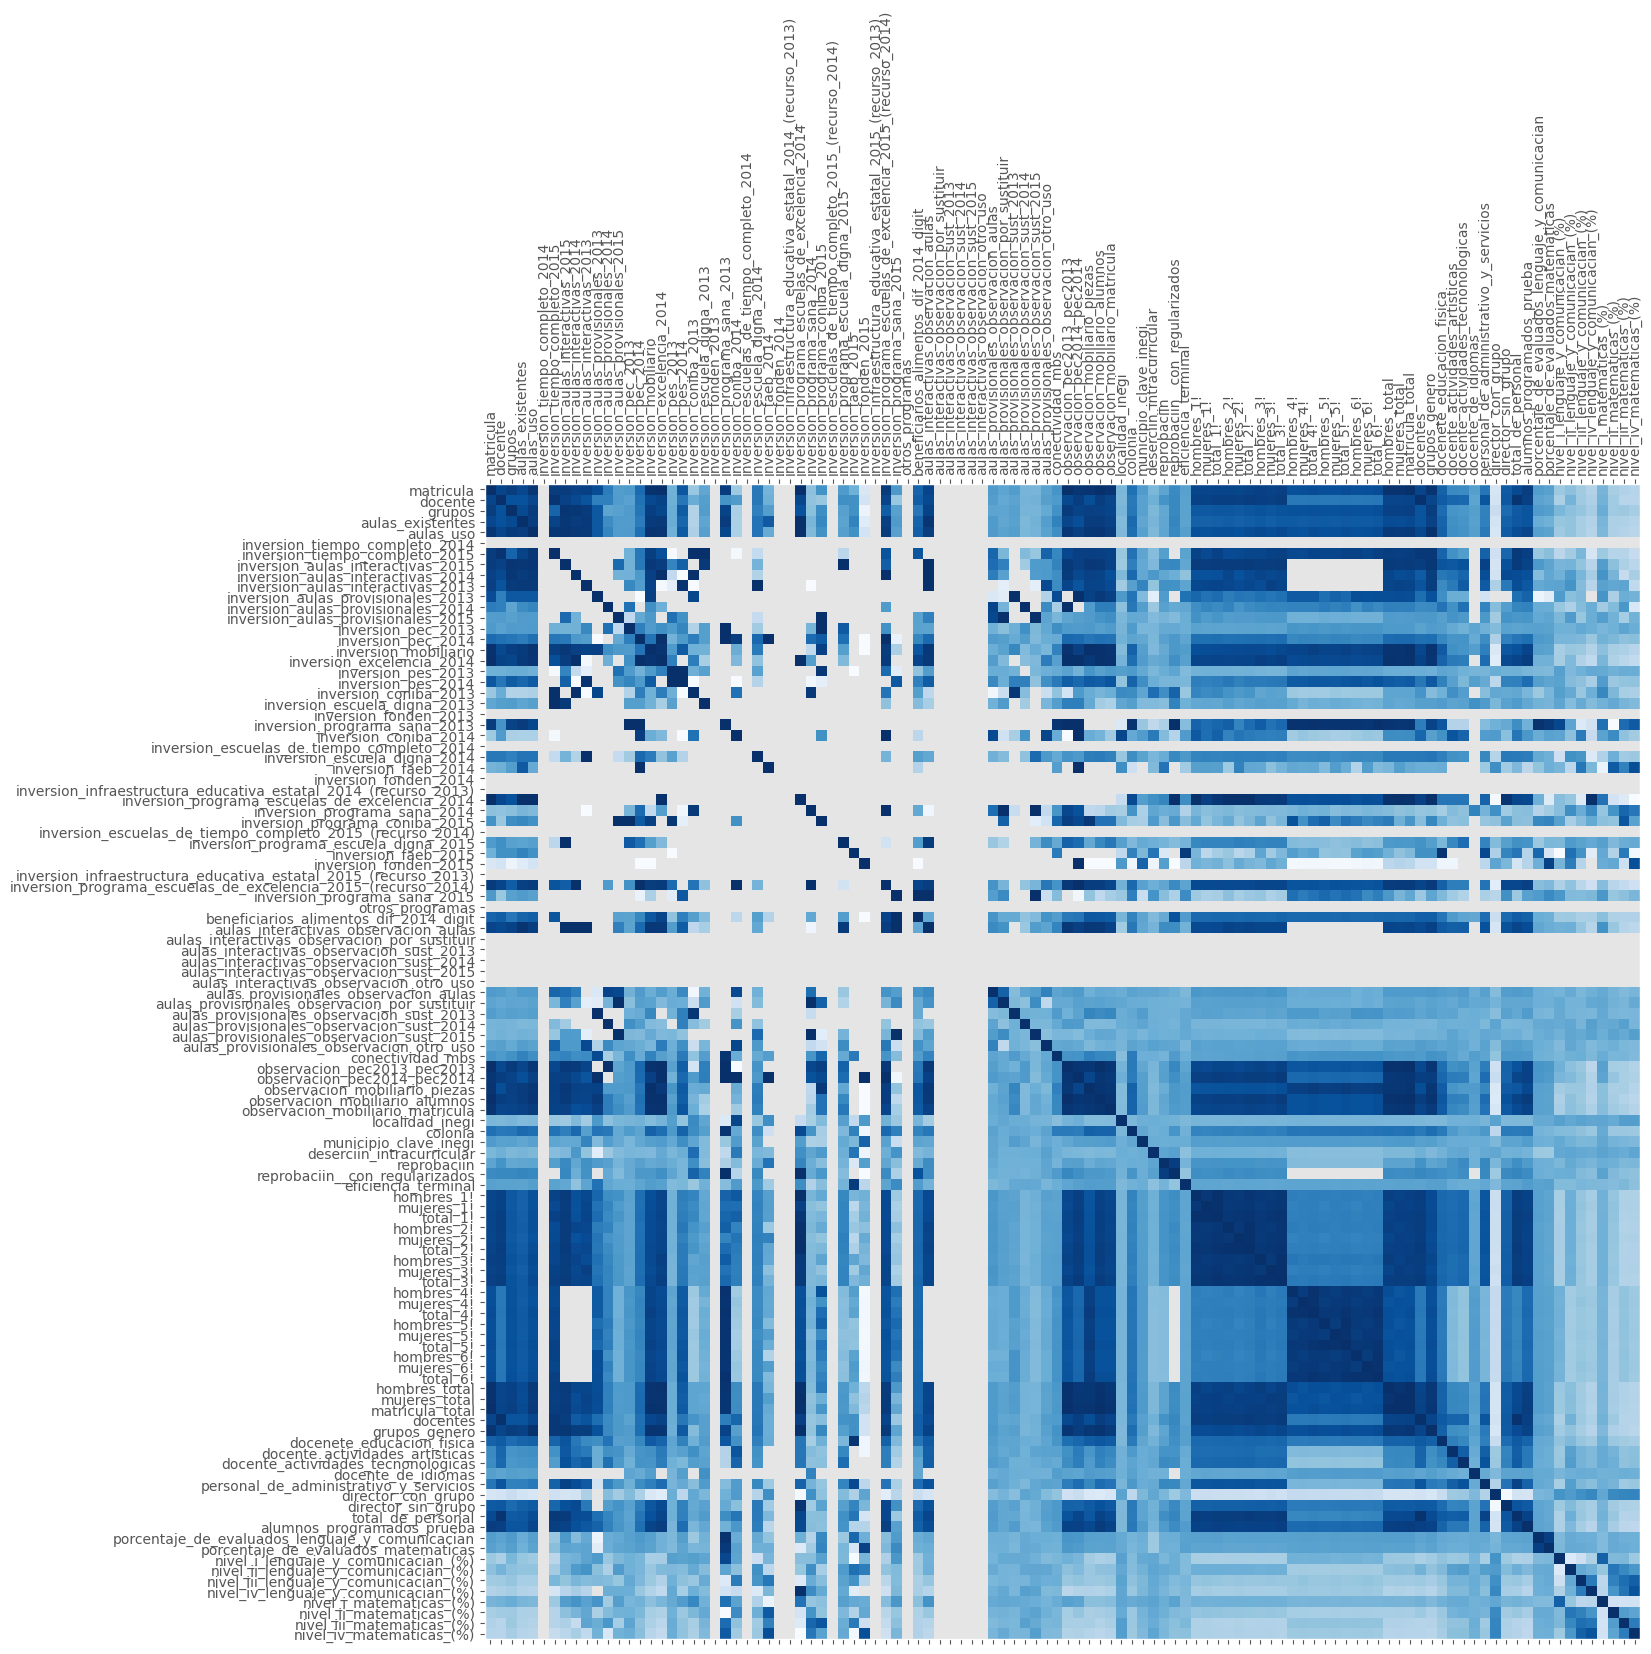

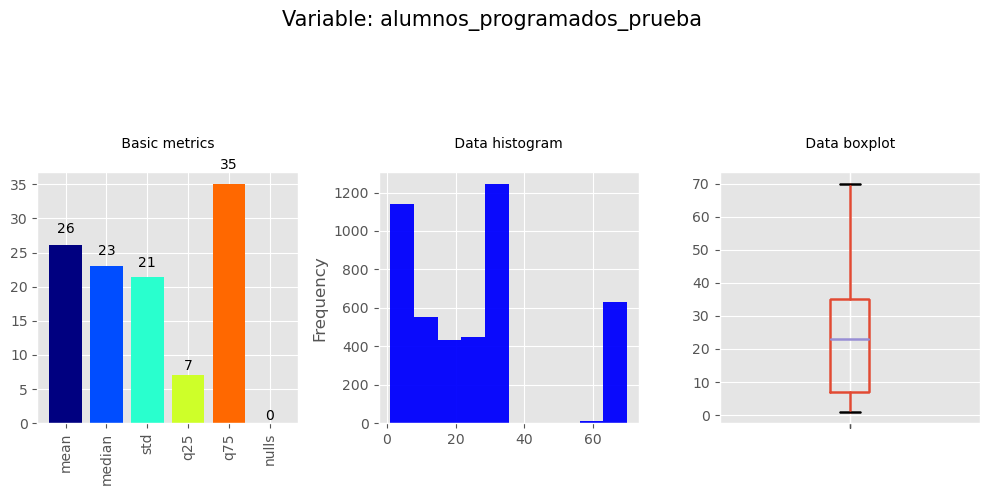

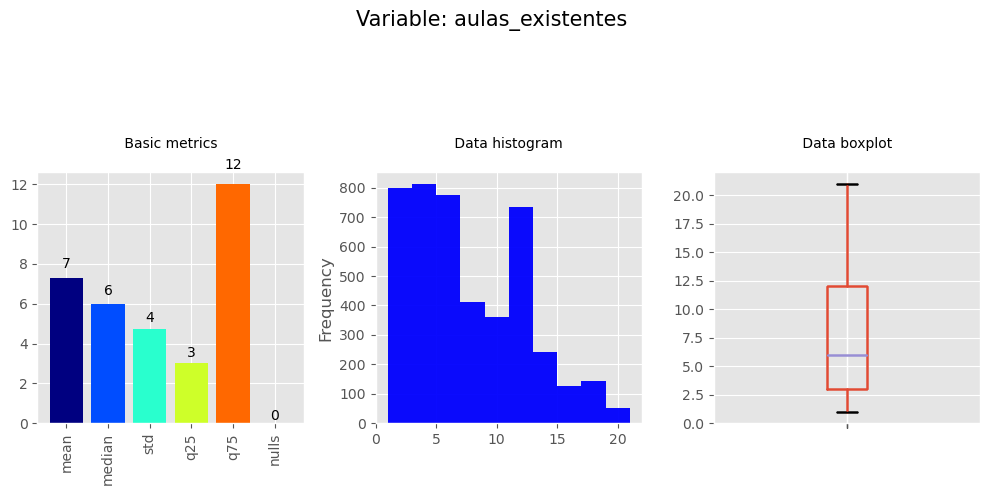

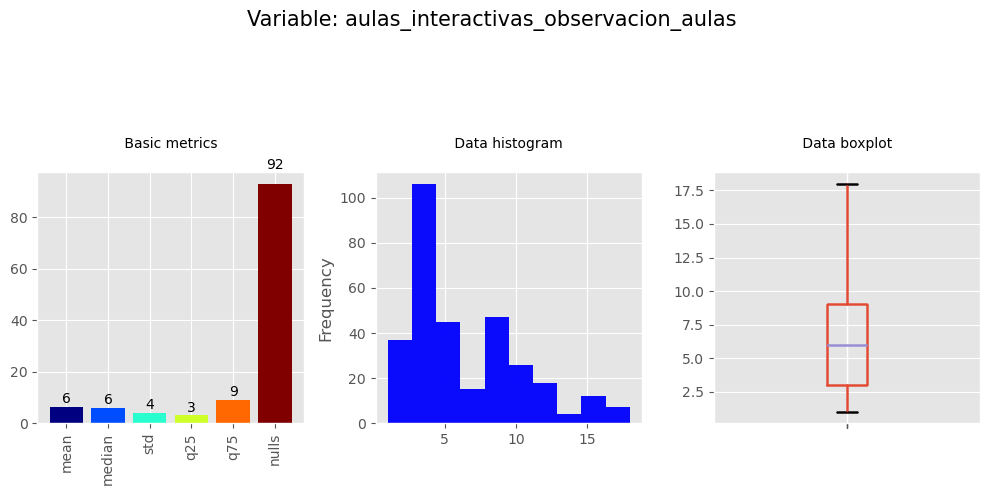

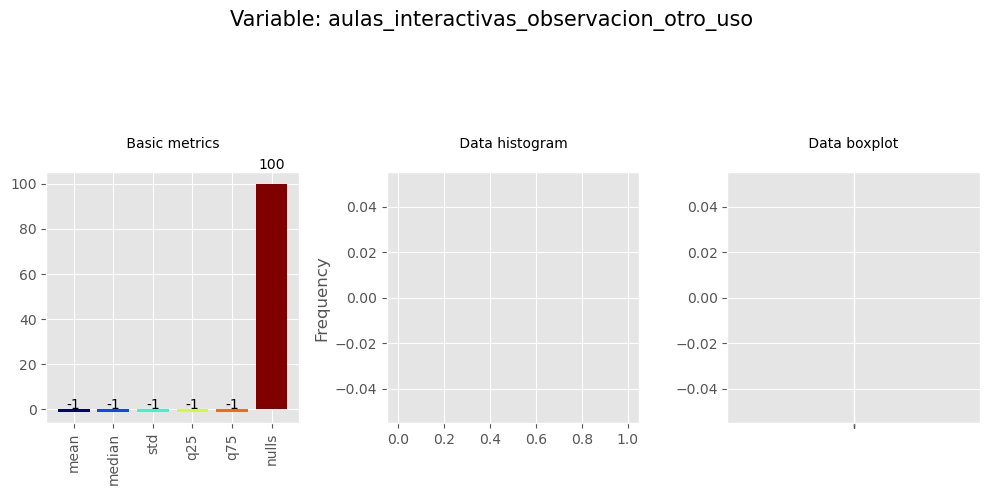

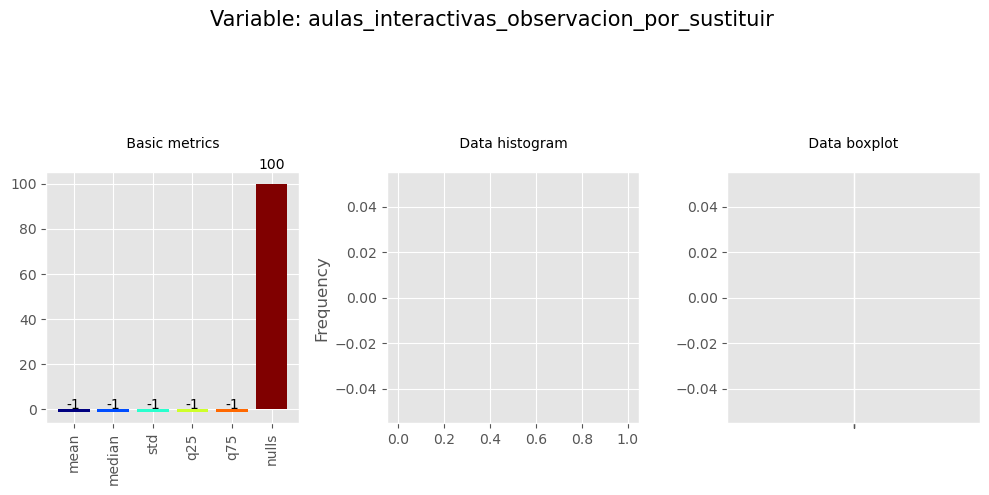

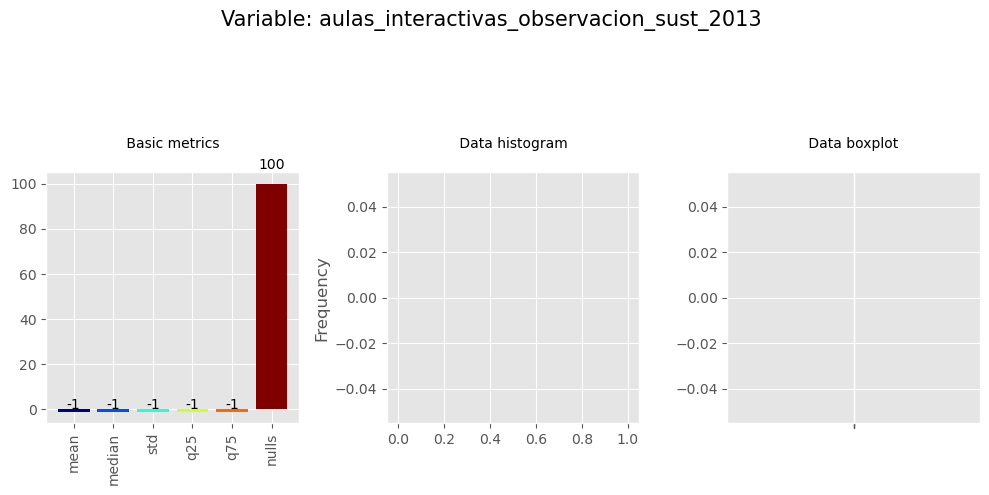

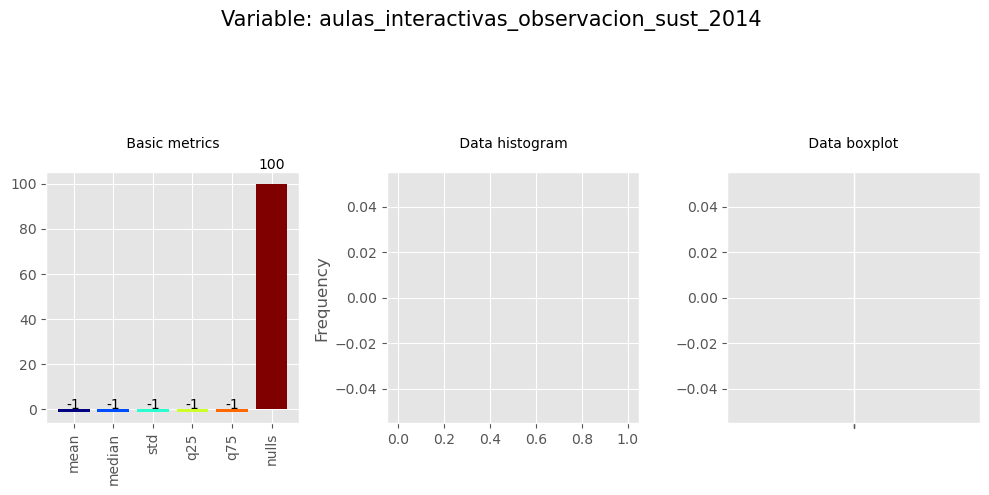

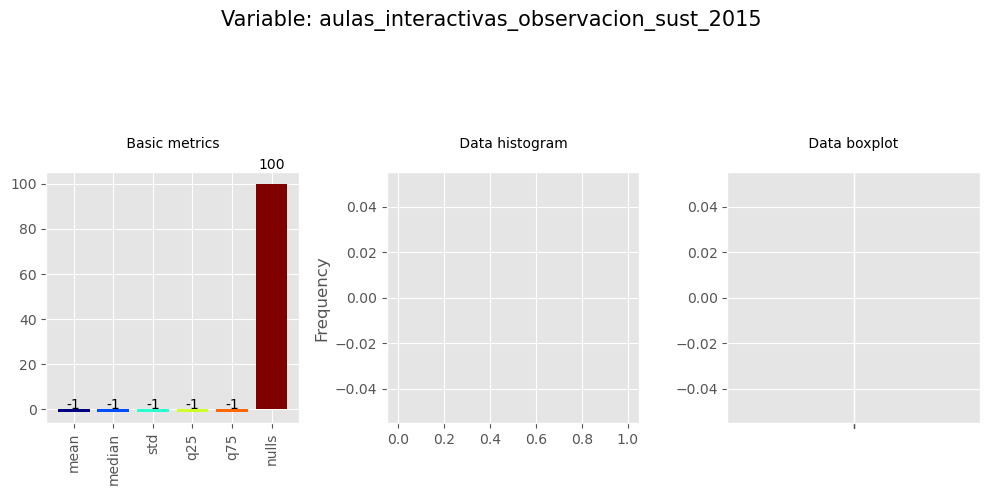

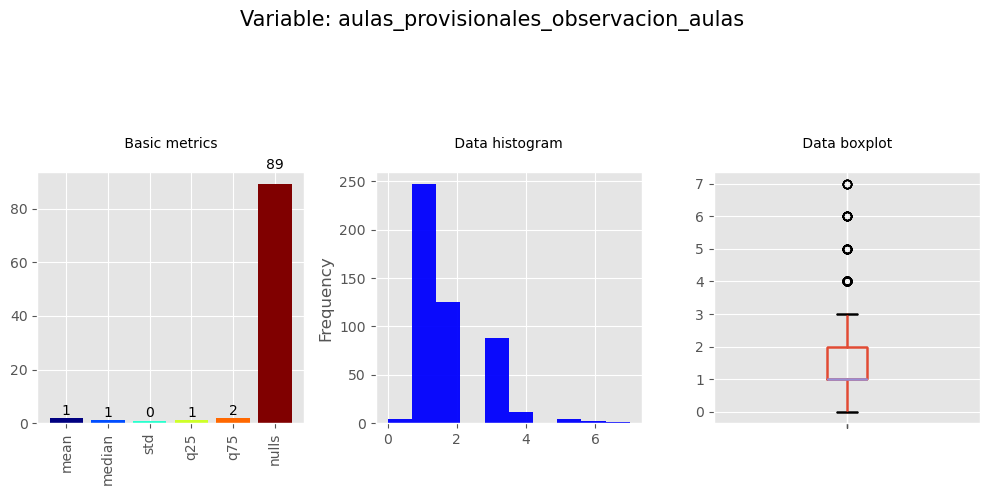

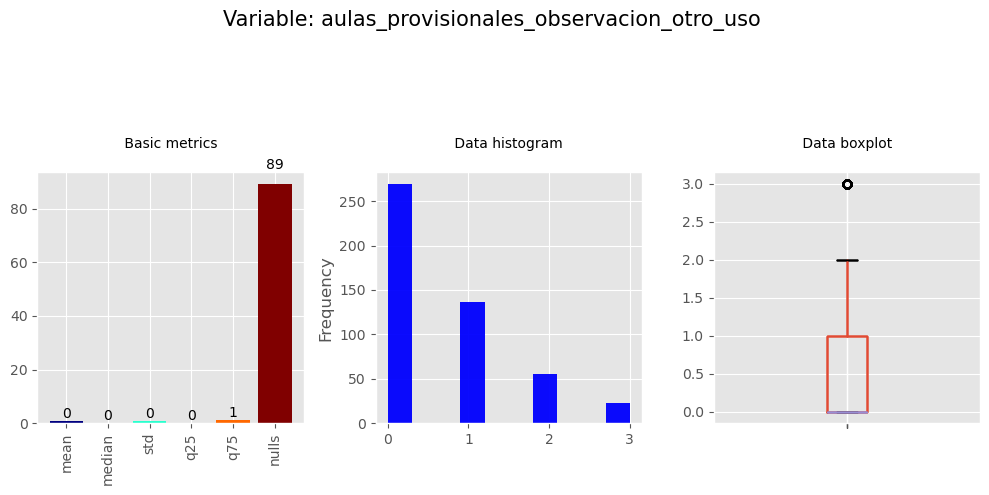

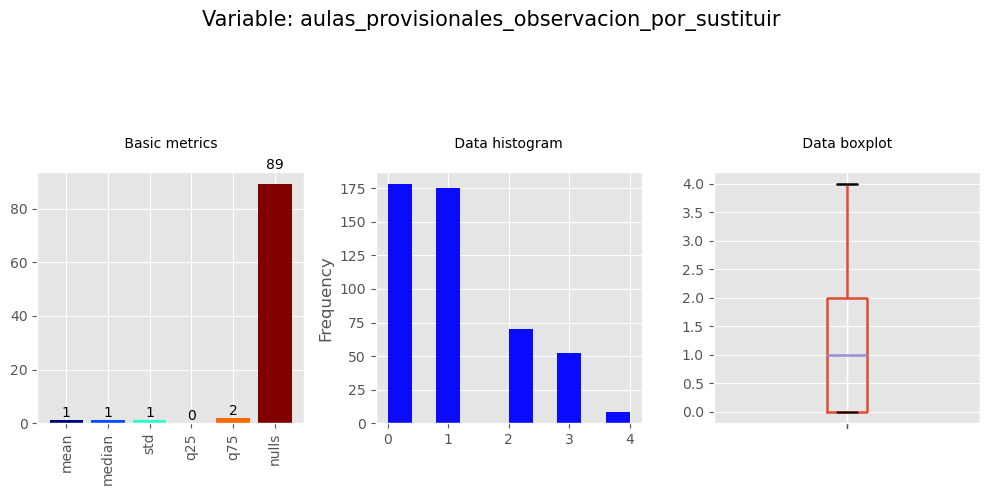

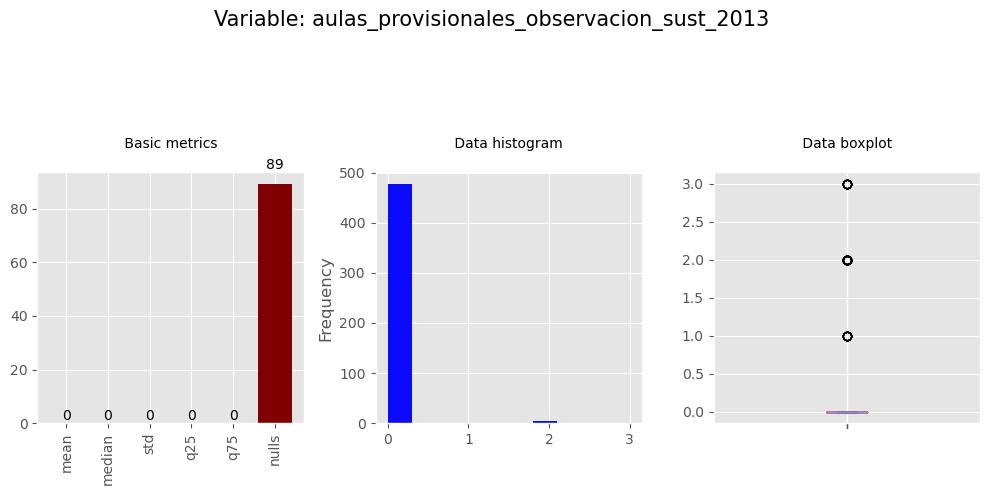

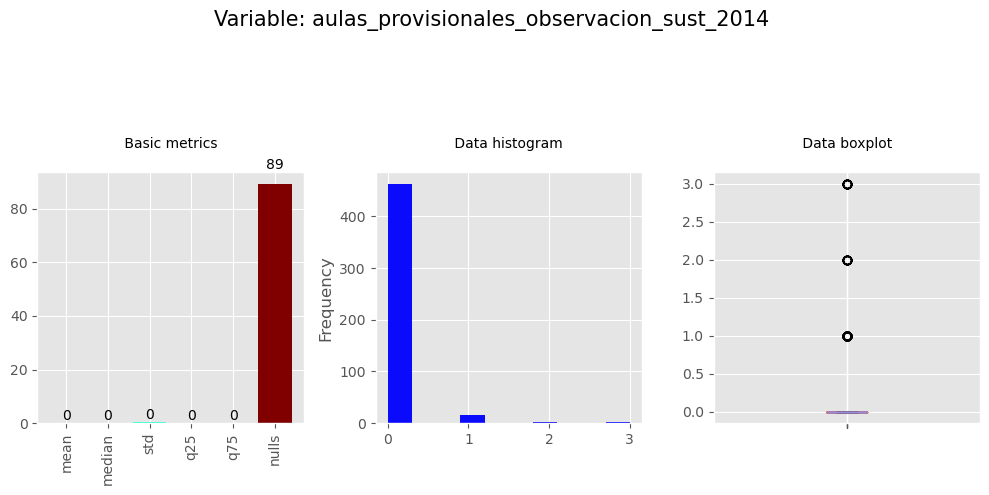

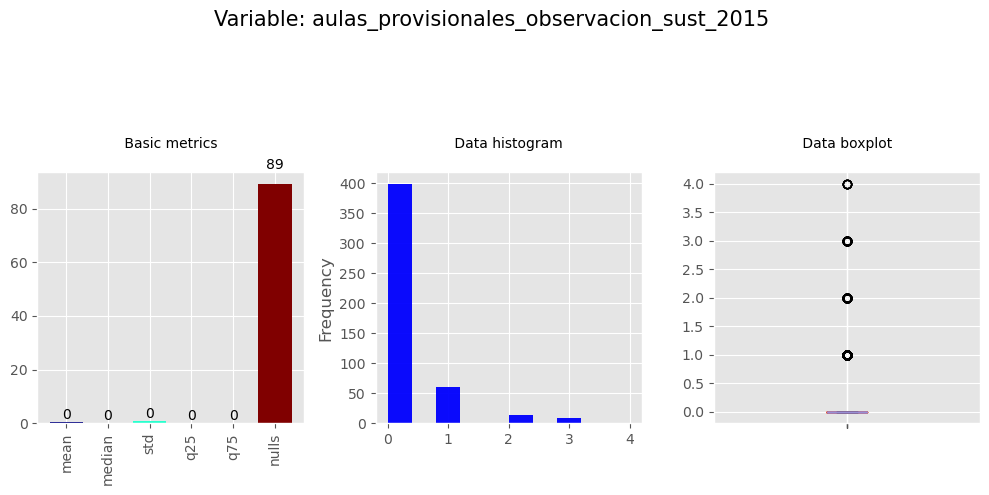

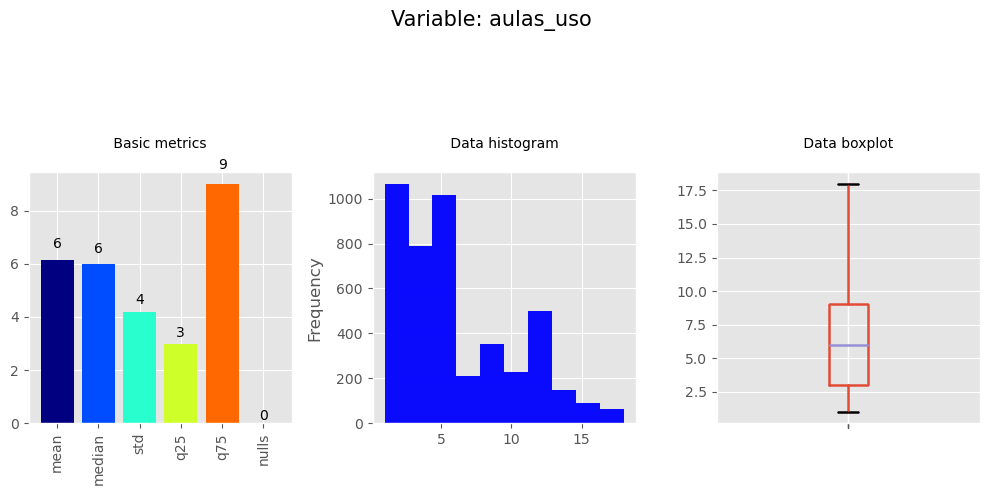

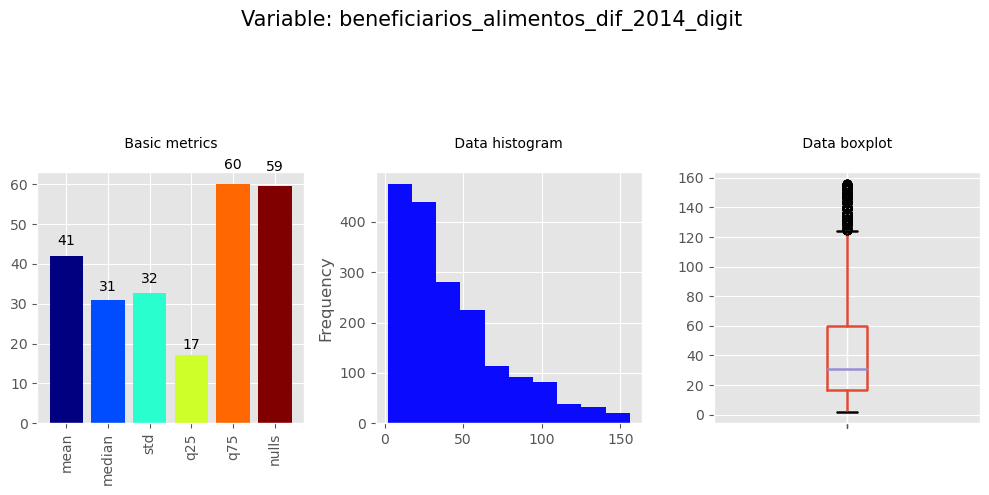

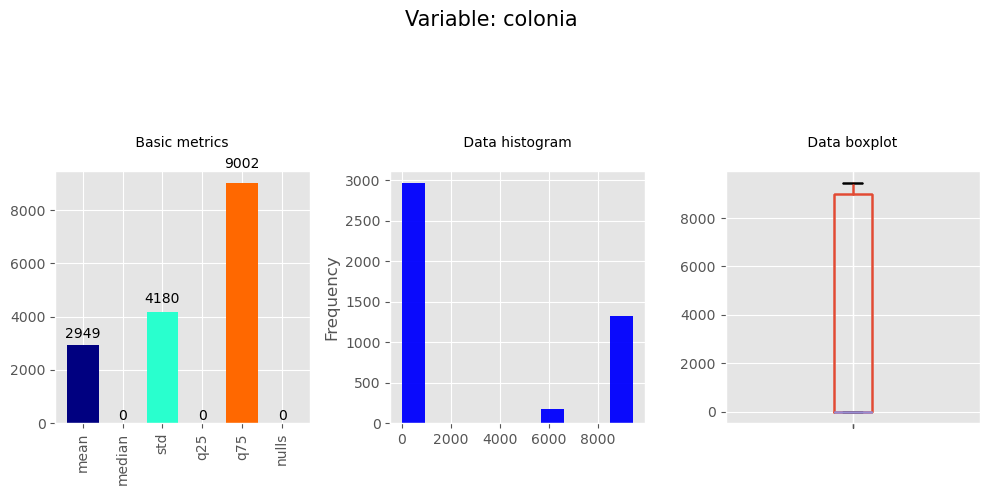

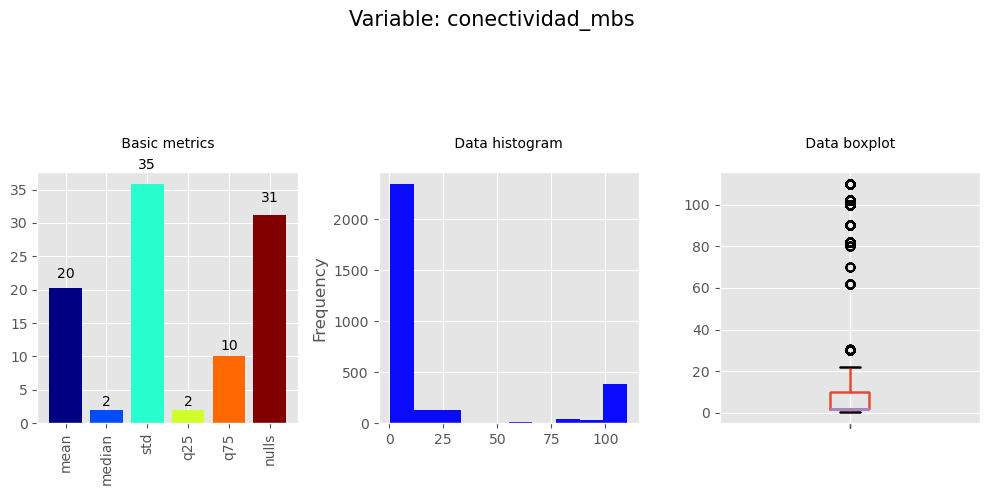

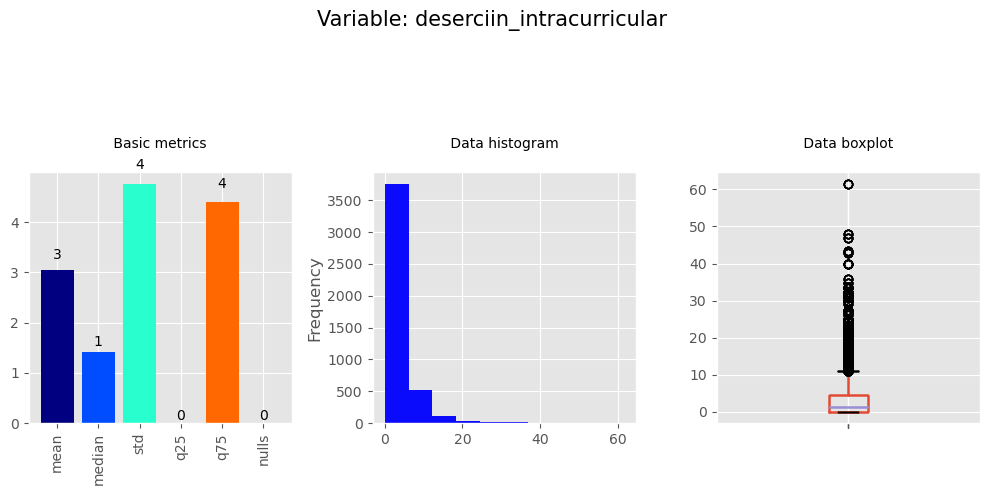

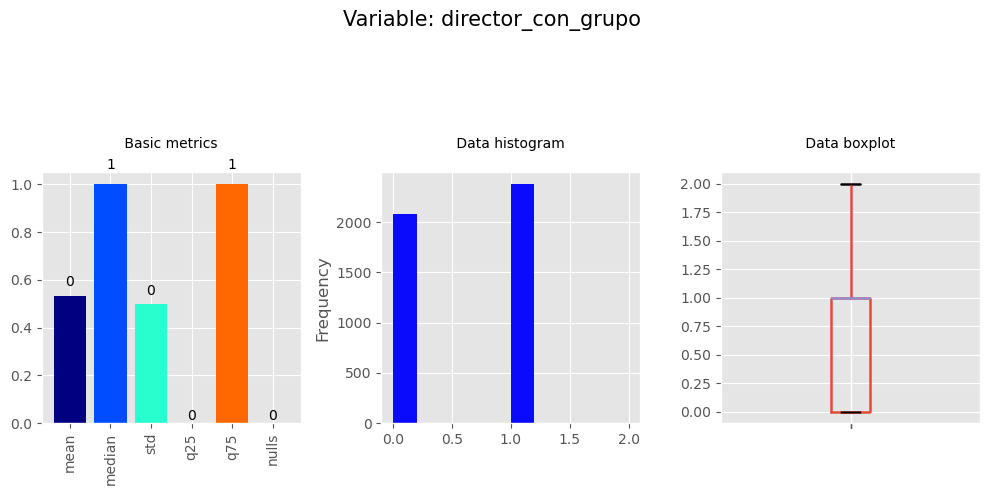

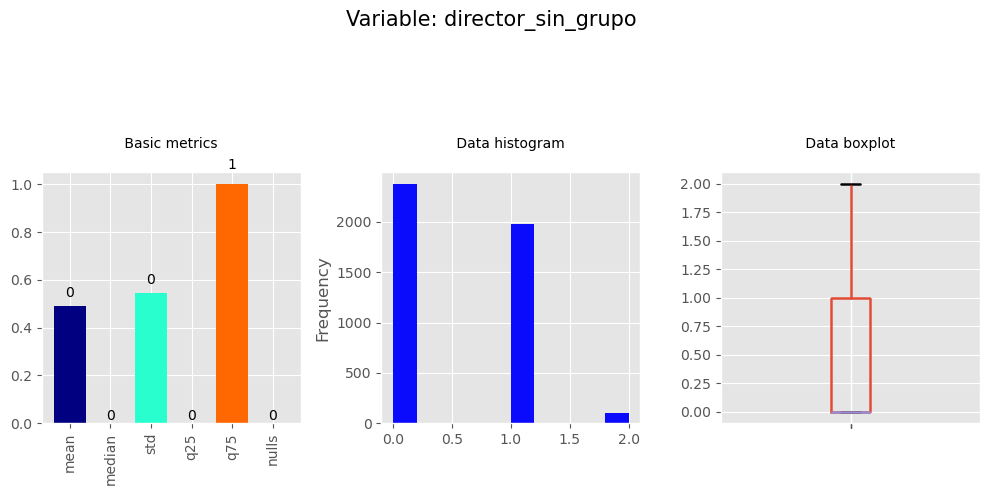

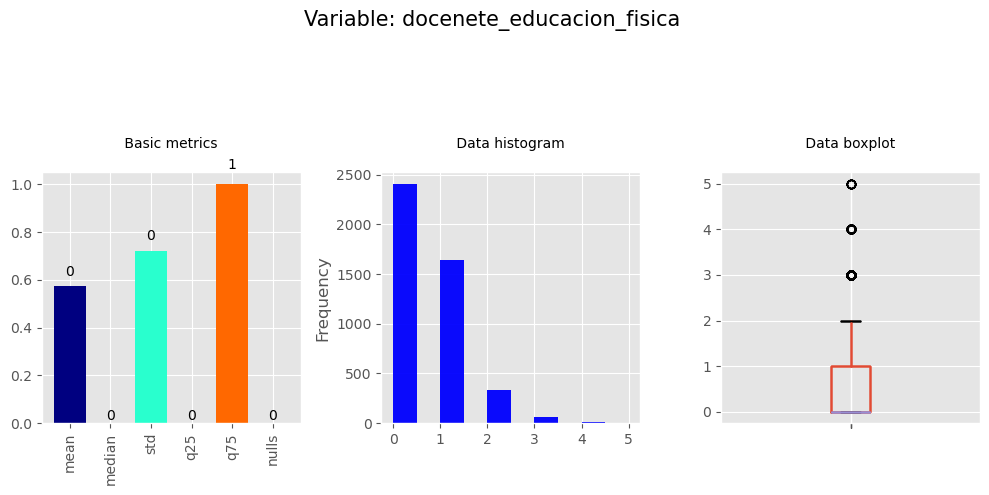

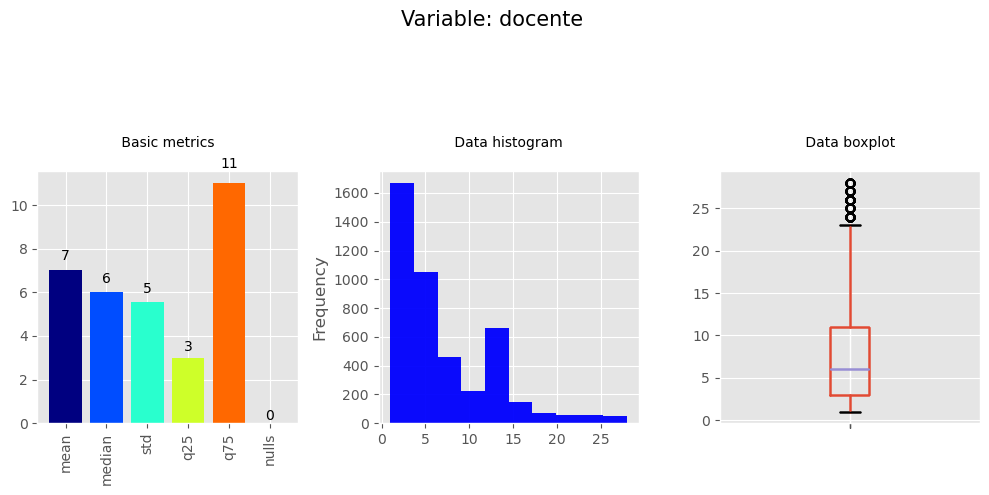

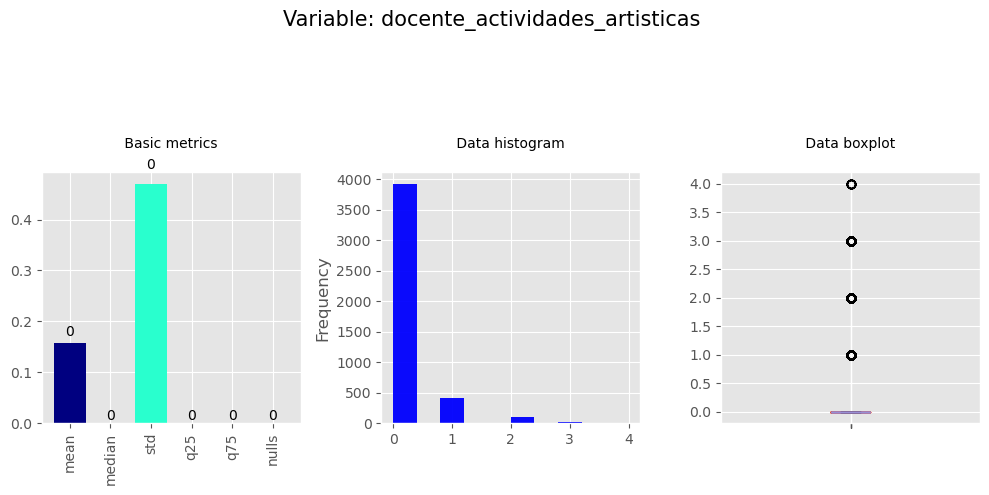

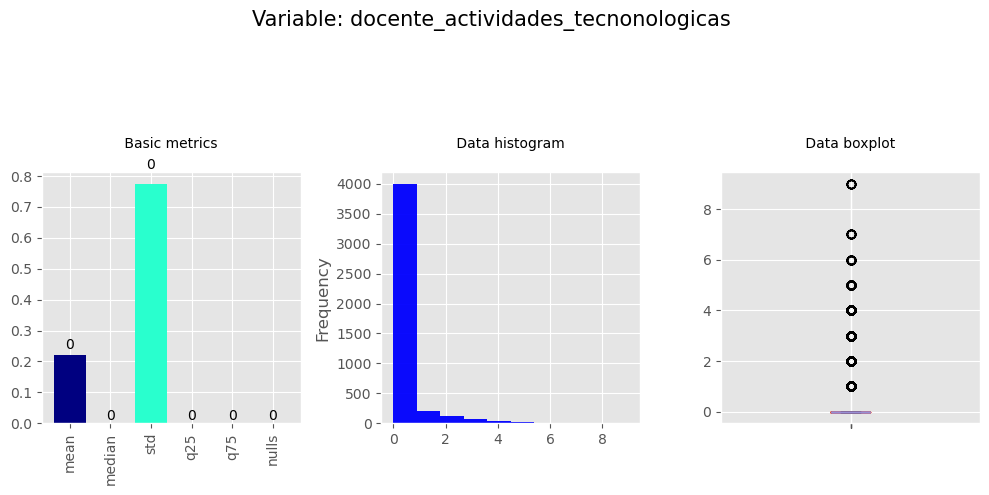

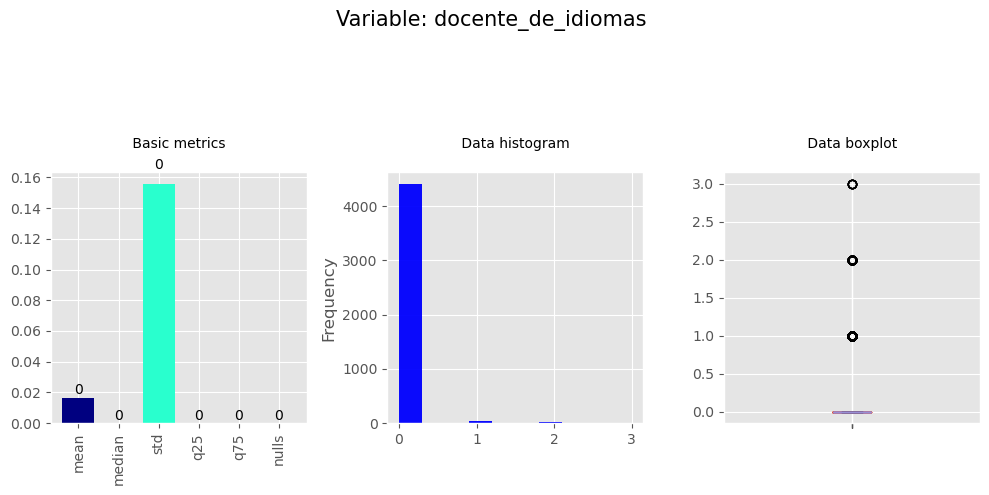

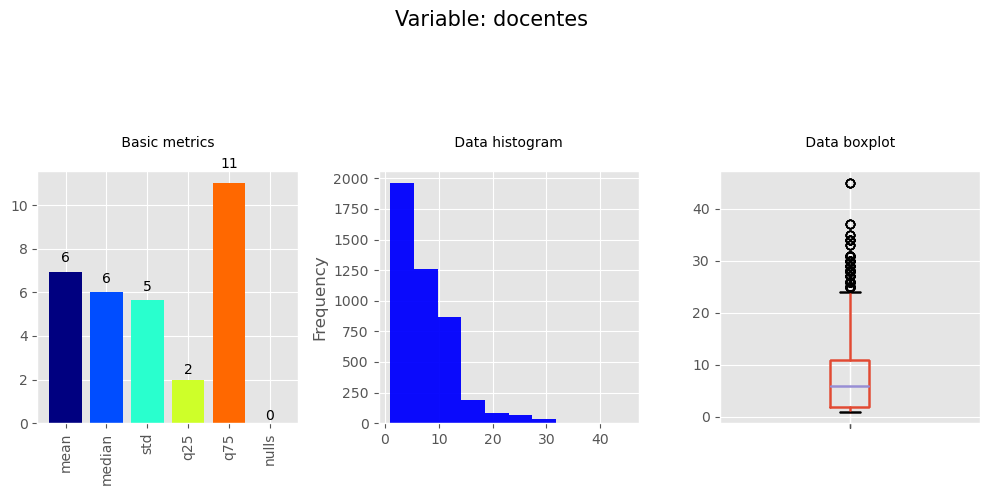

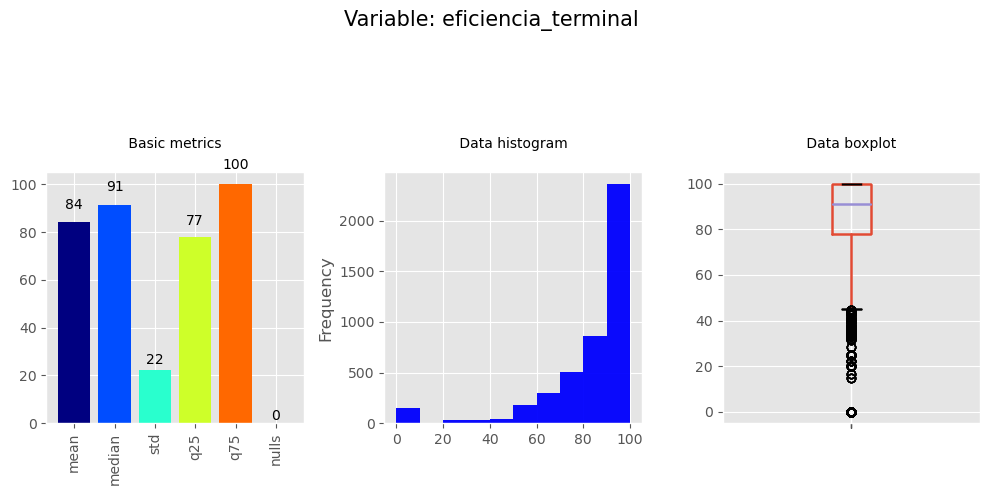

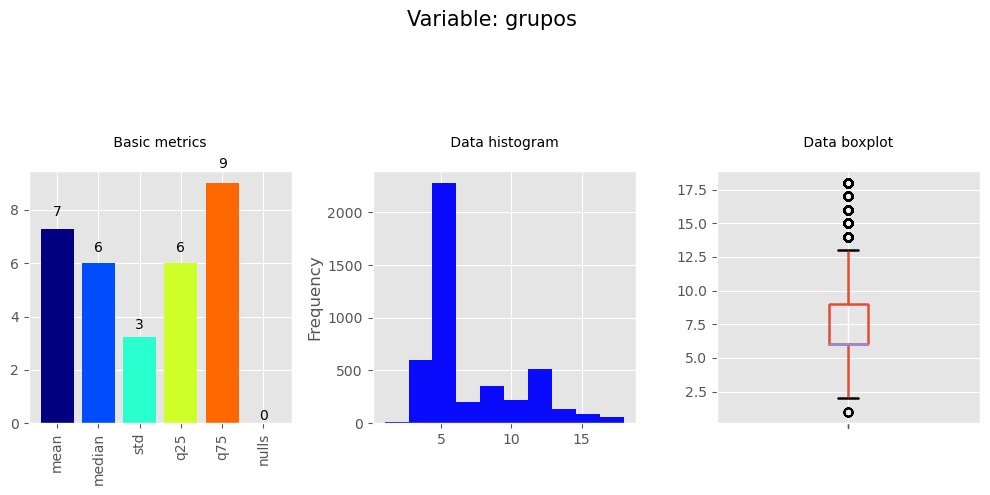

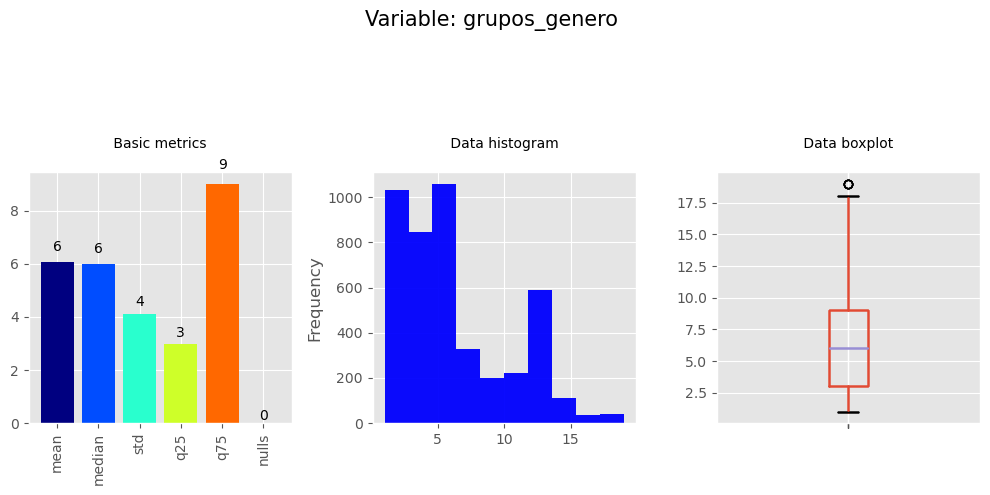

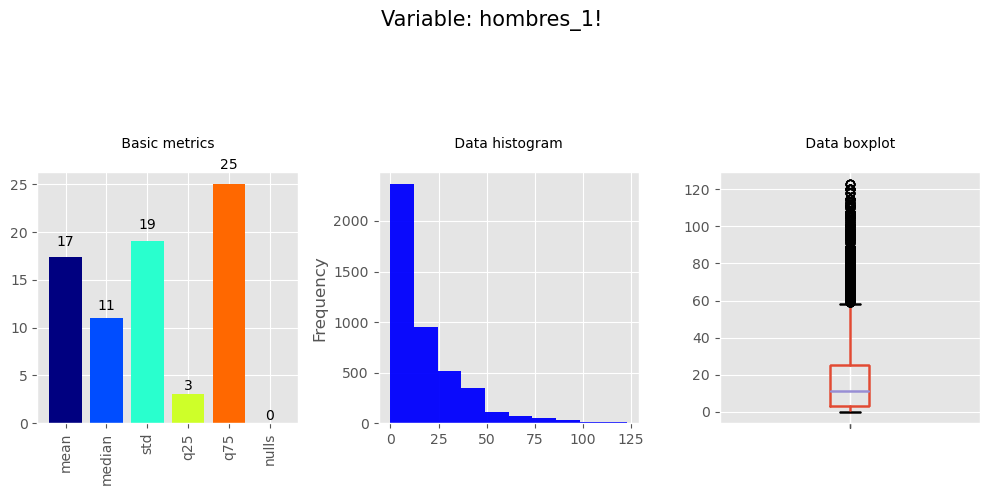

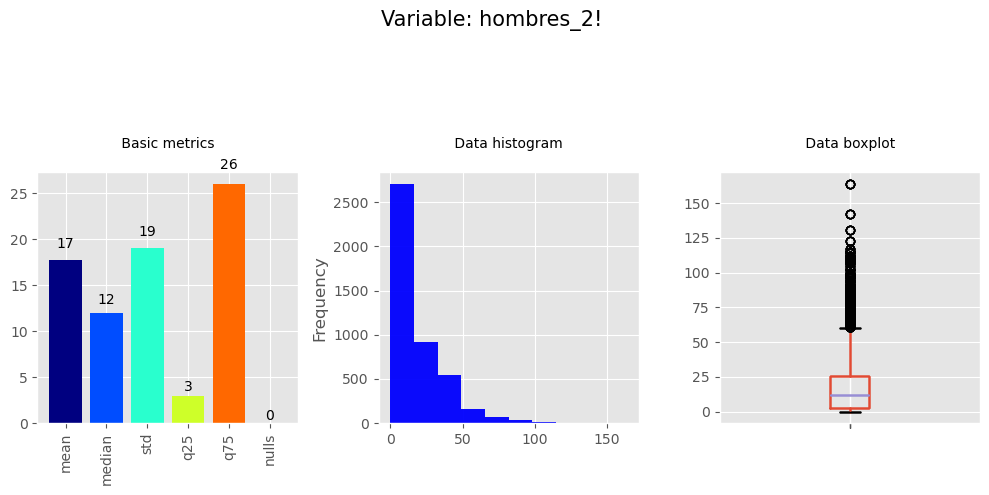

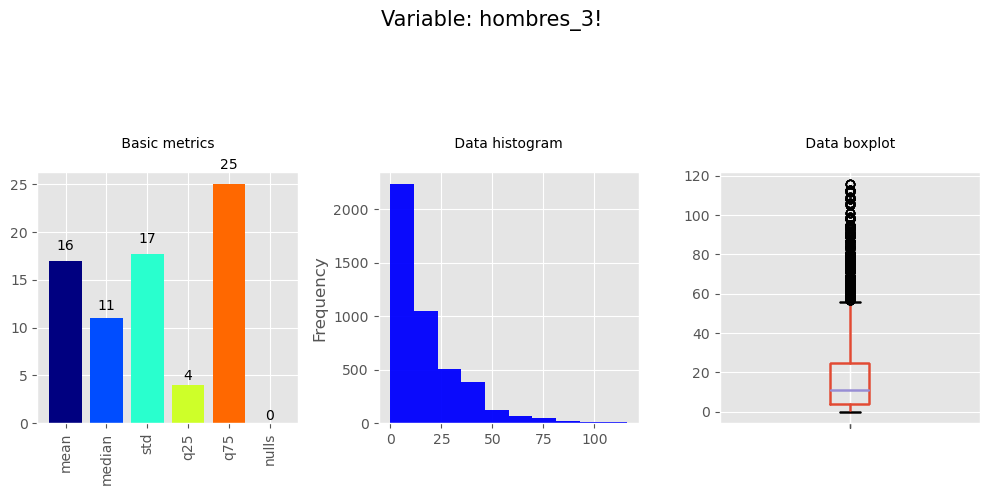

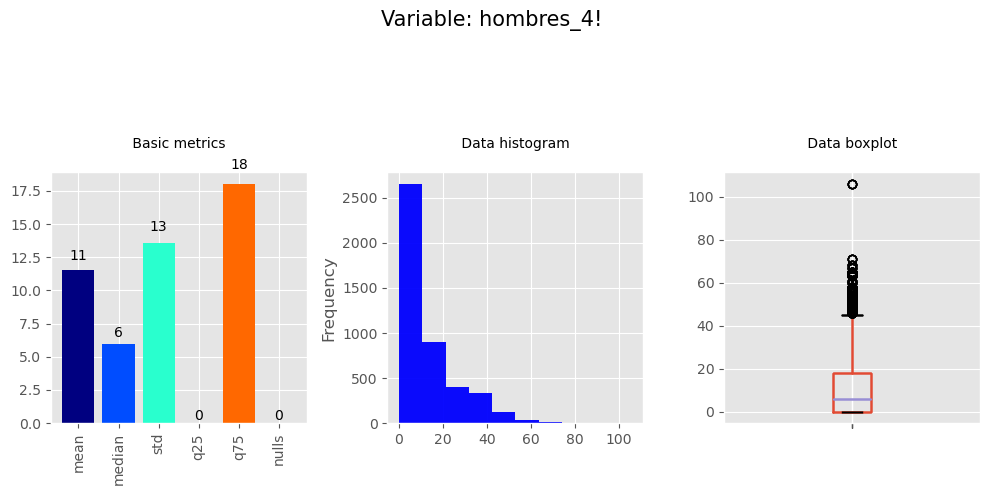

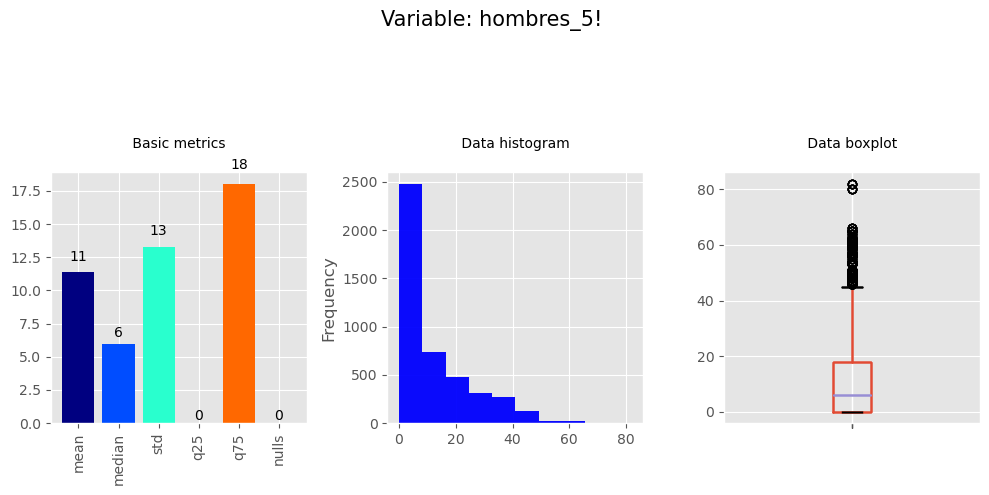

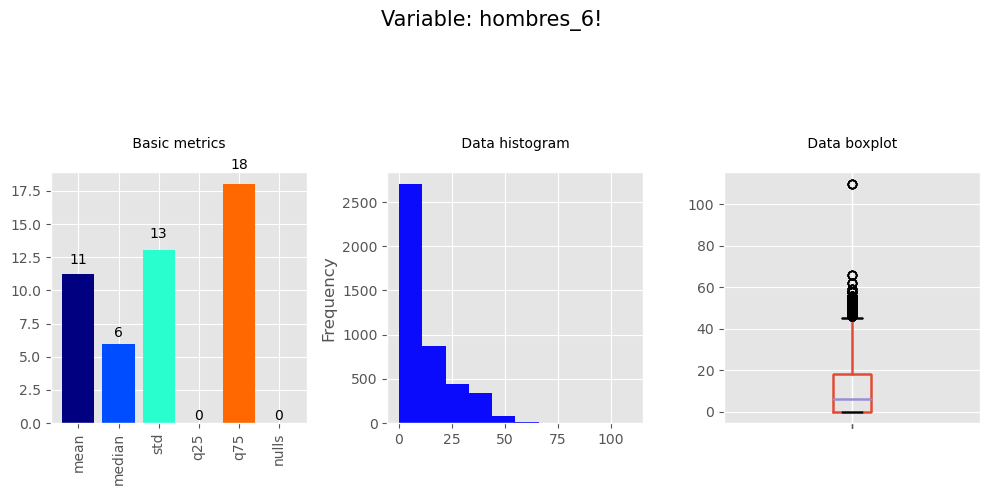

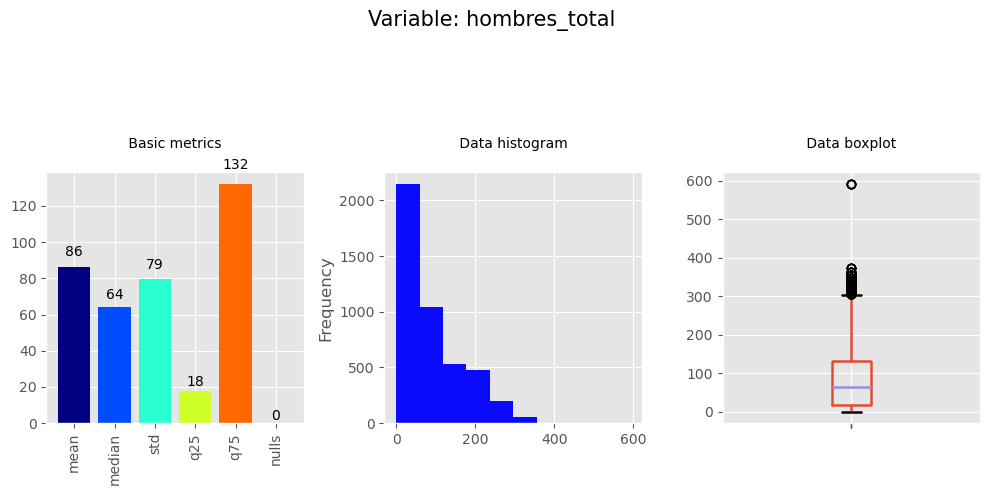

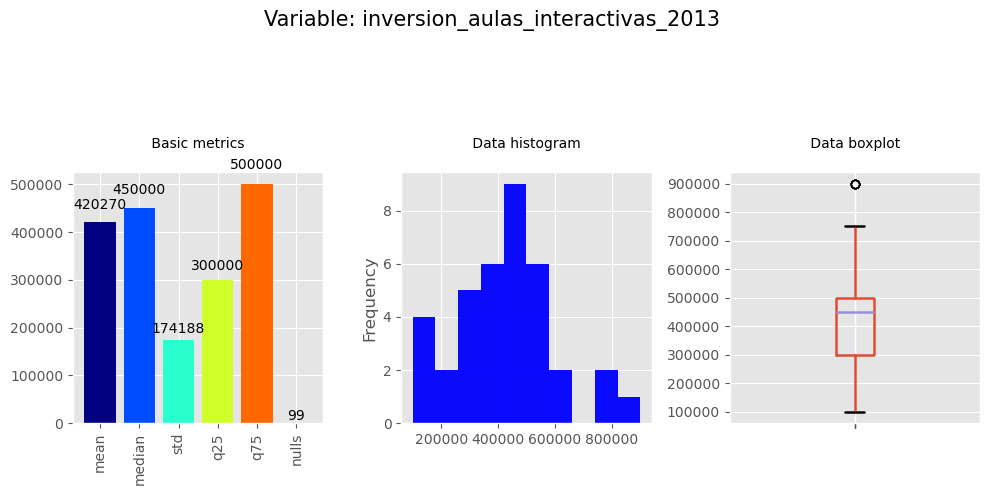

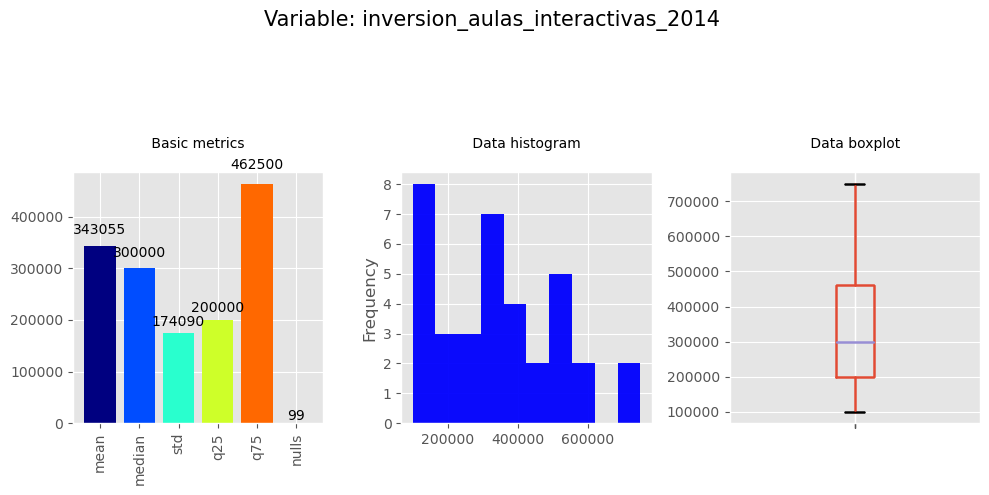

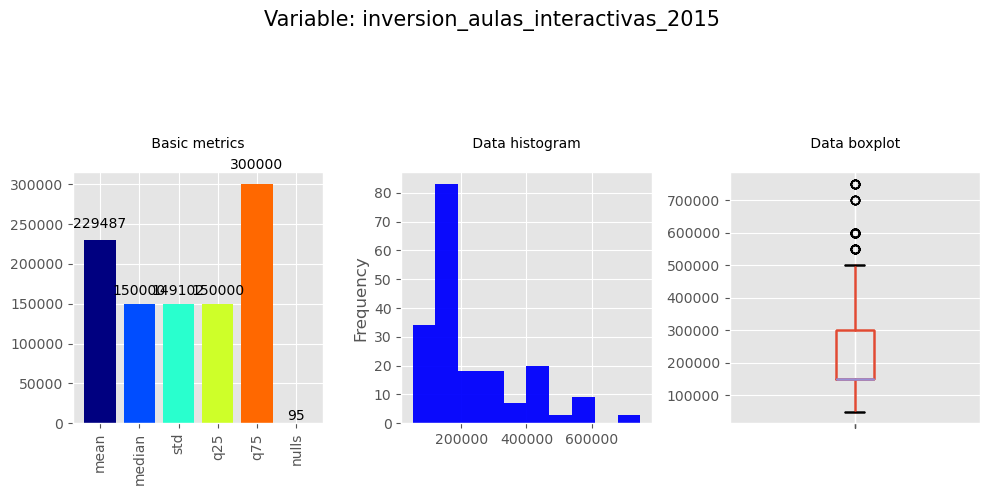

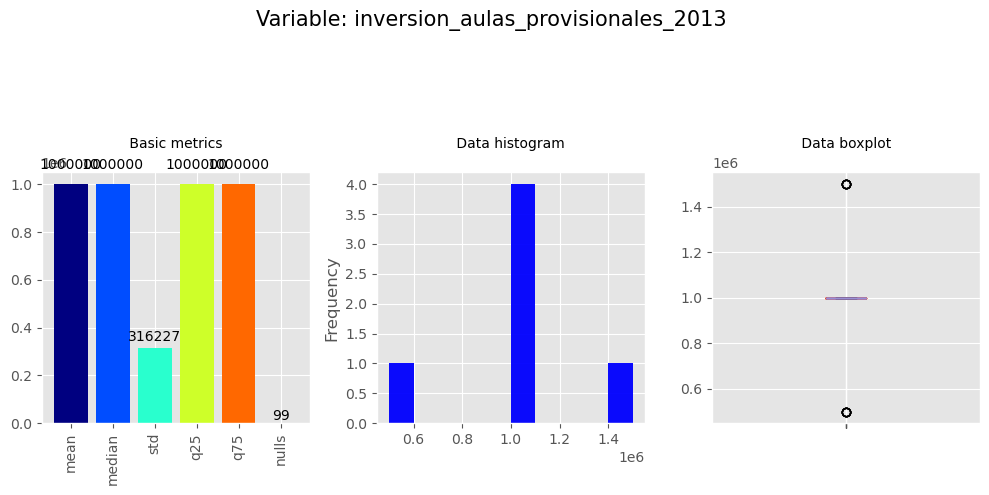

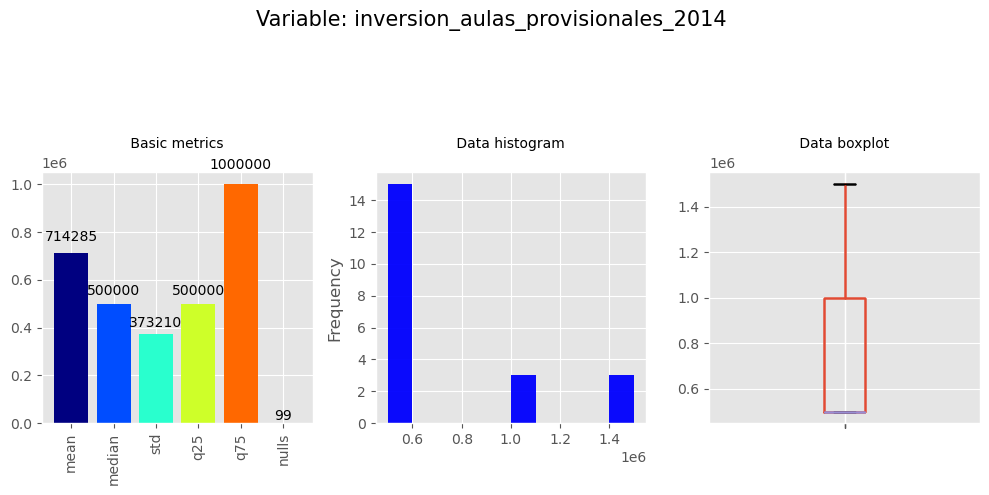

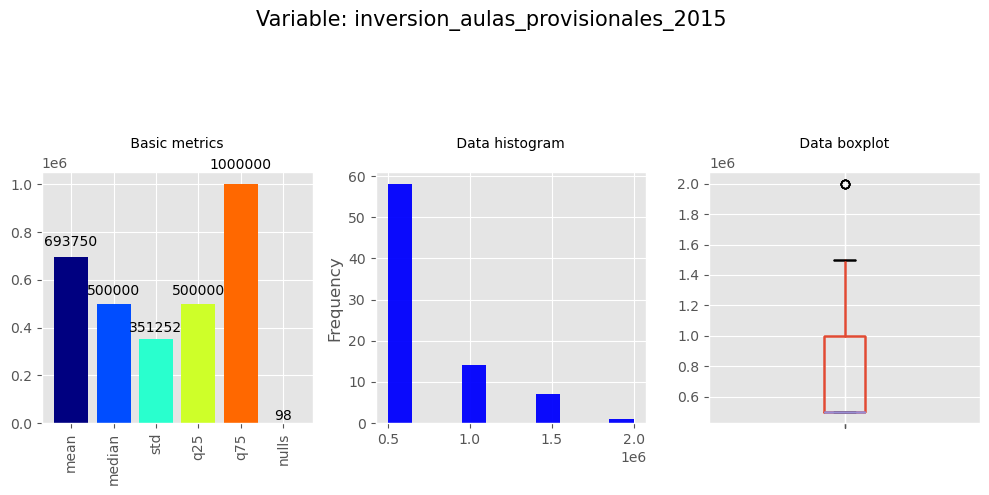

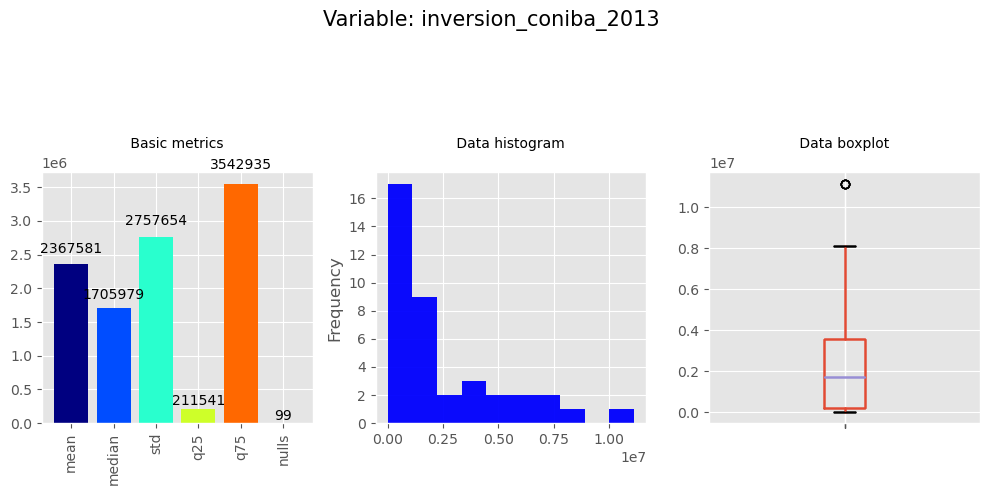

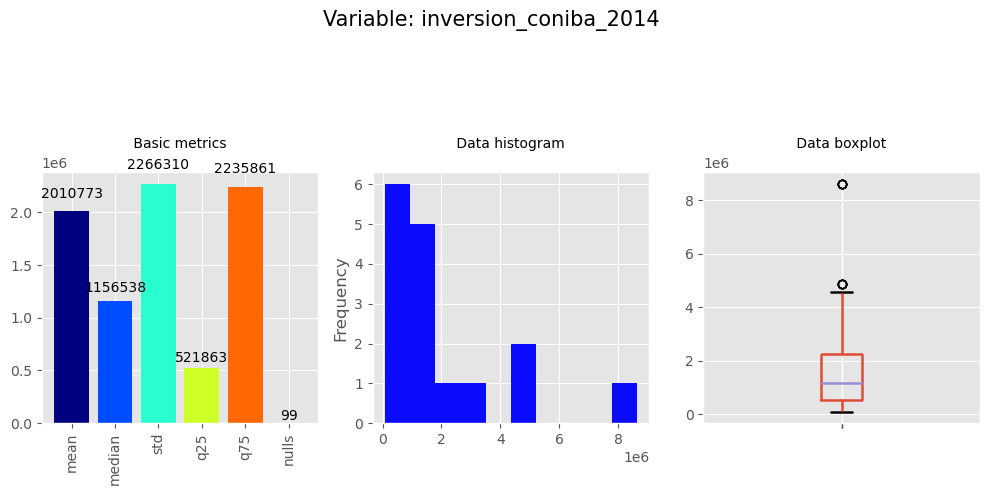

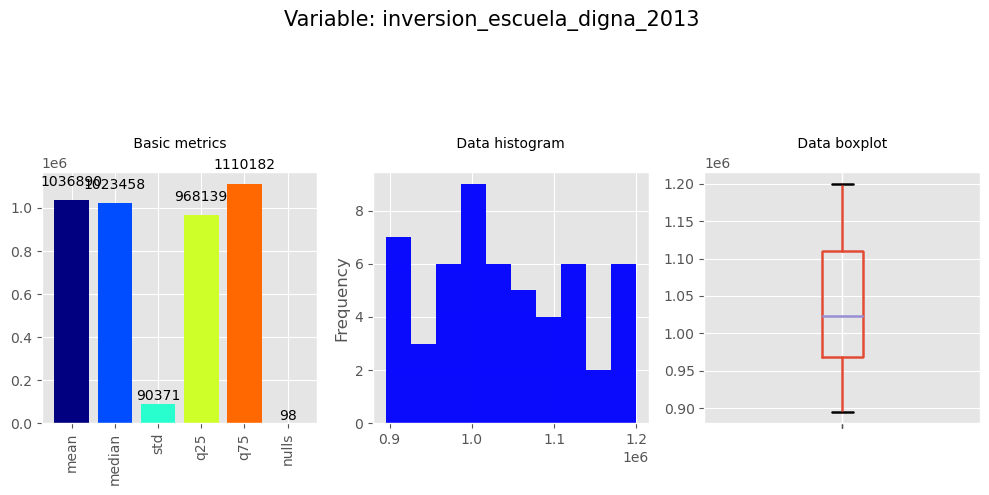

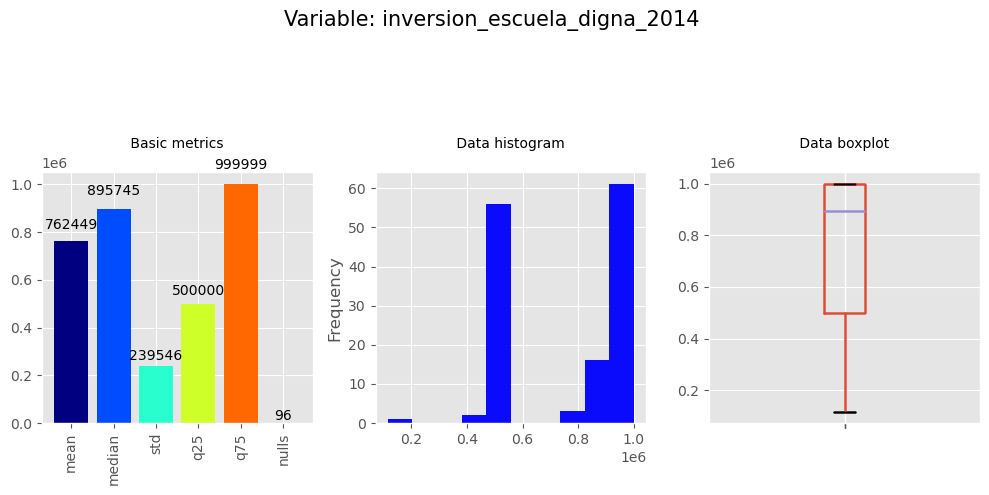

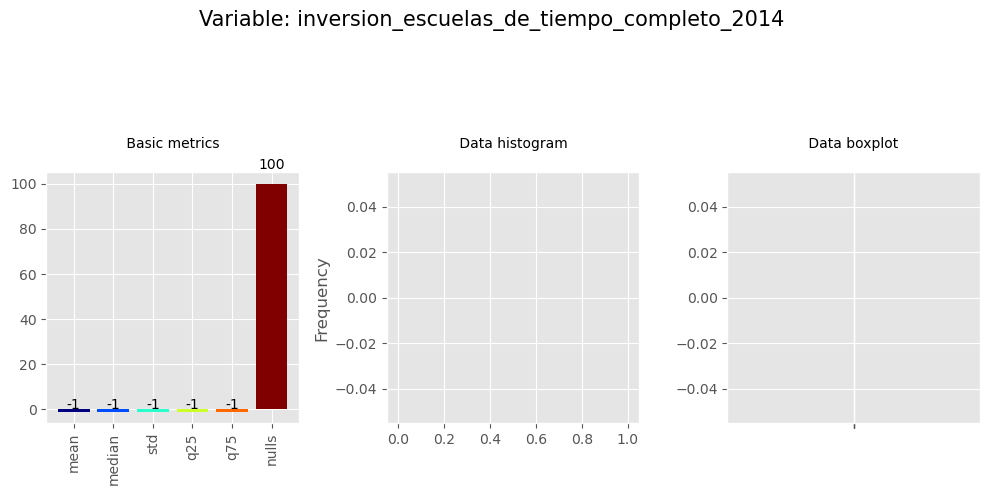

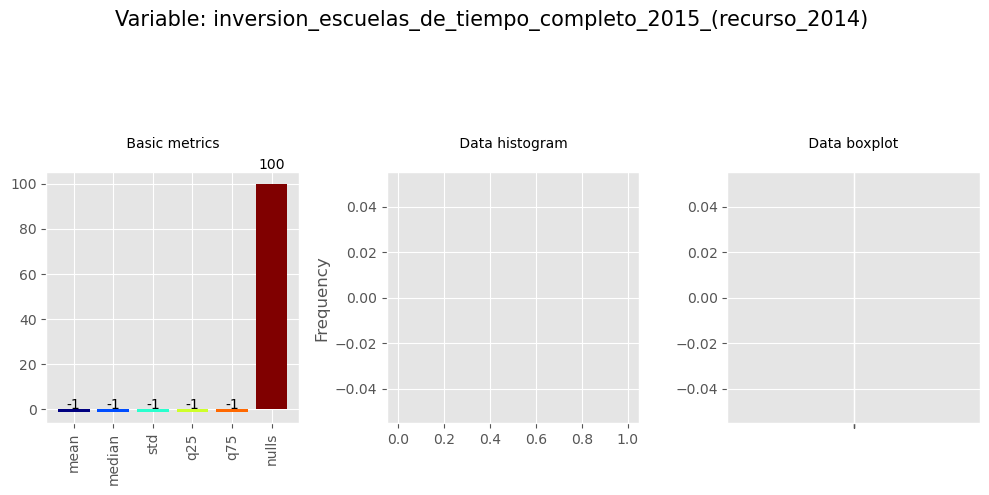

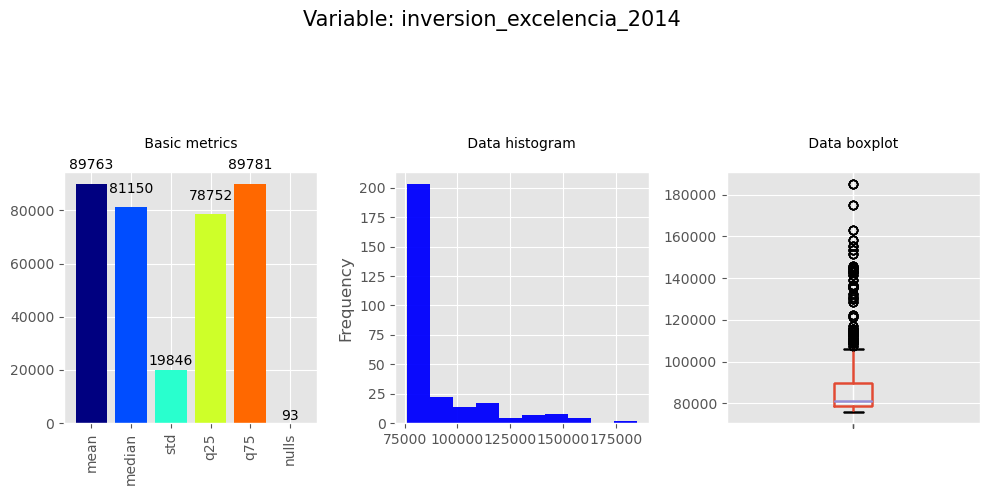

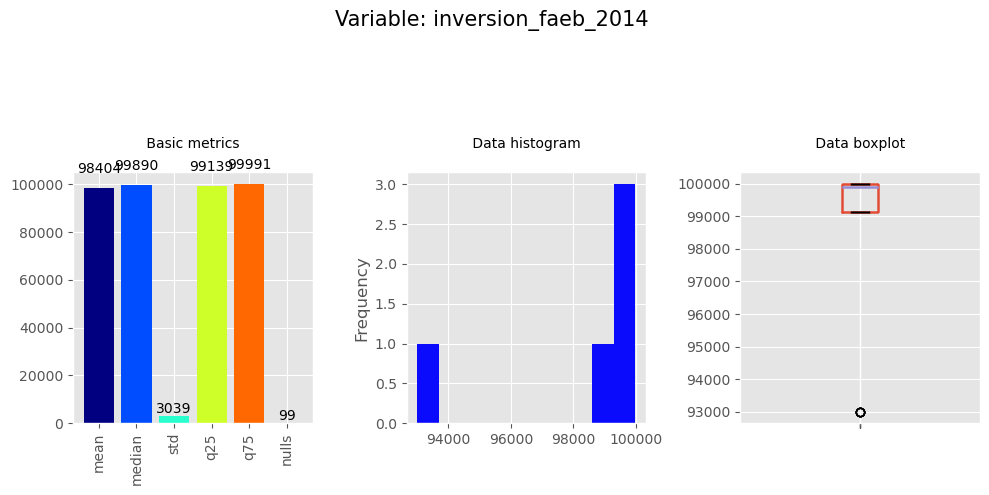

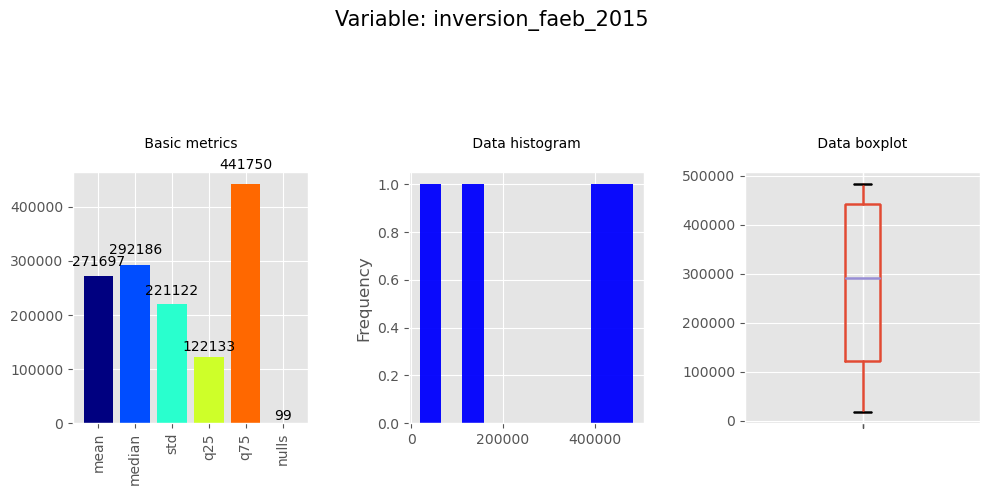

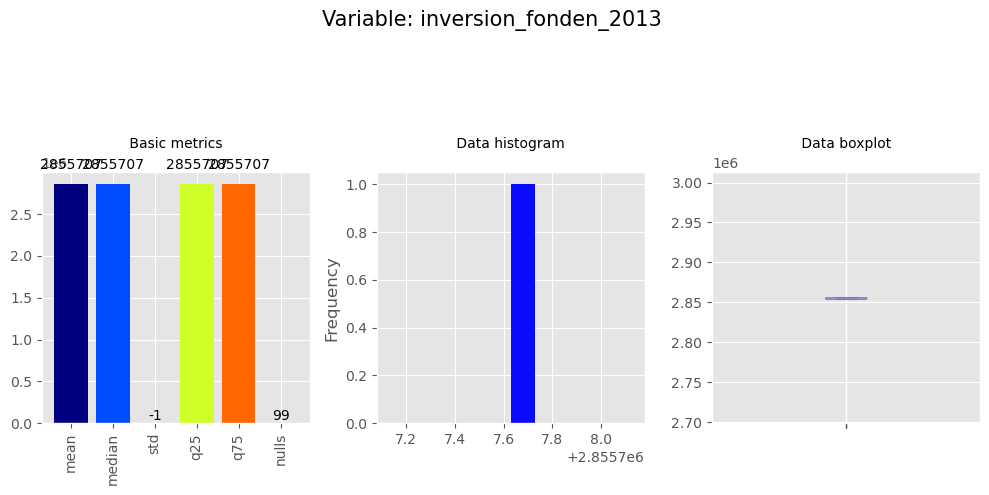

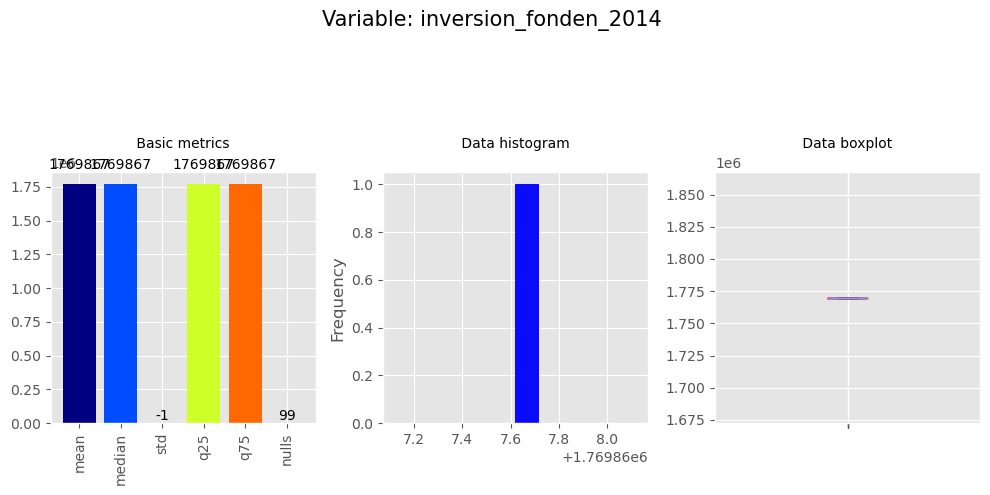

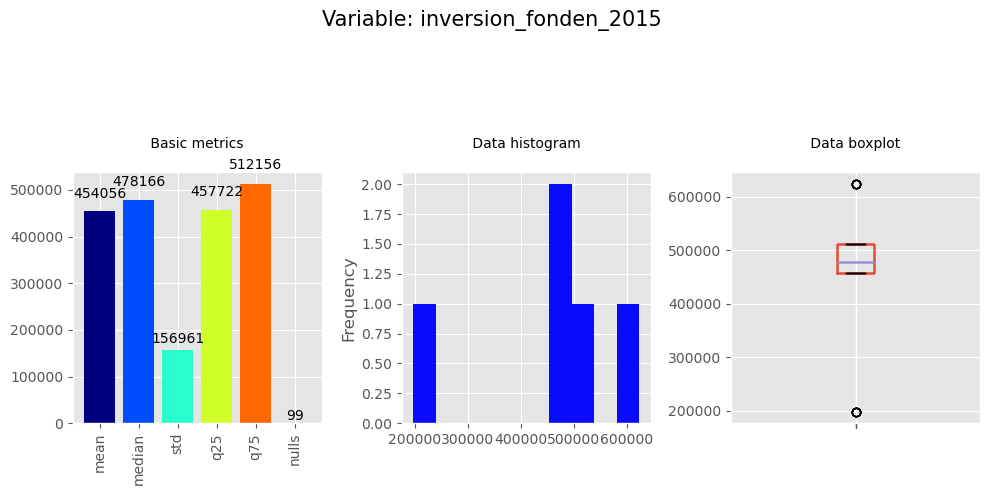

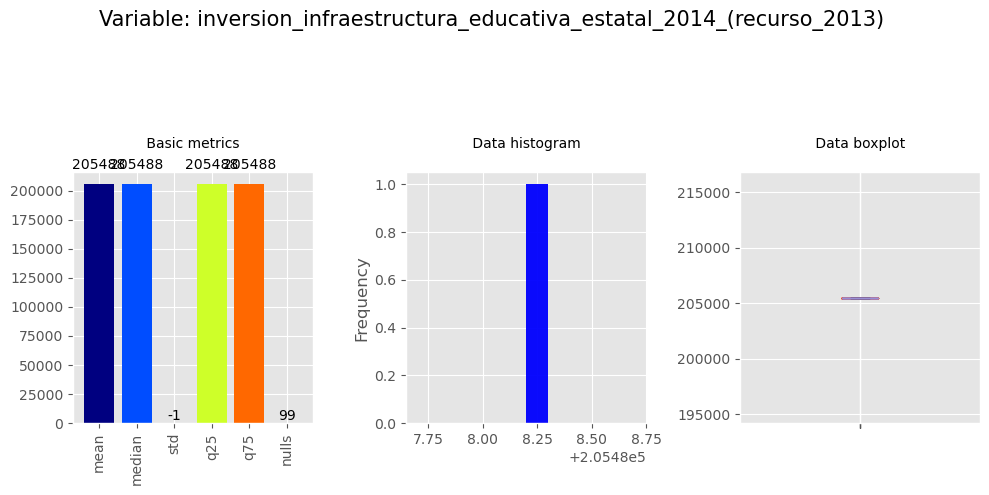

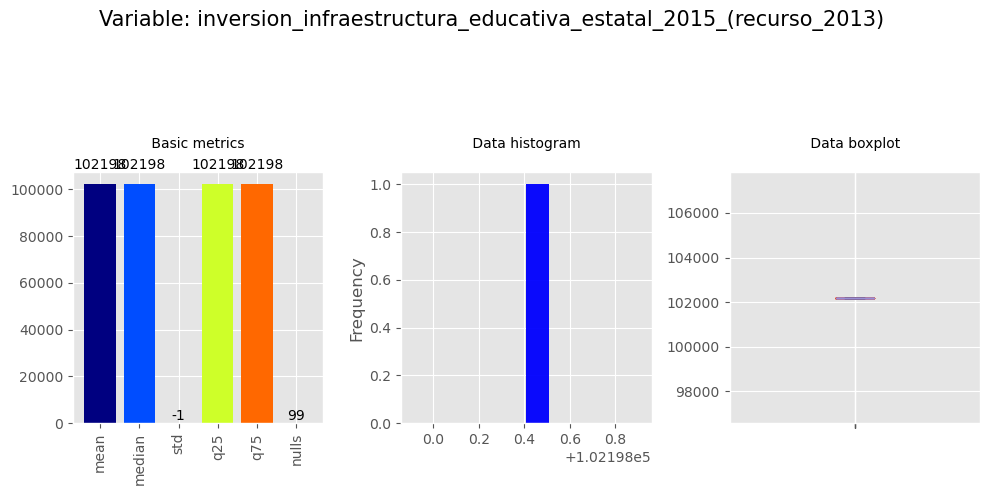

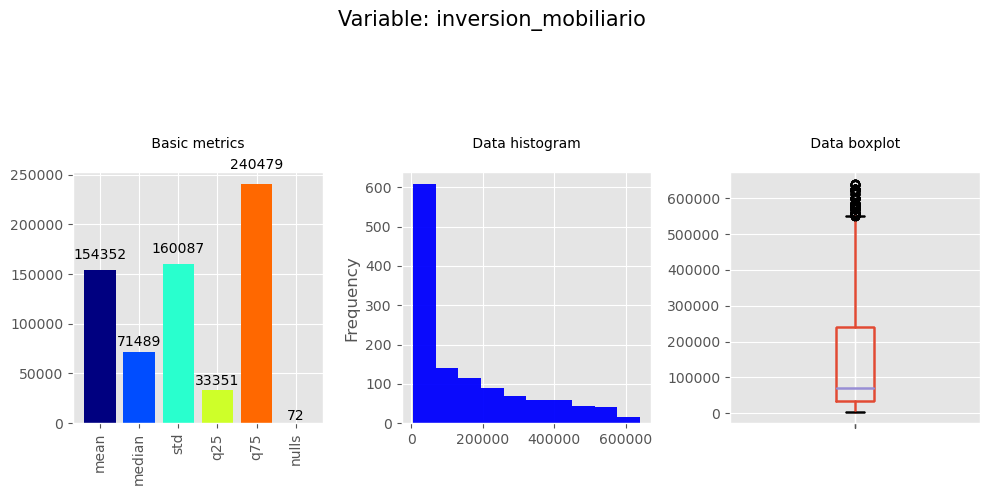

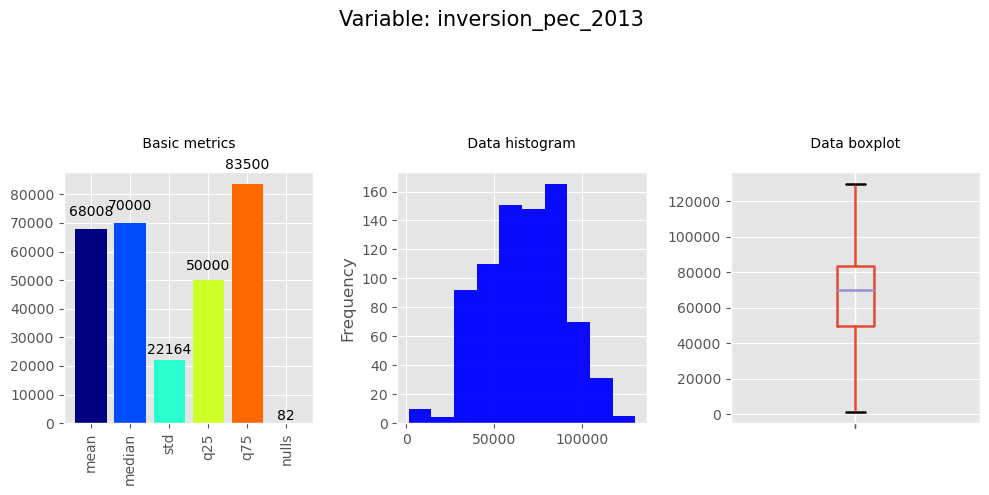

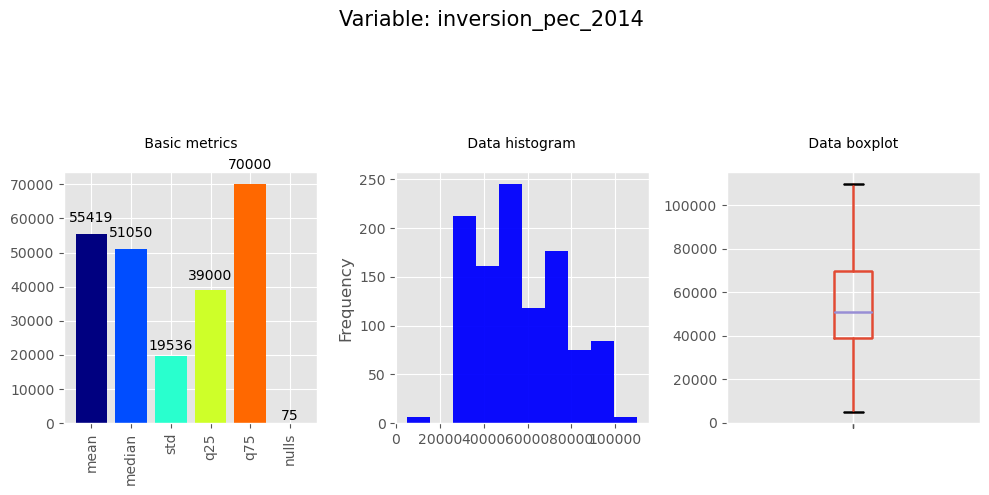

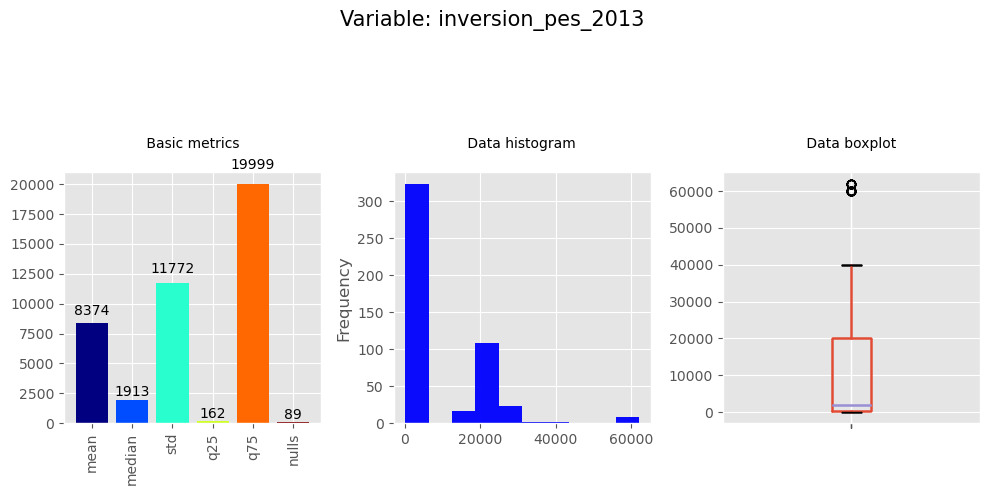

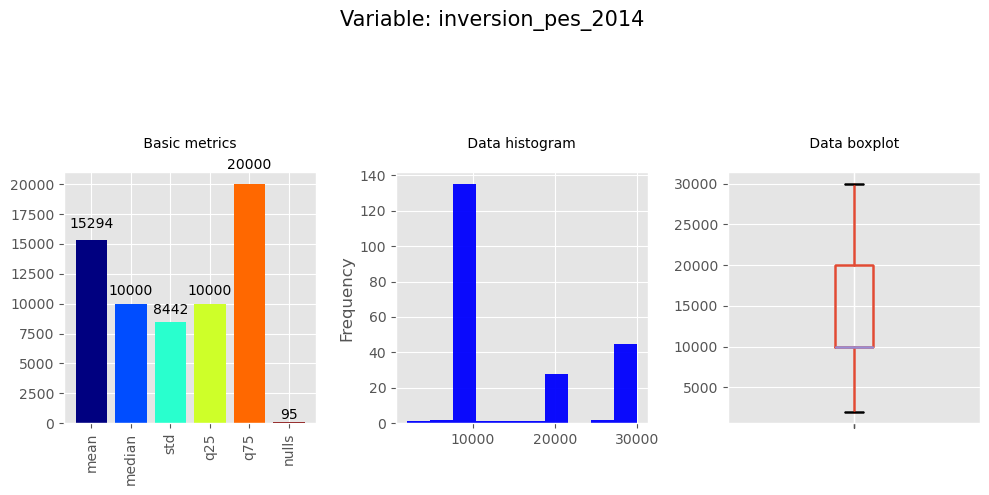

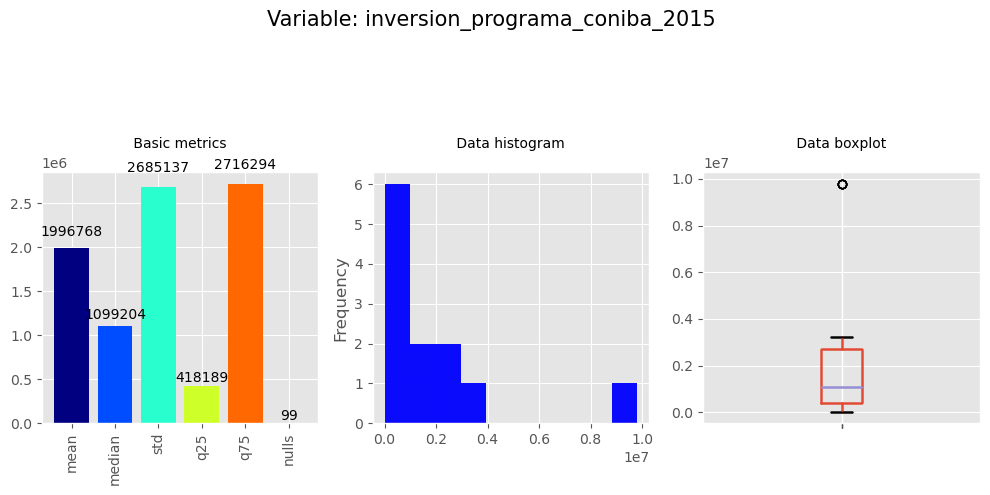

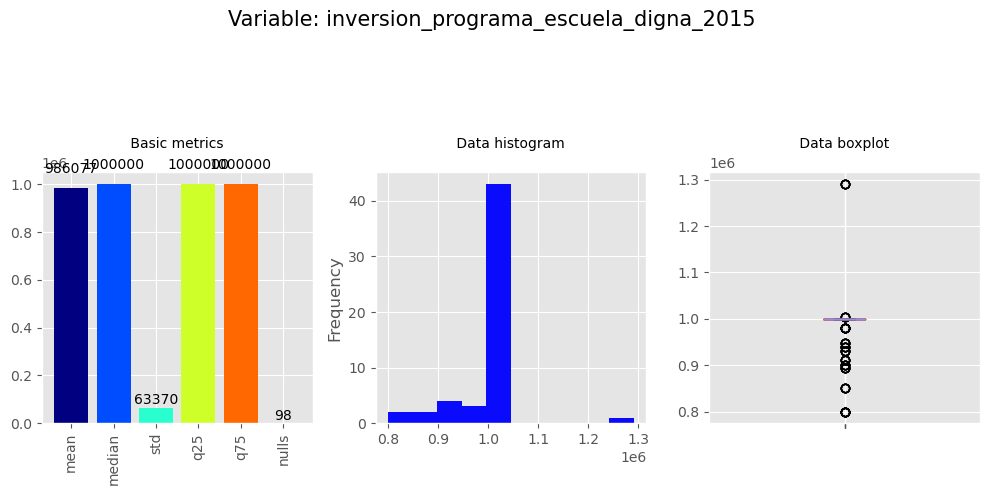

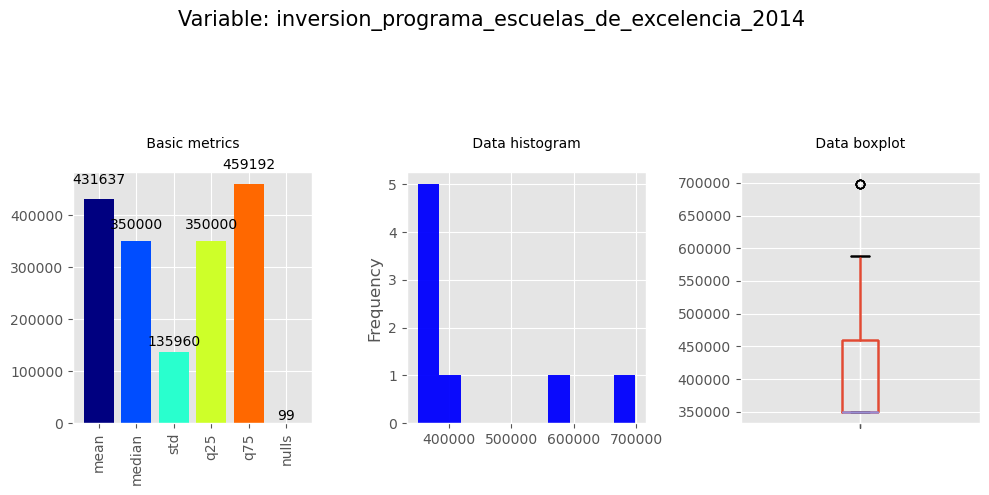

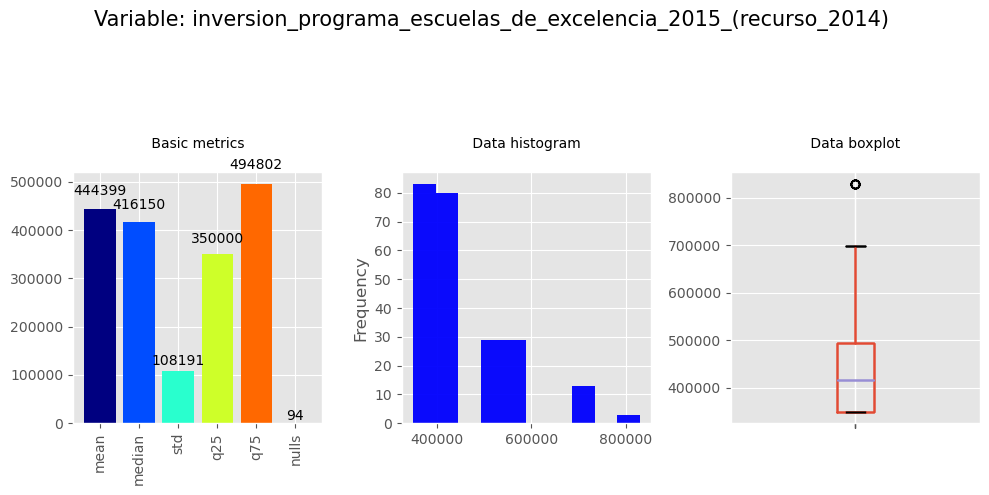

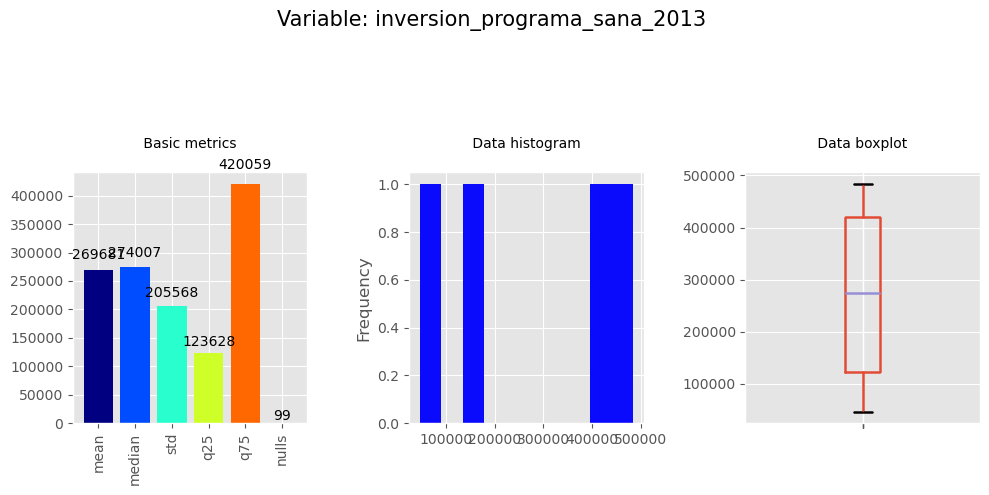

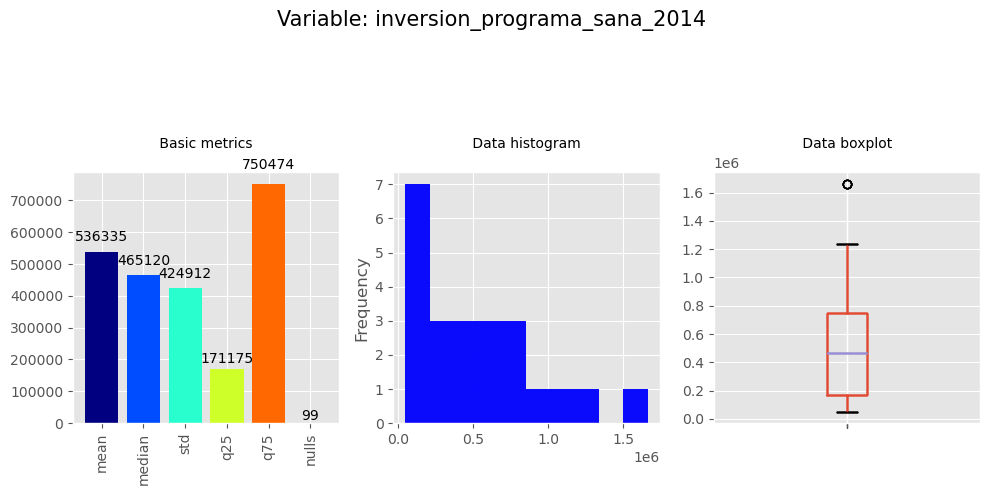

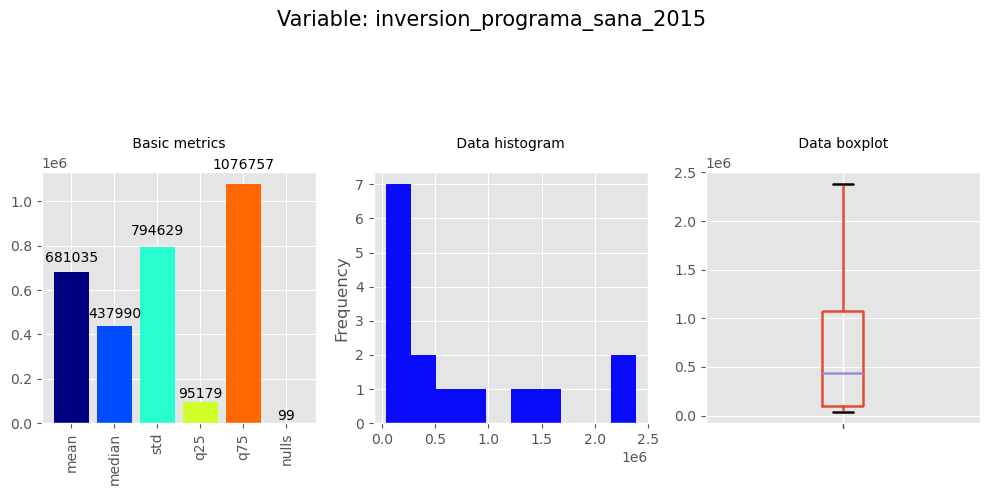

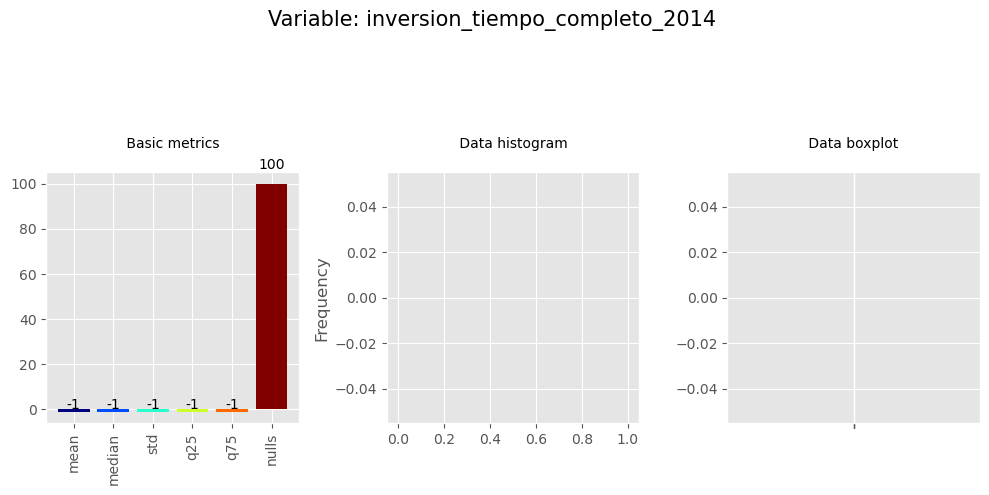

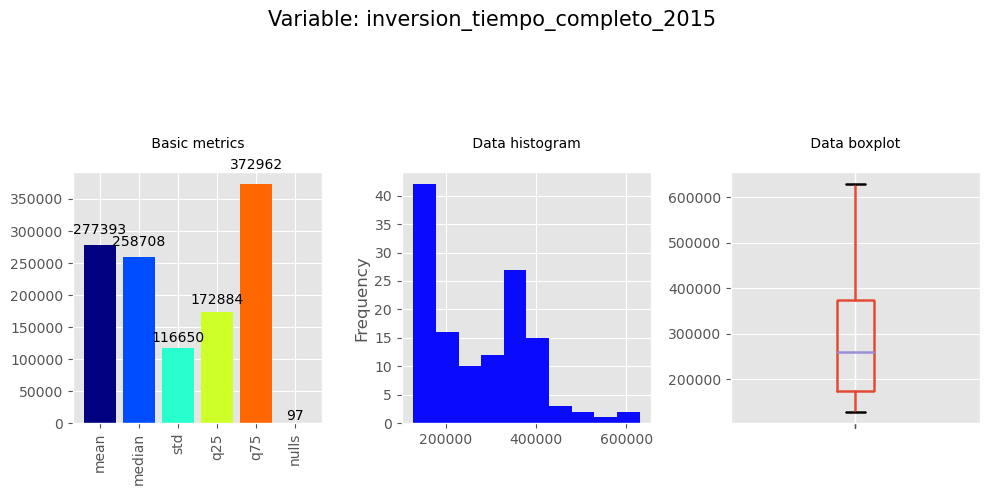

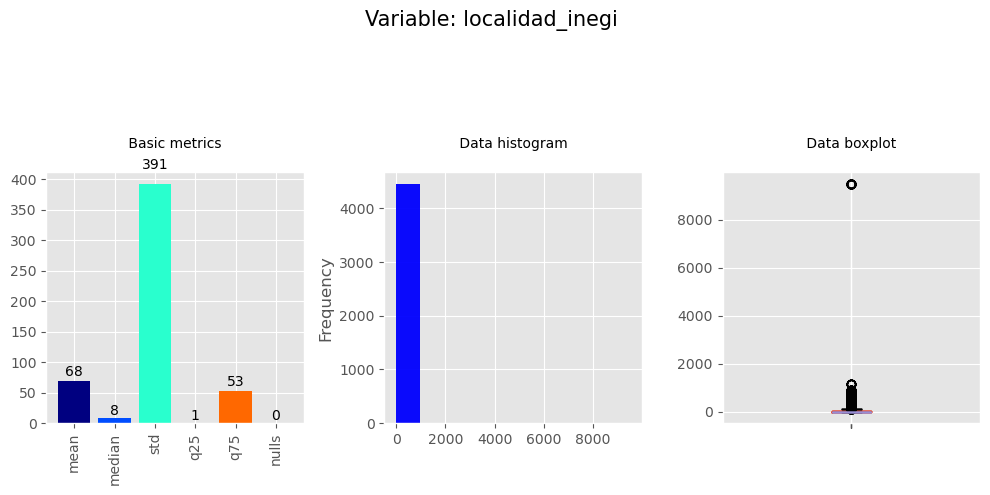

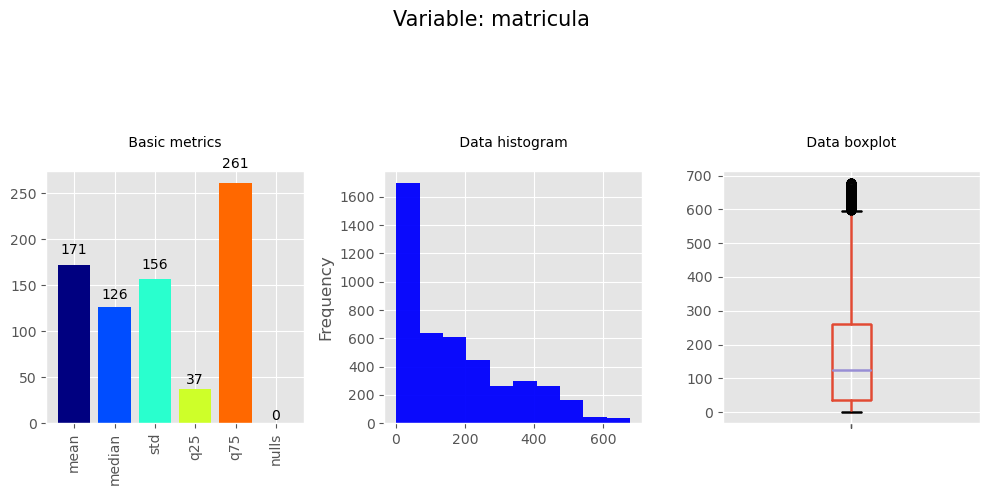

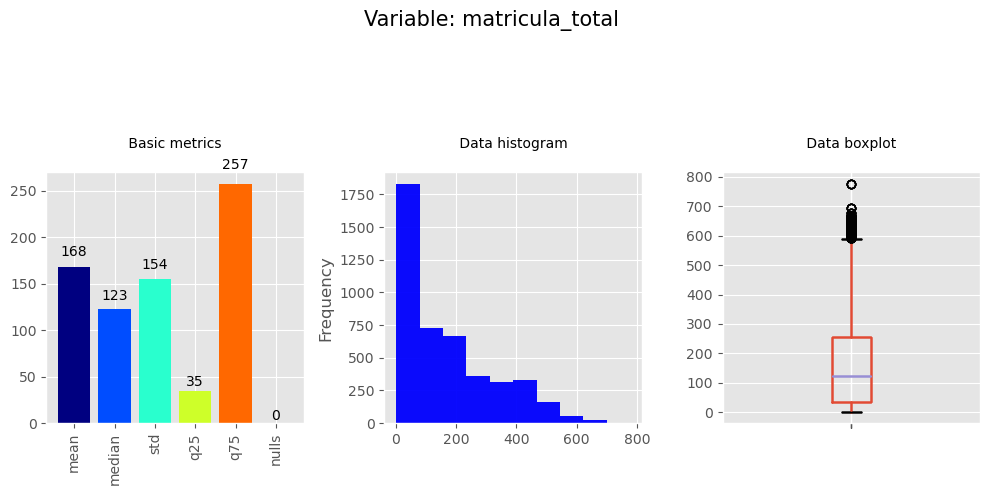

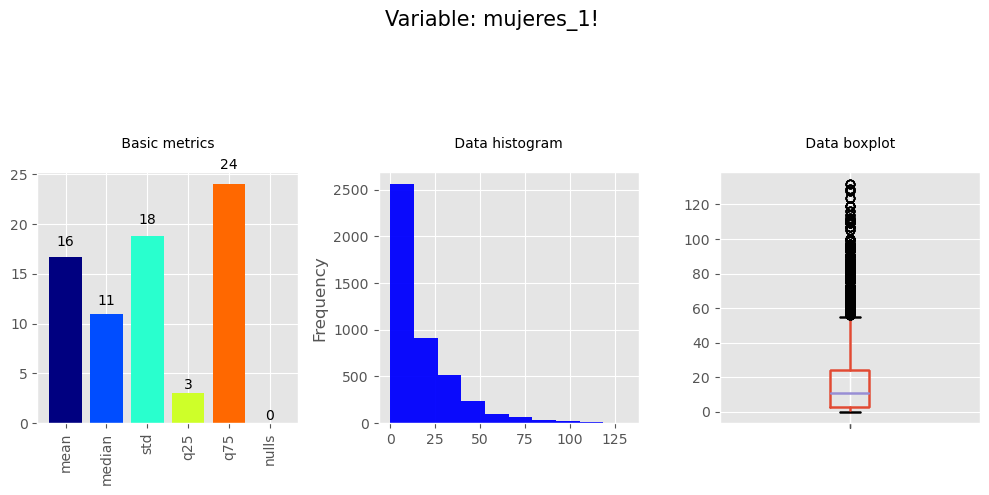

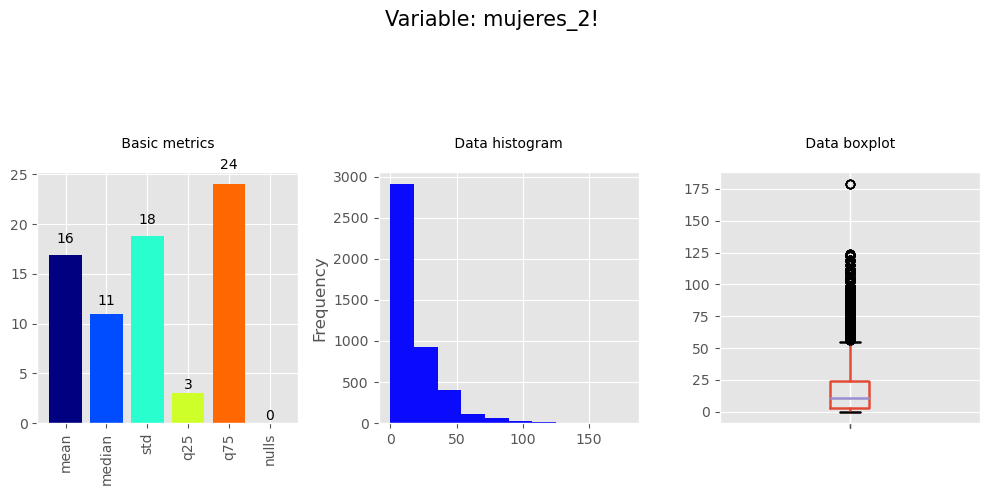

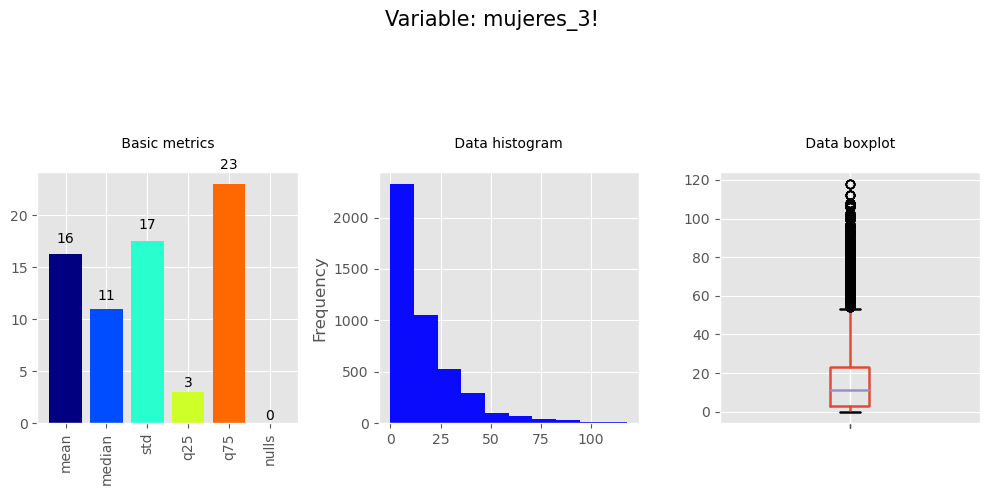

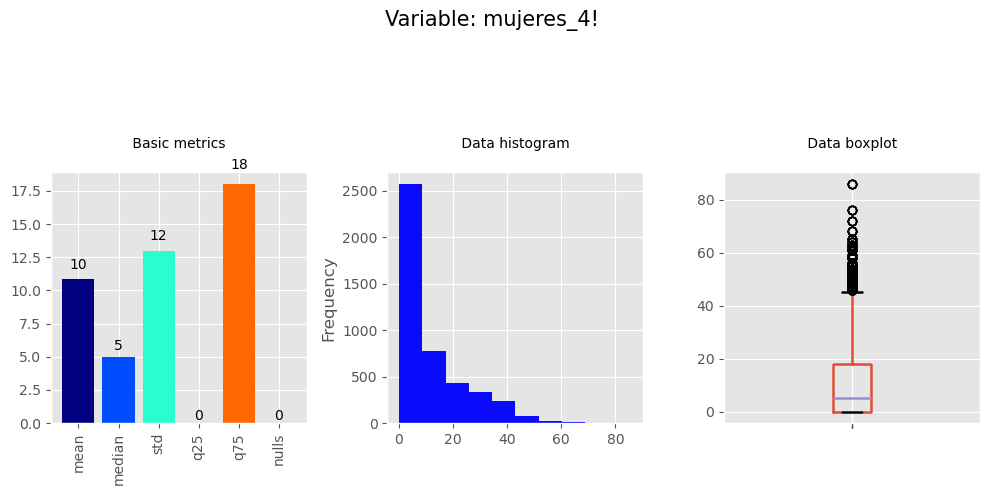

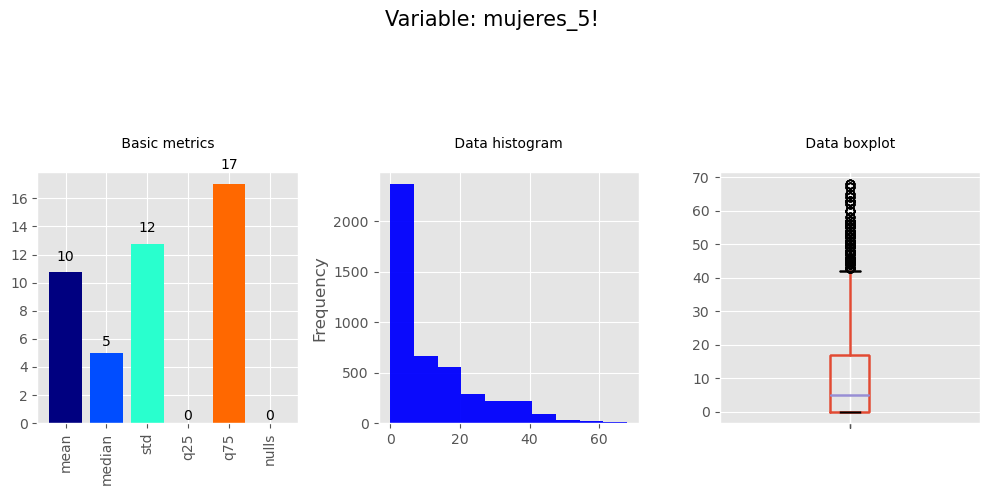

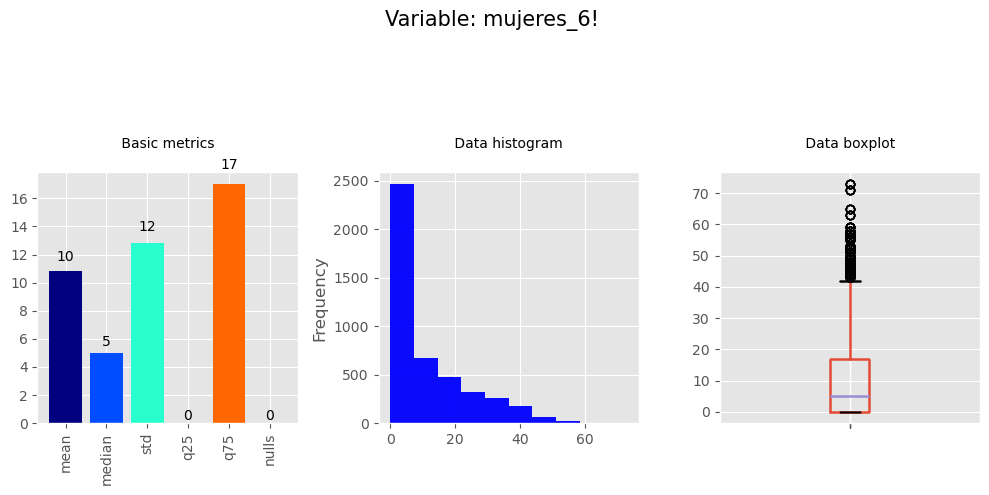

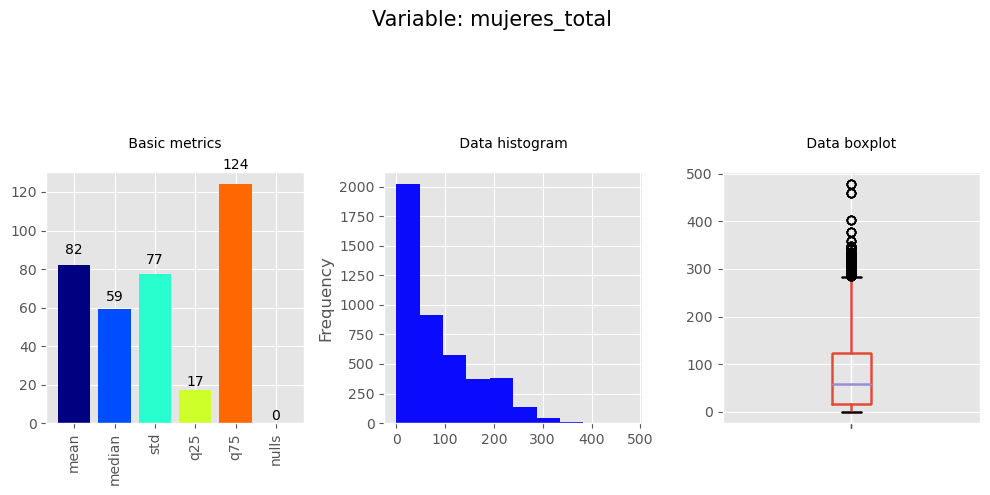

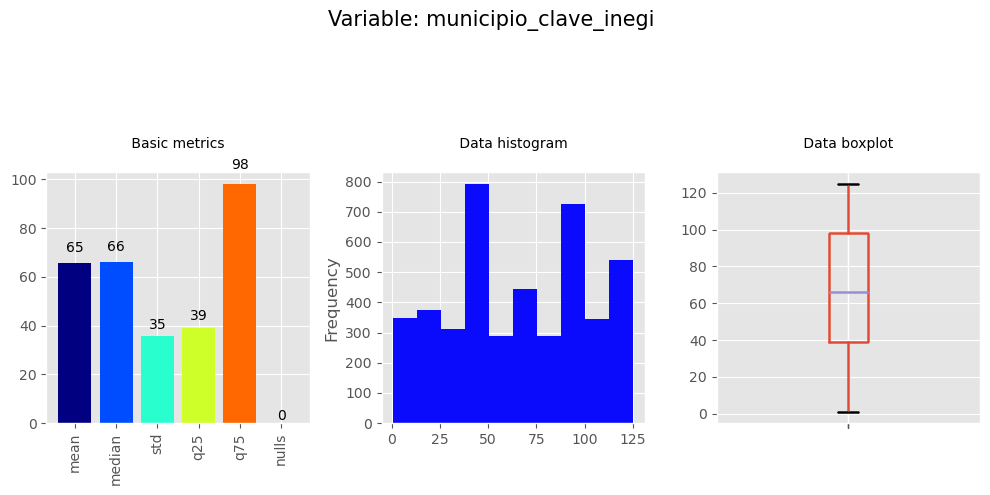

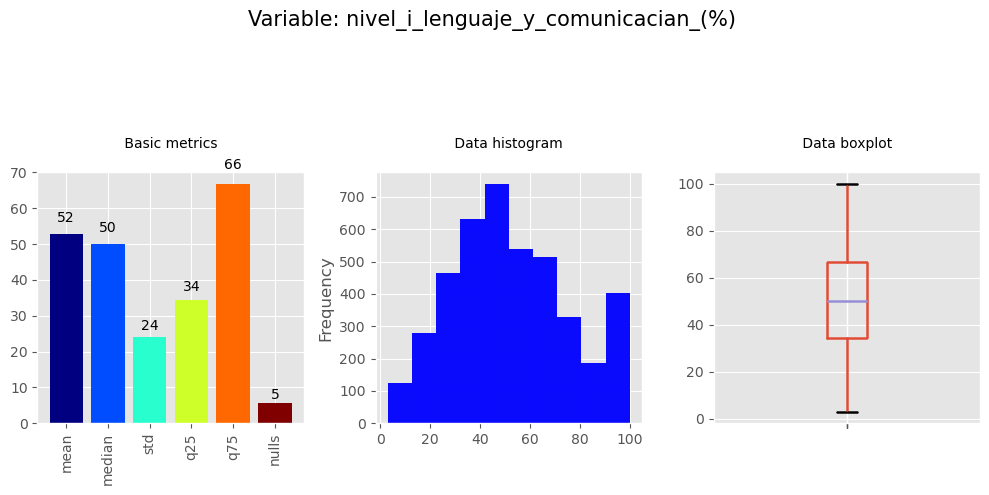

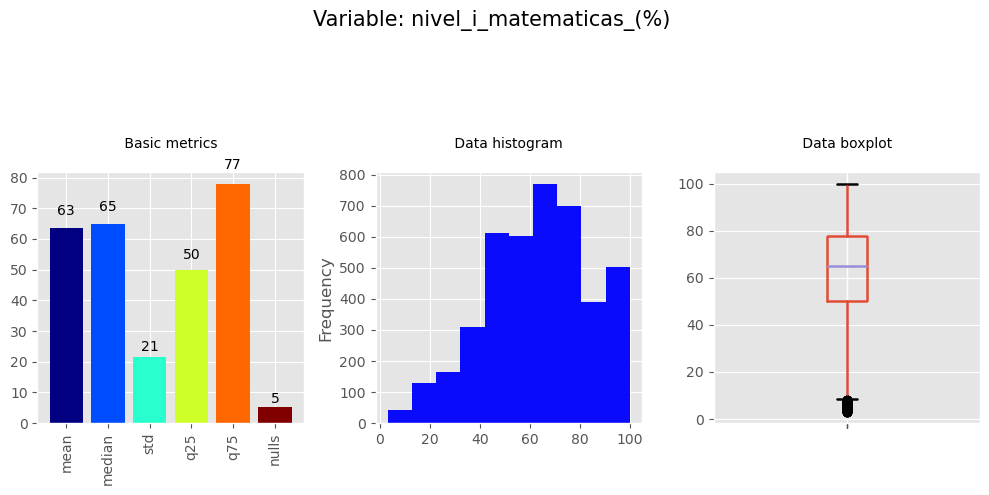

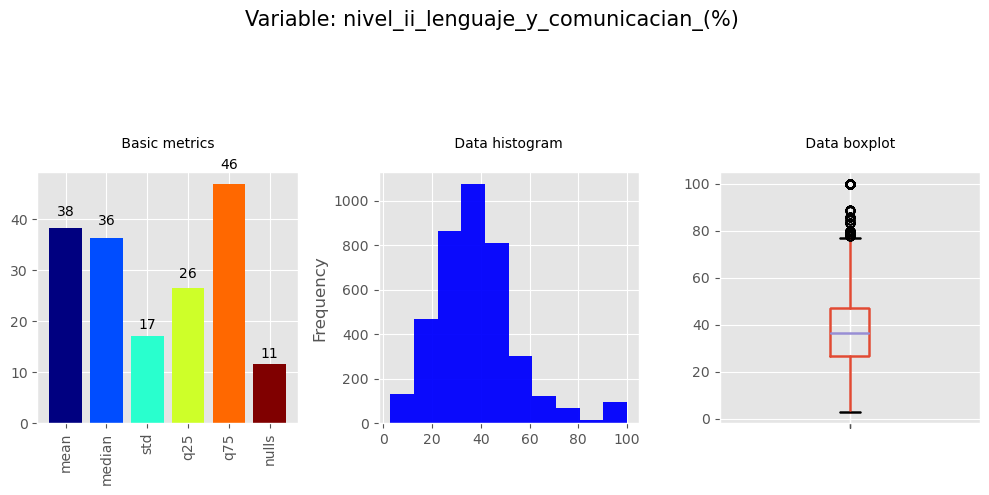

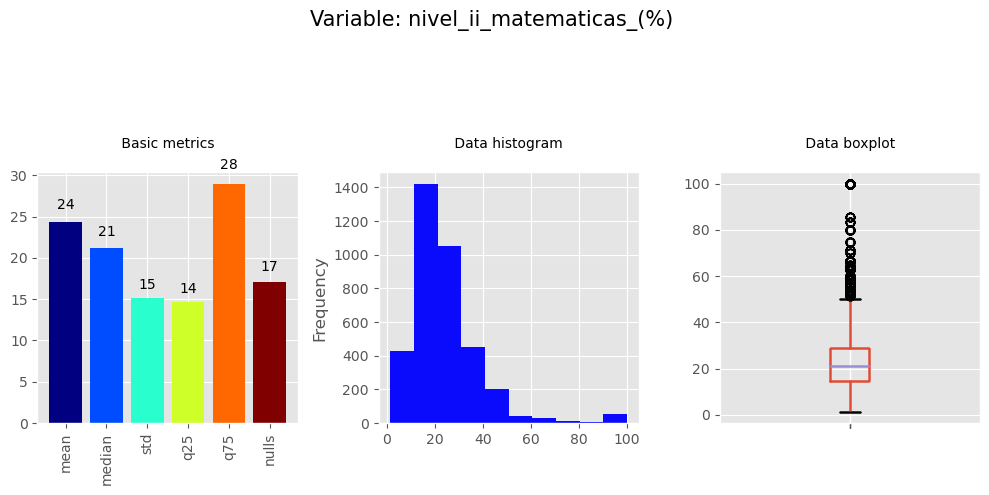

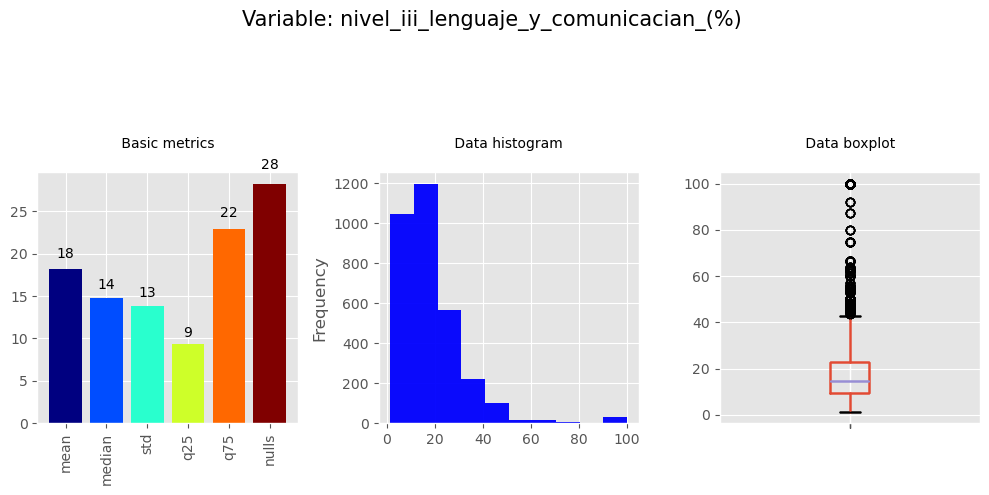

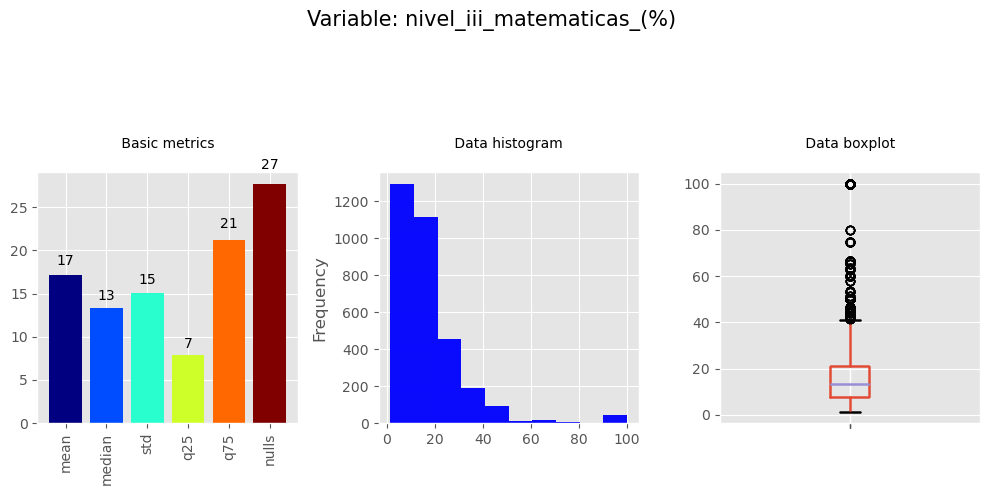

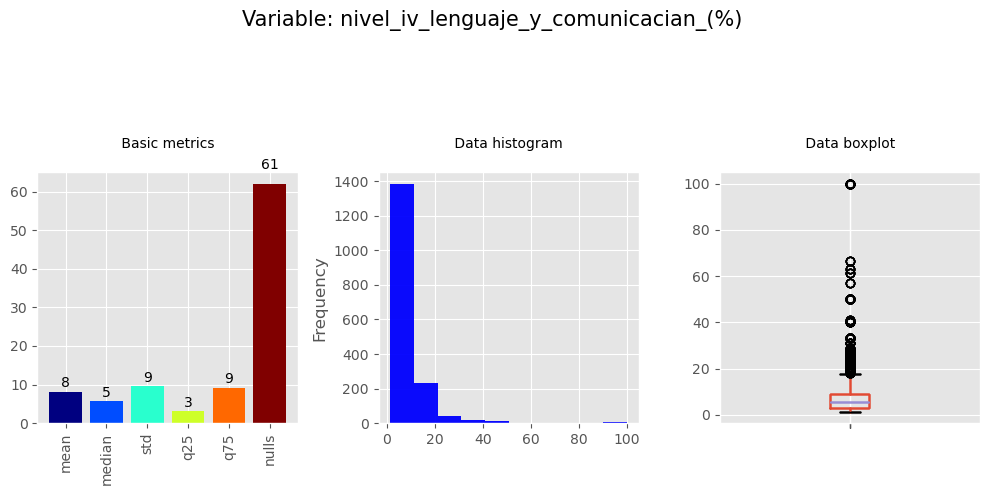

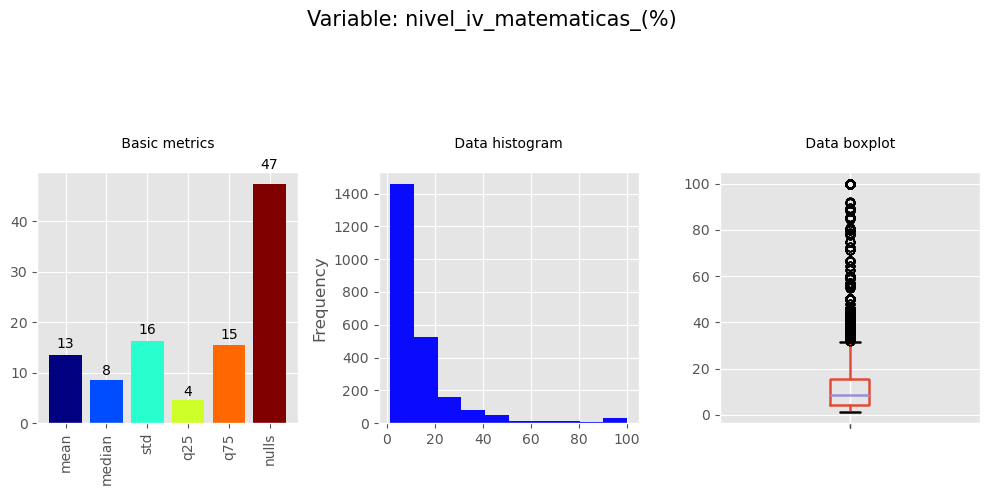

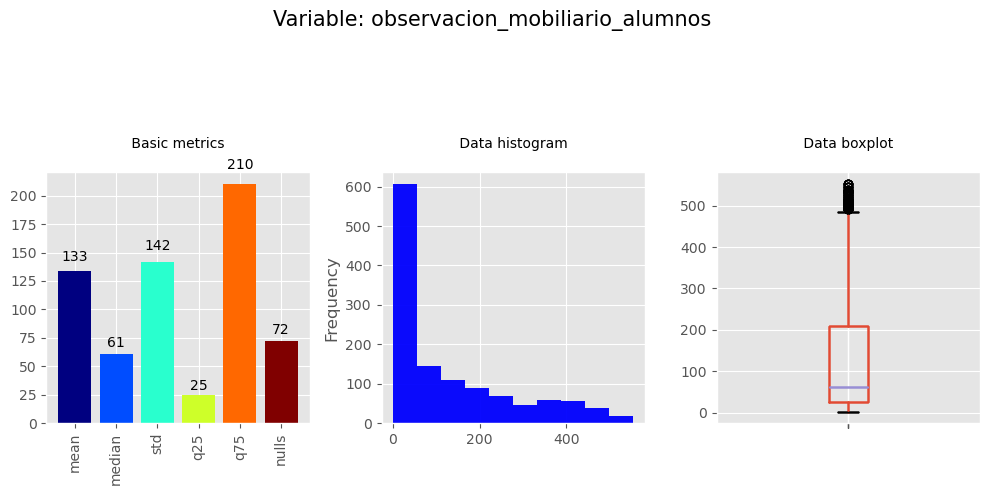

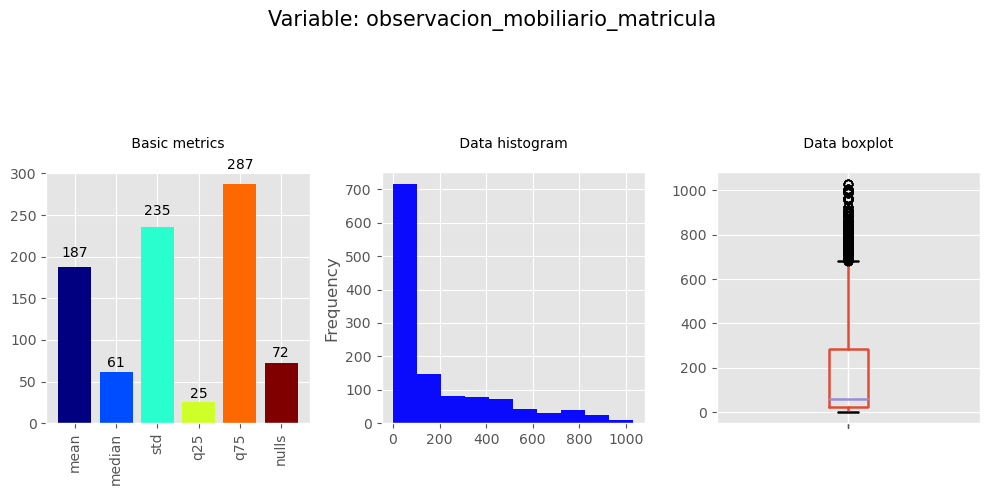

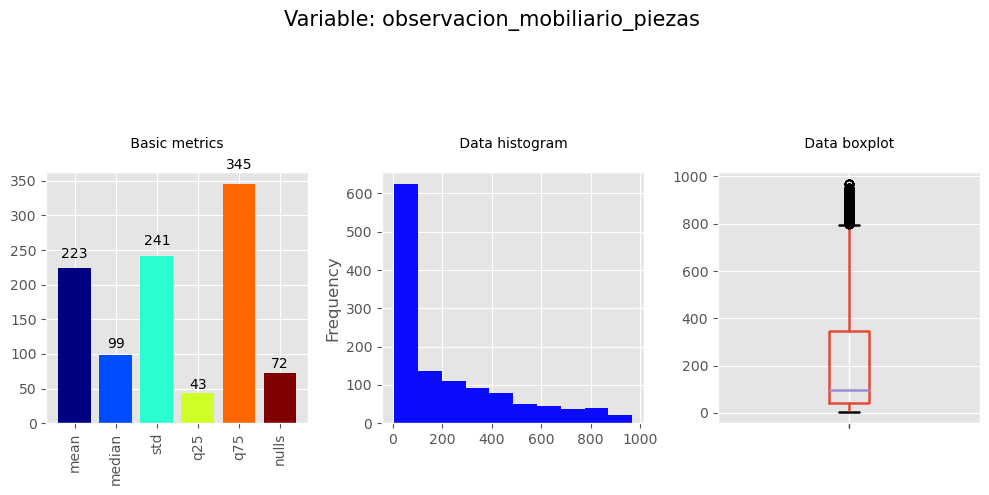

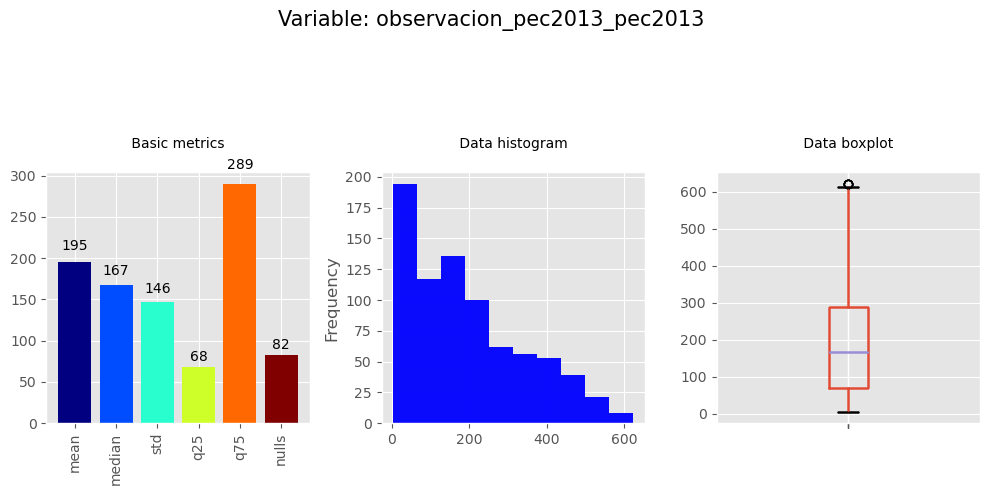

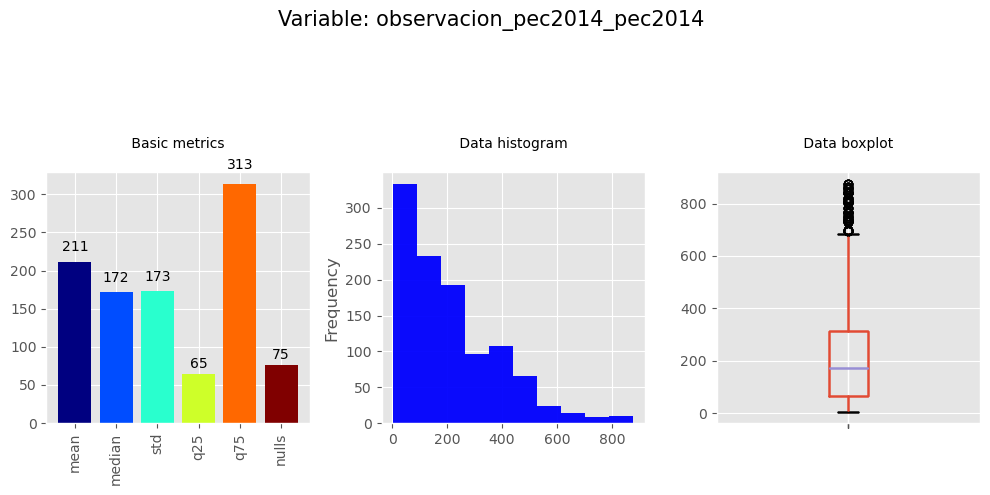

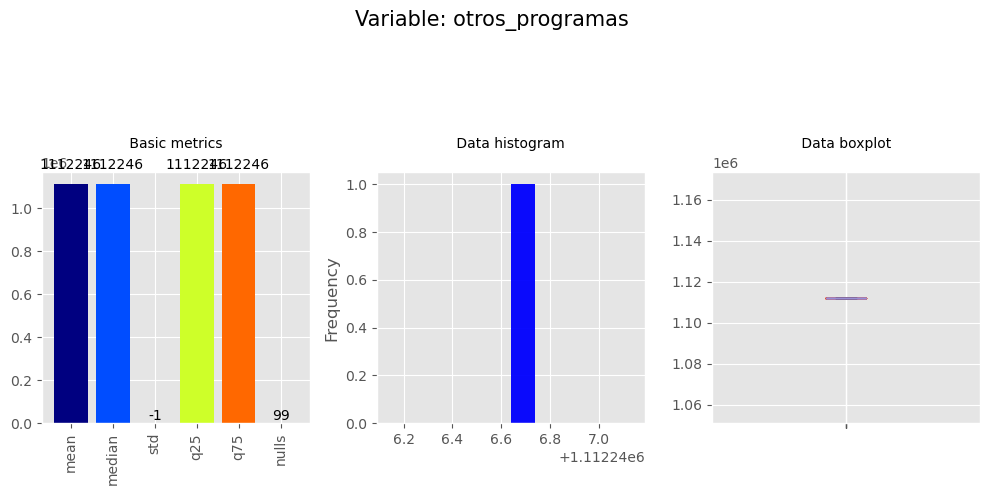

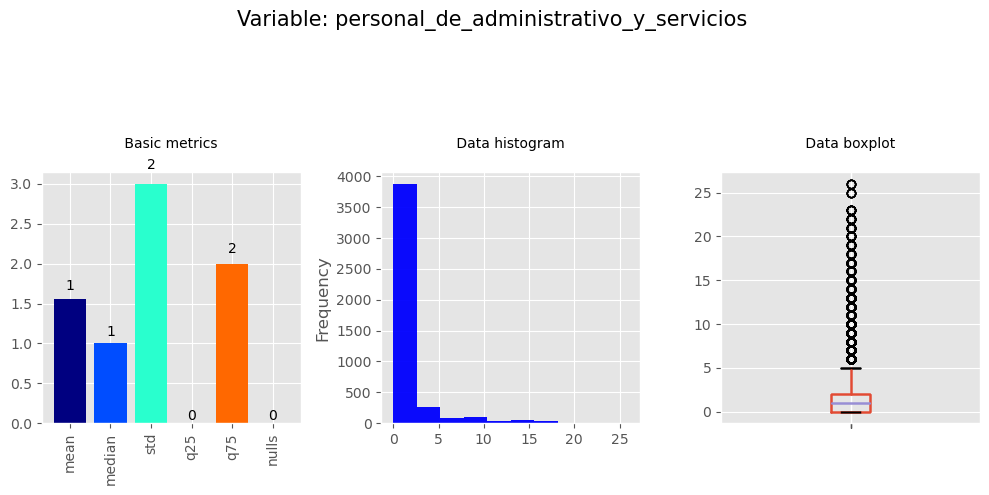

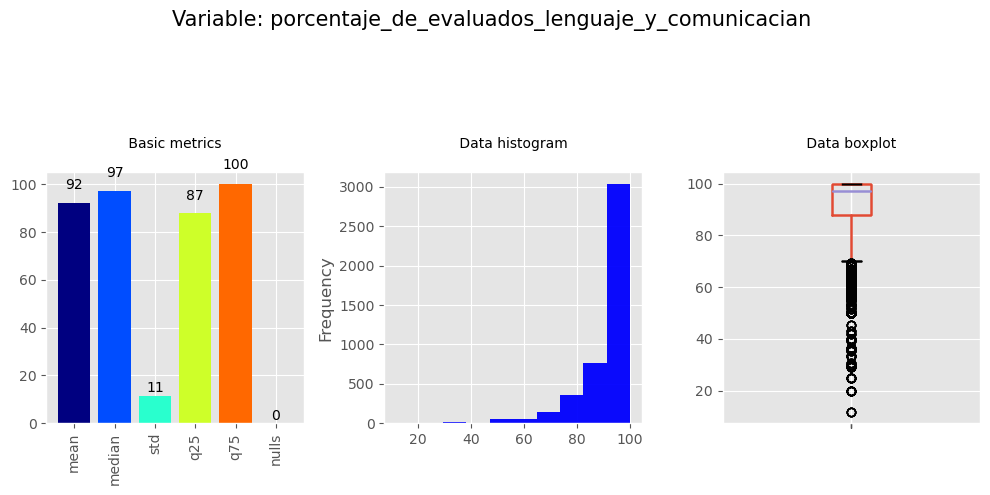

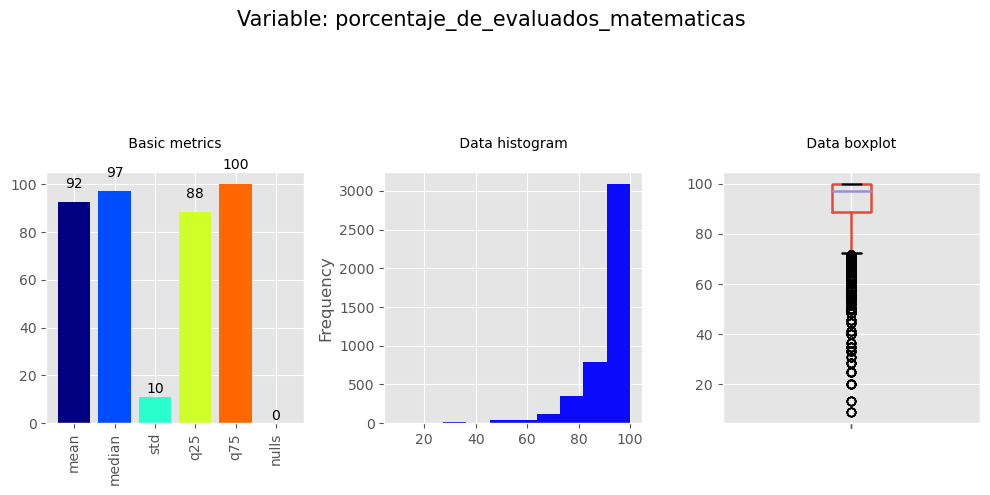

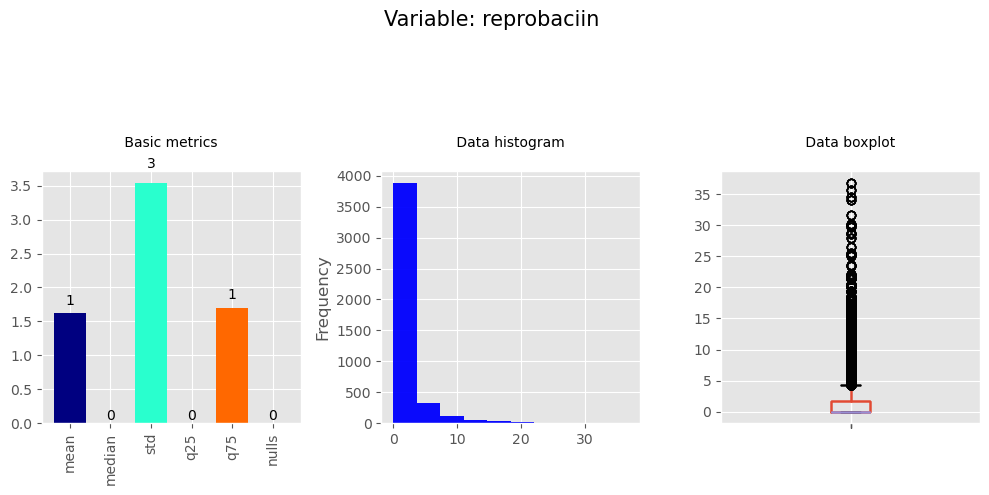

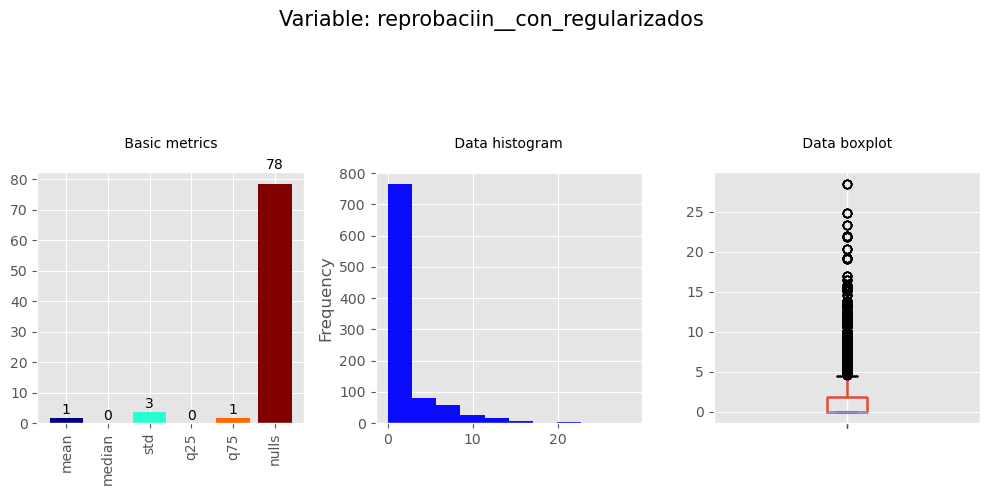

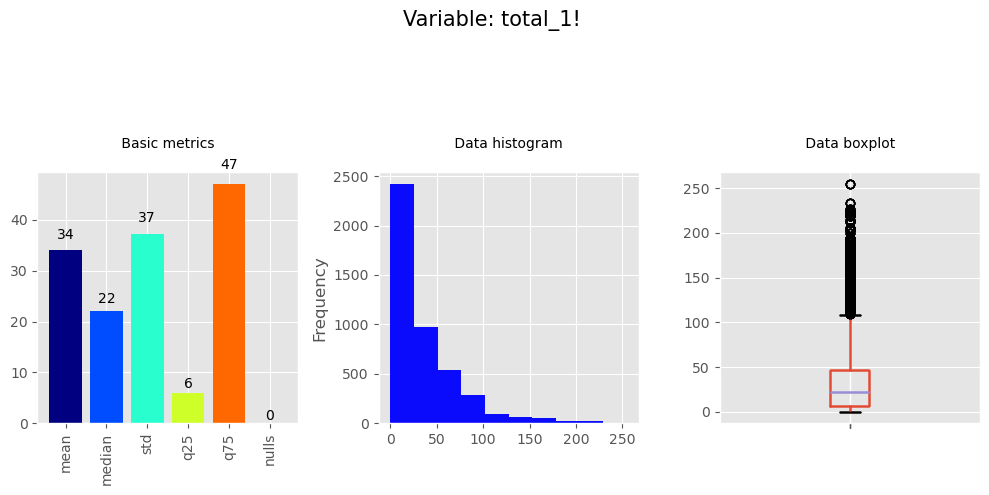

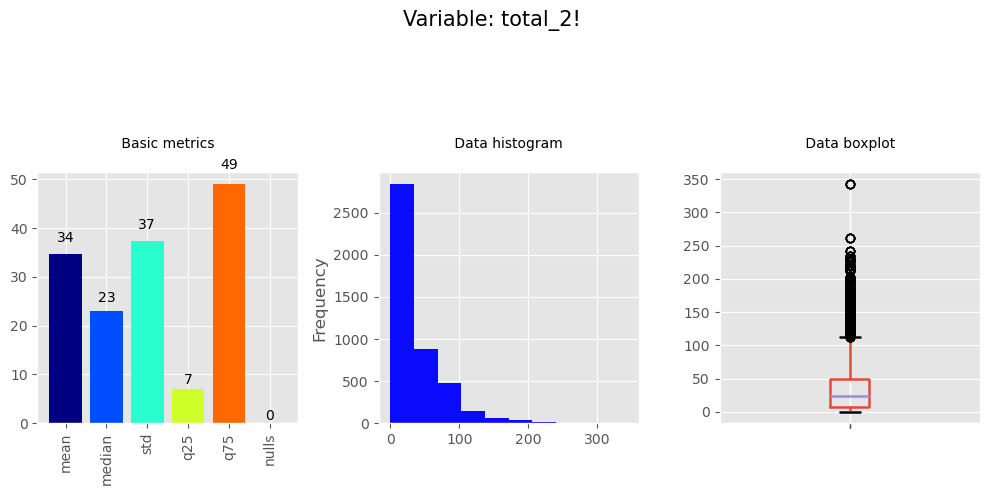

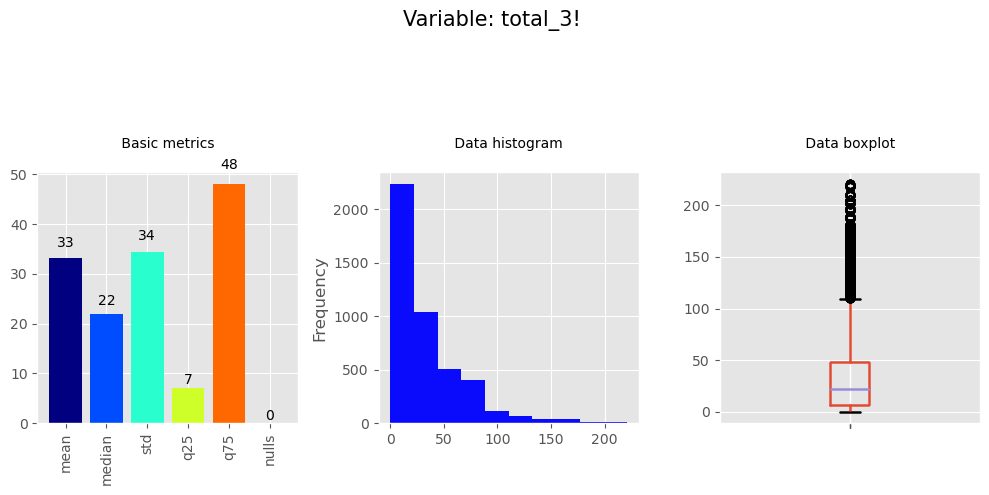

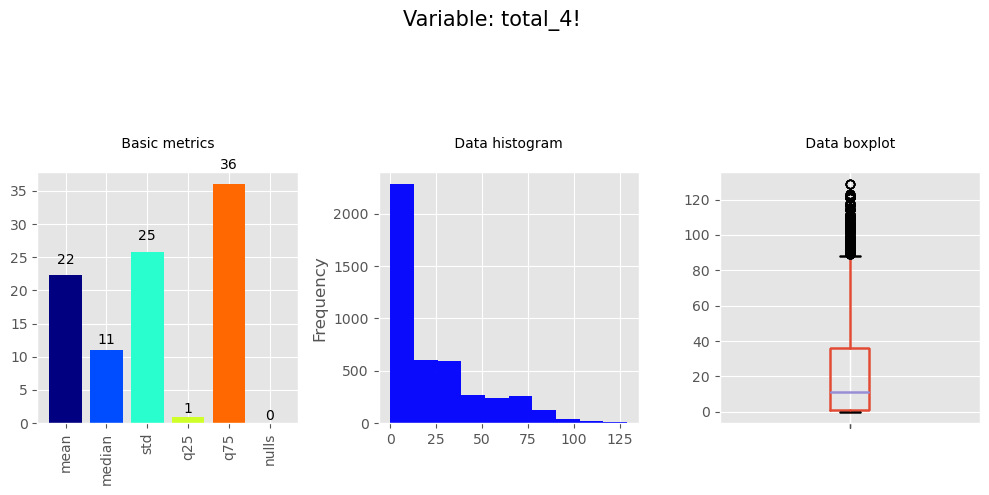

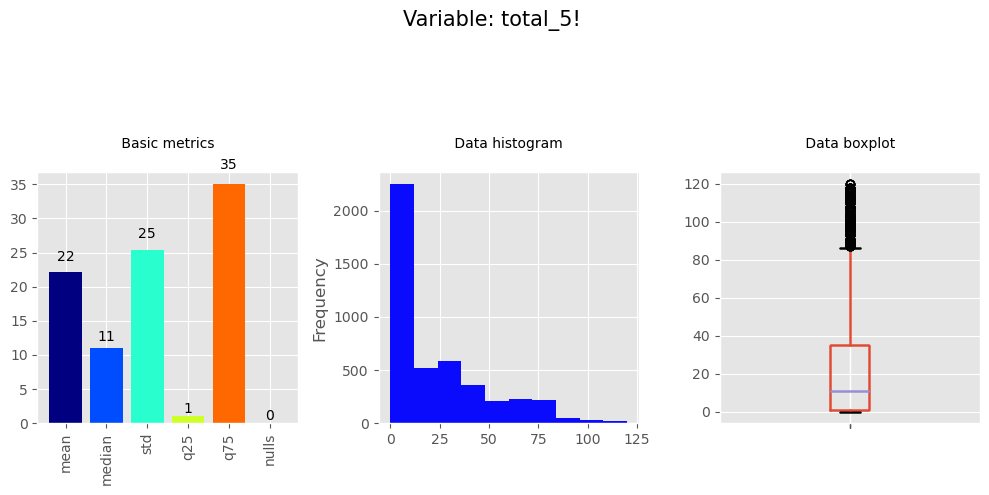

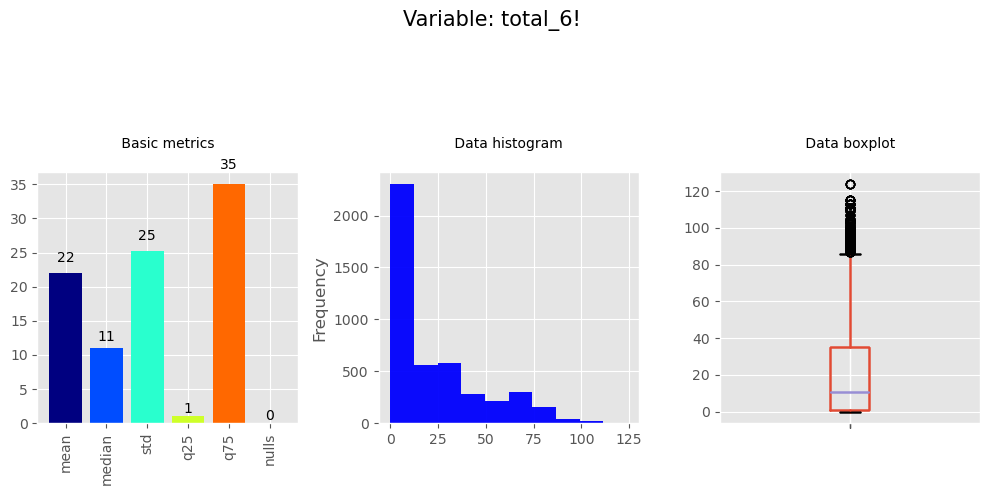

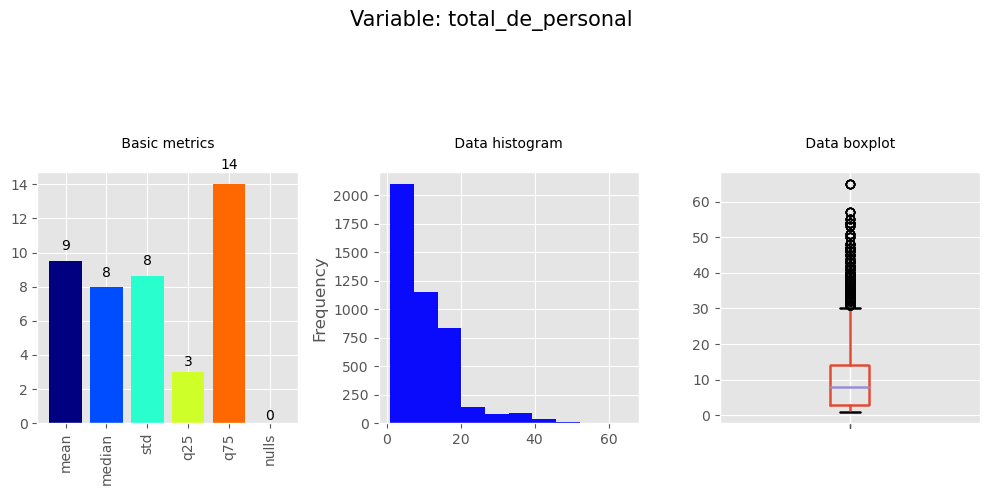

In [130]:
numeric_stats = get_numeric_stats(df)
plot_numeric(df, numeric_stats)

C:\Users\hecto\AppData\Local\Temp\ipykernel_7592\3040763349.py:121: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))


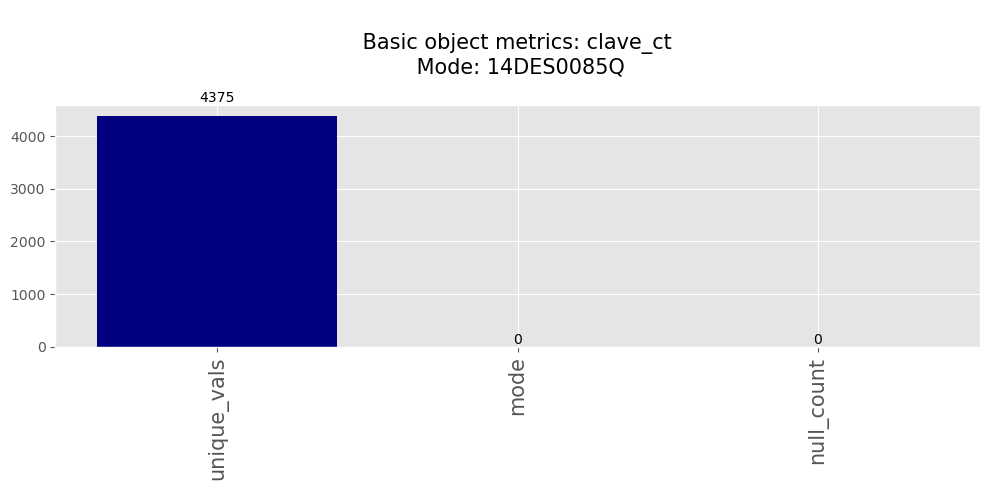

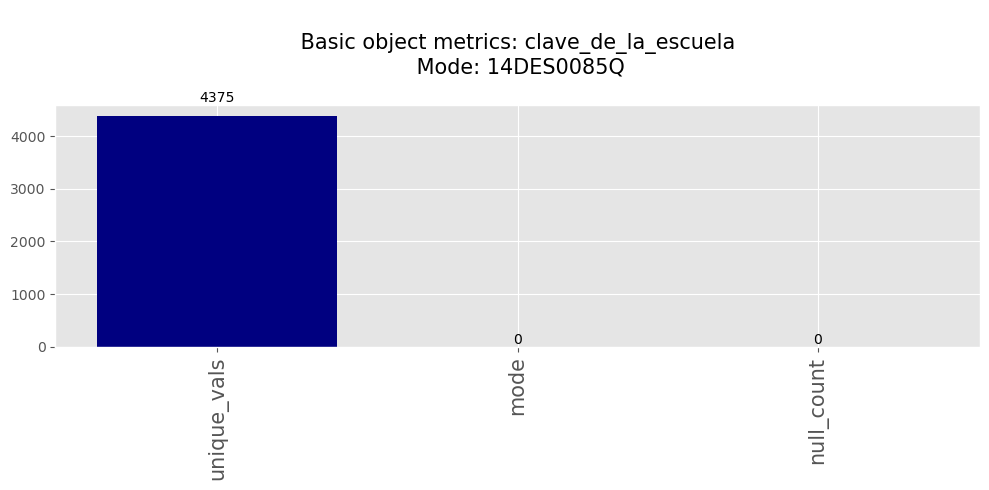

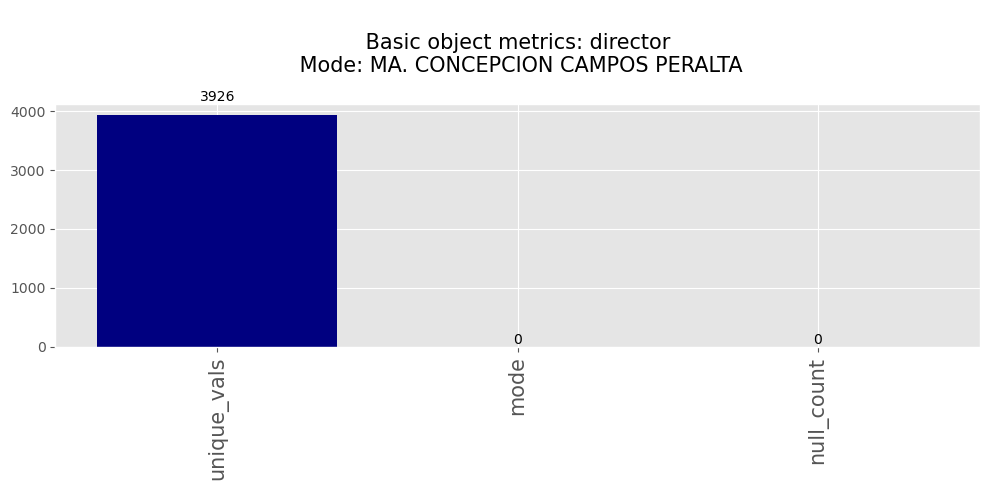

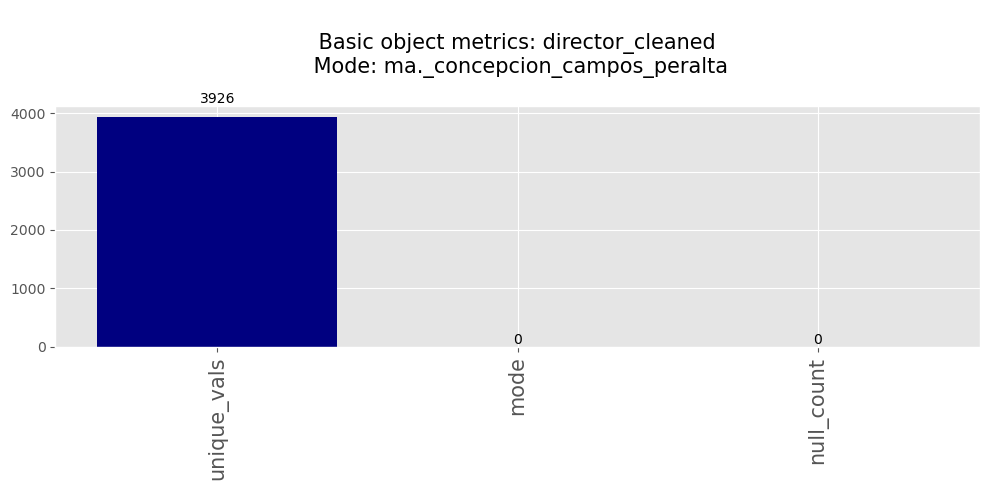

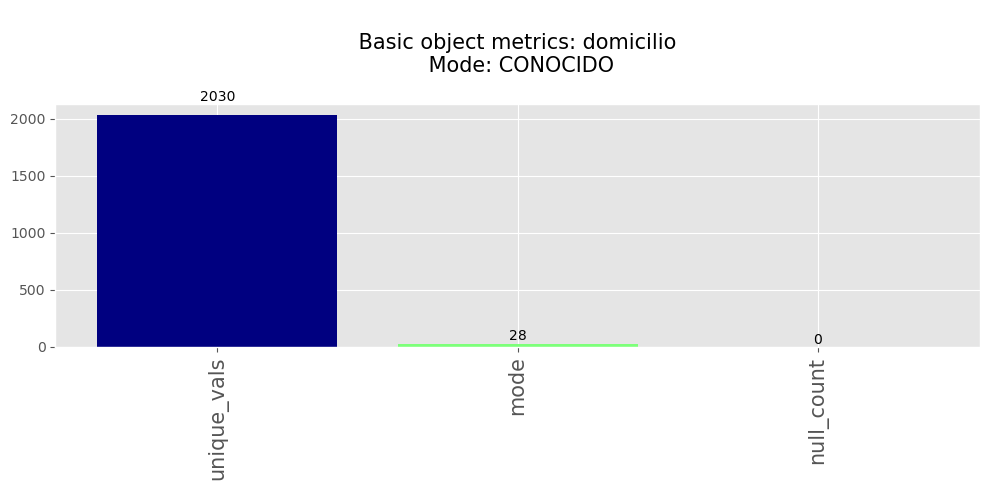

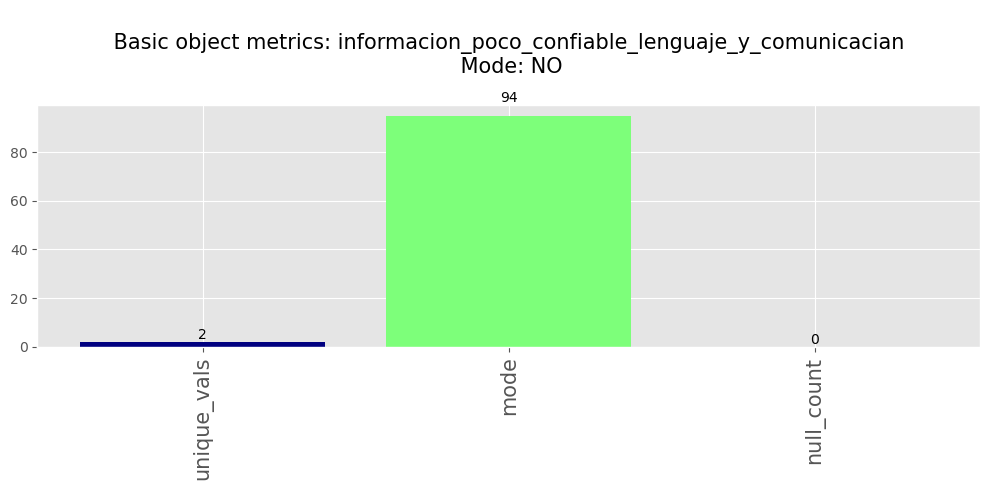

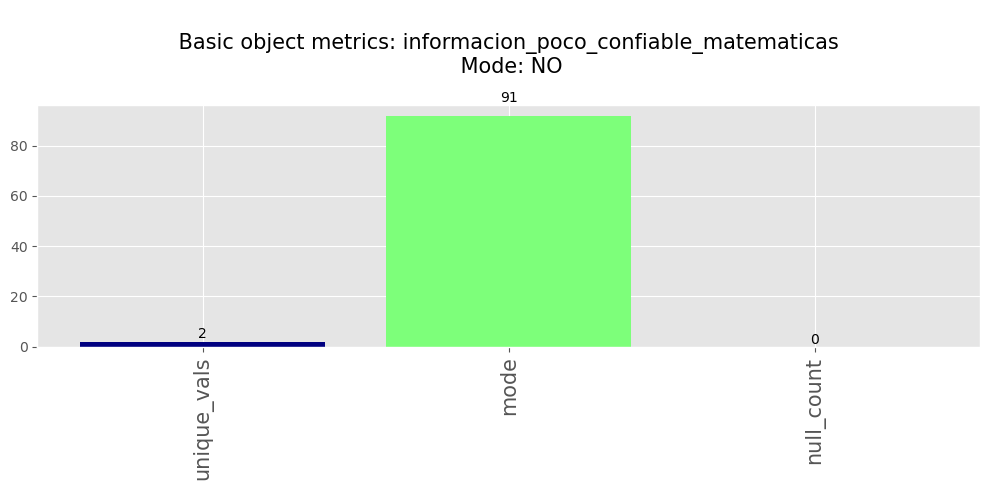

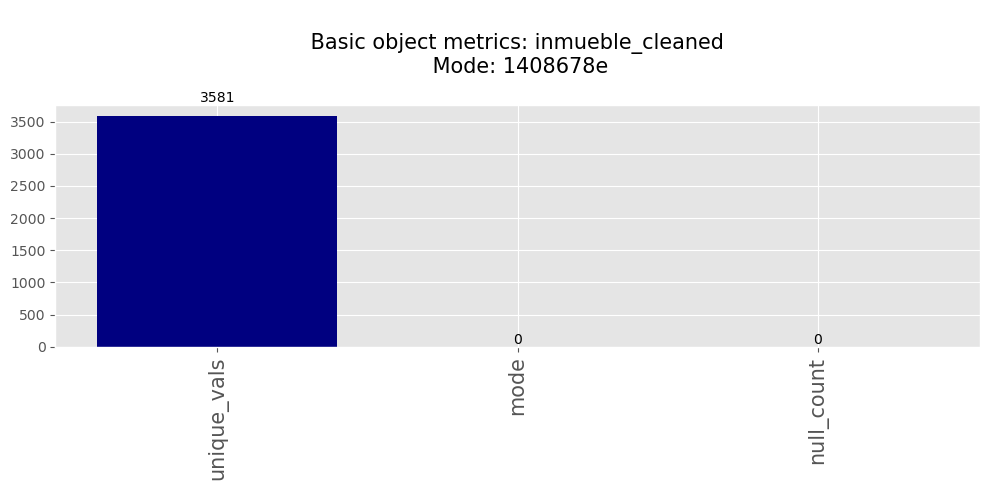

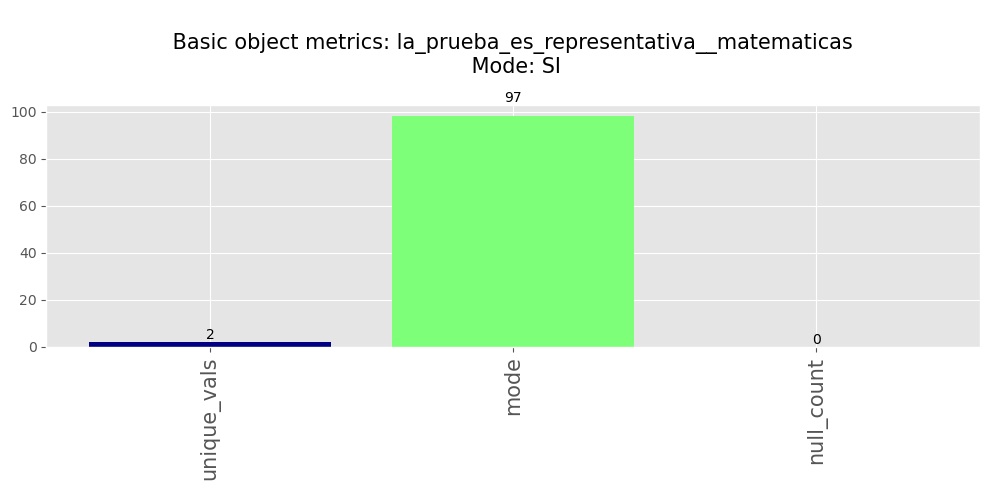

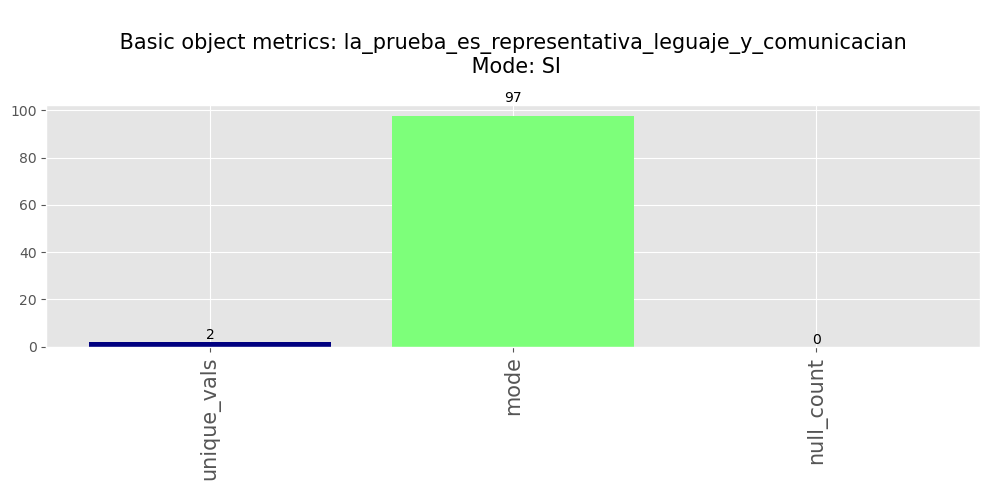

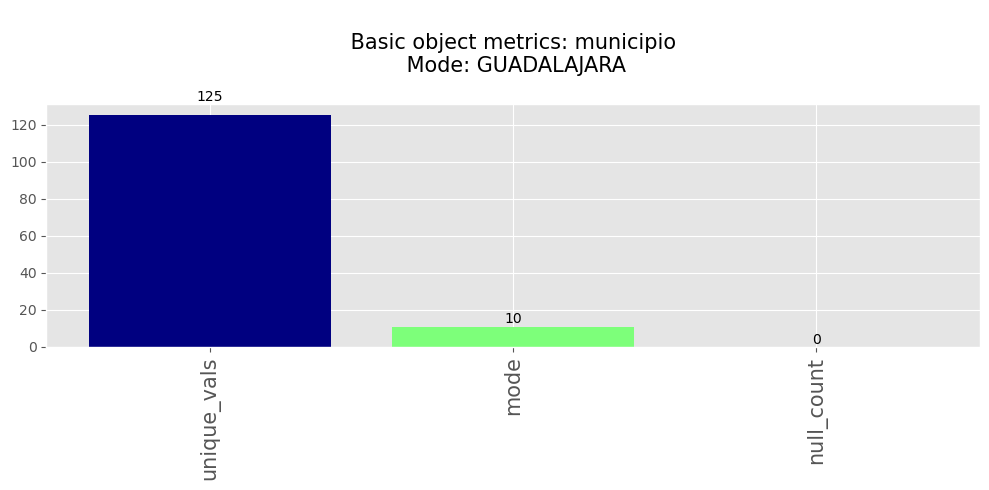

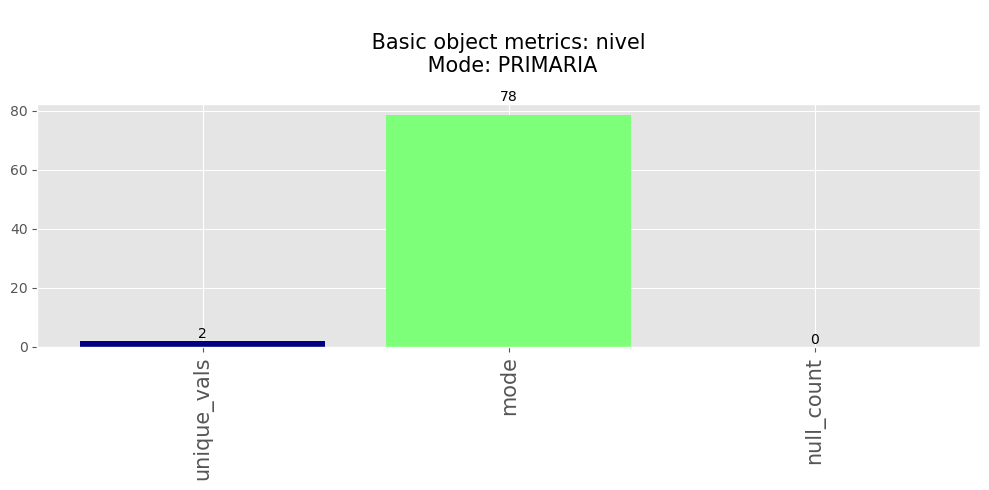

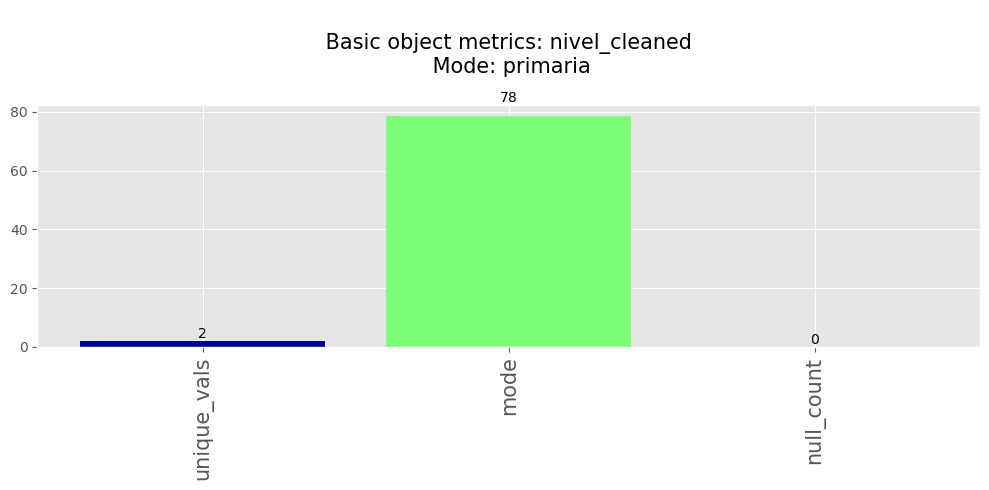

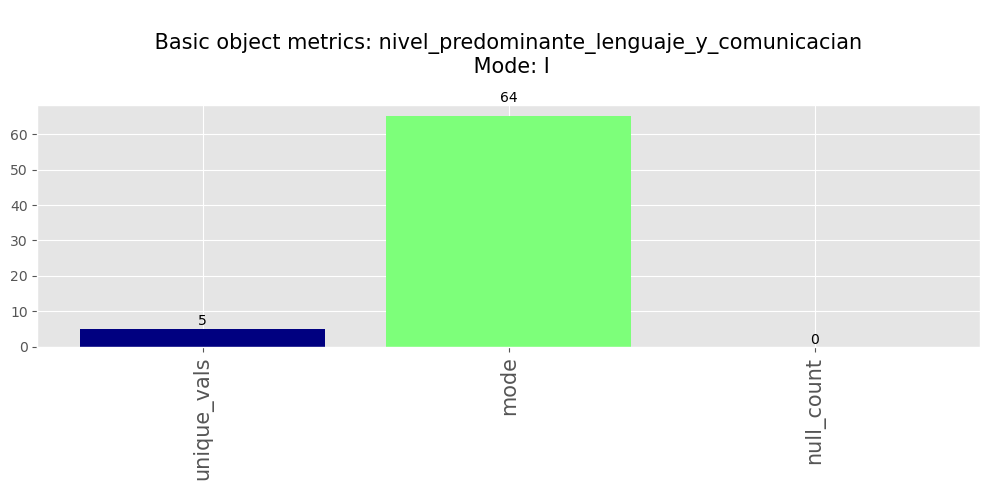

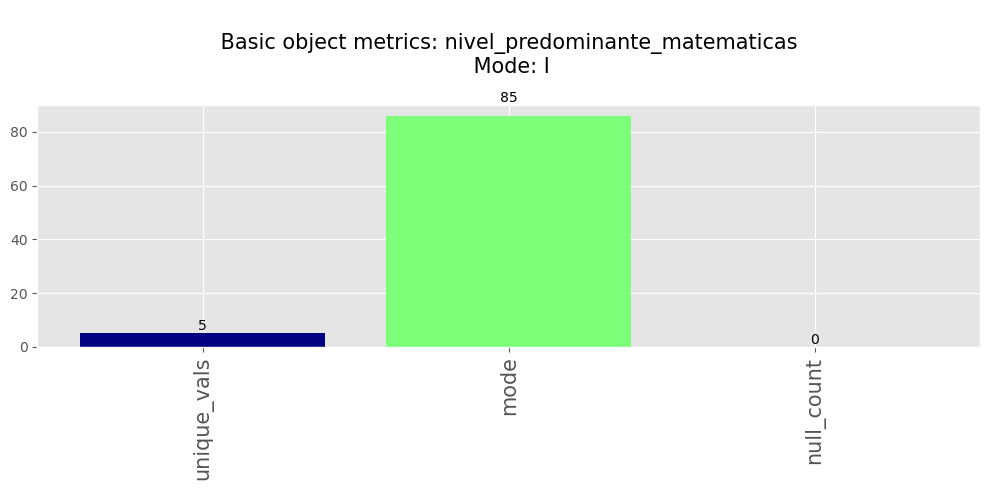

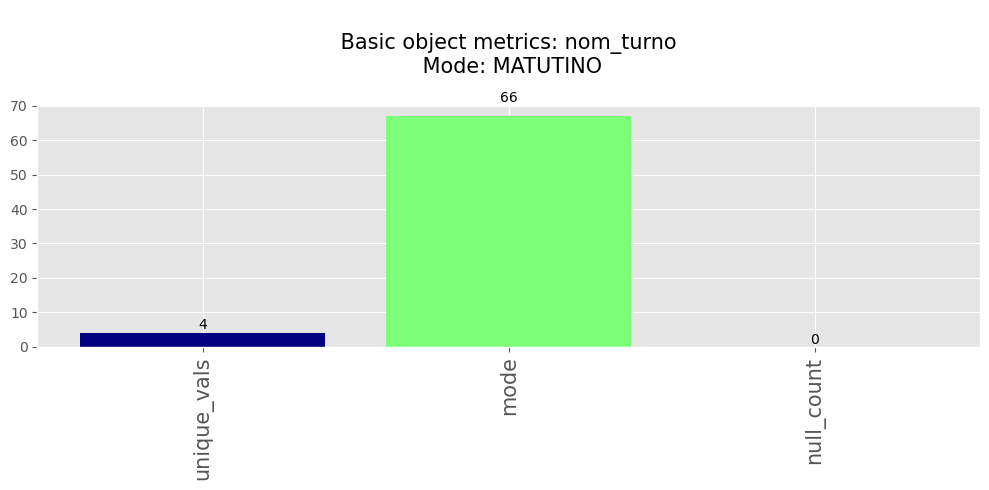

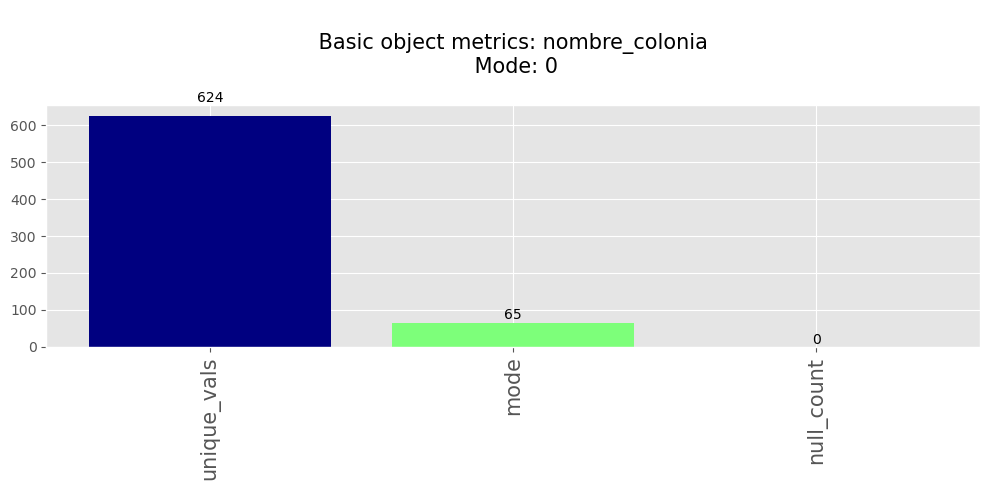

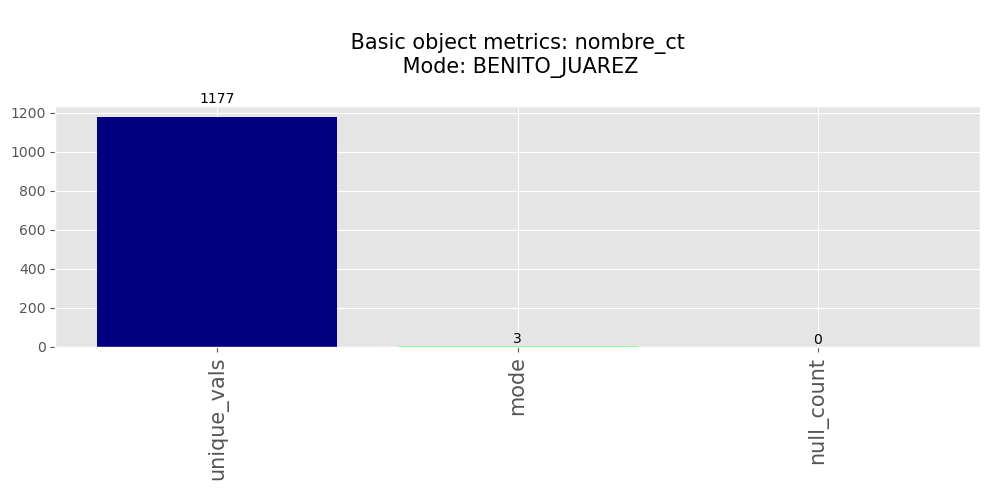

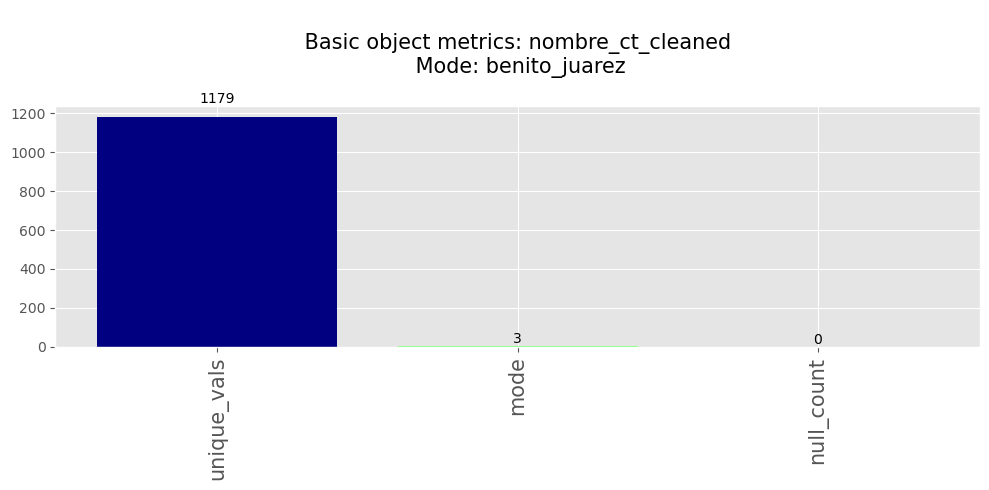

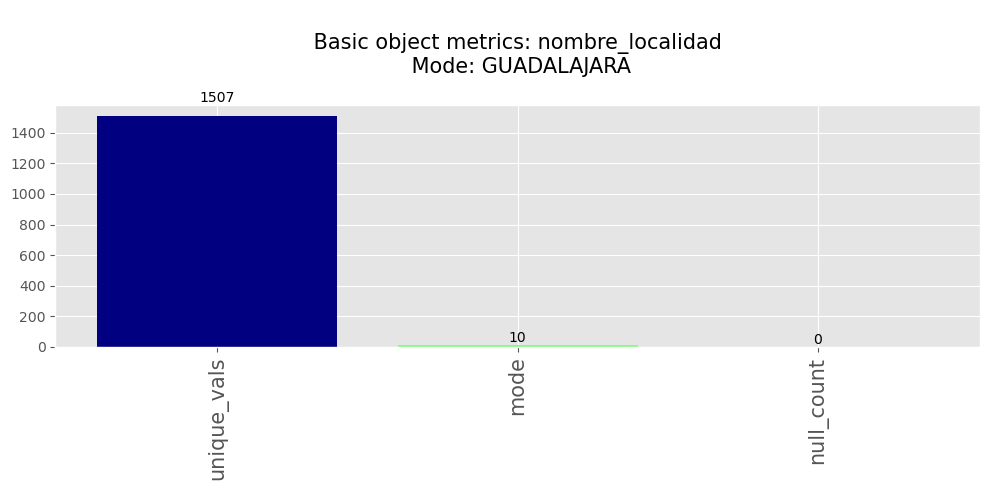

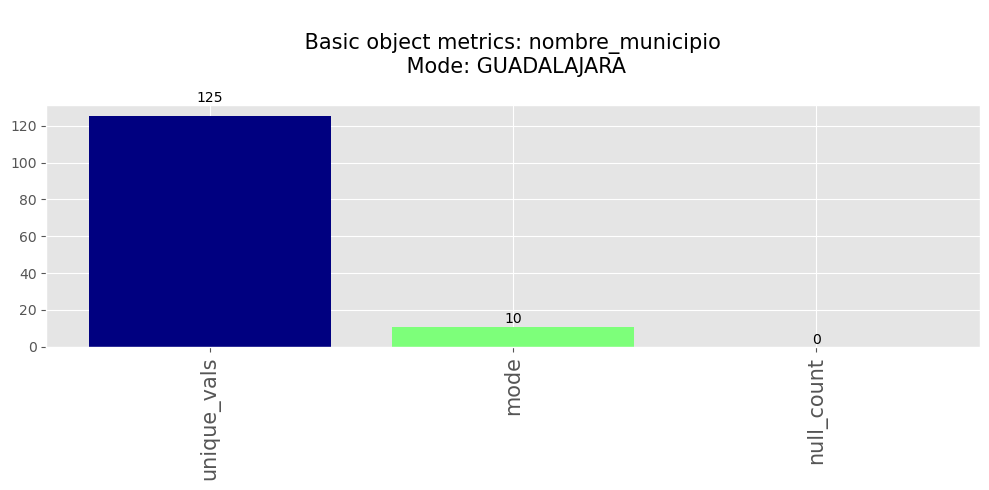

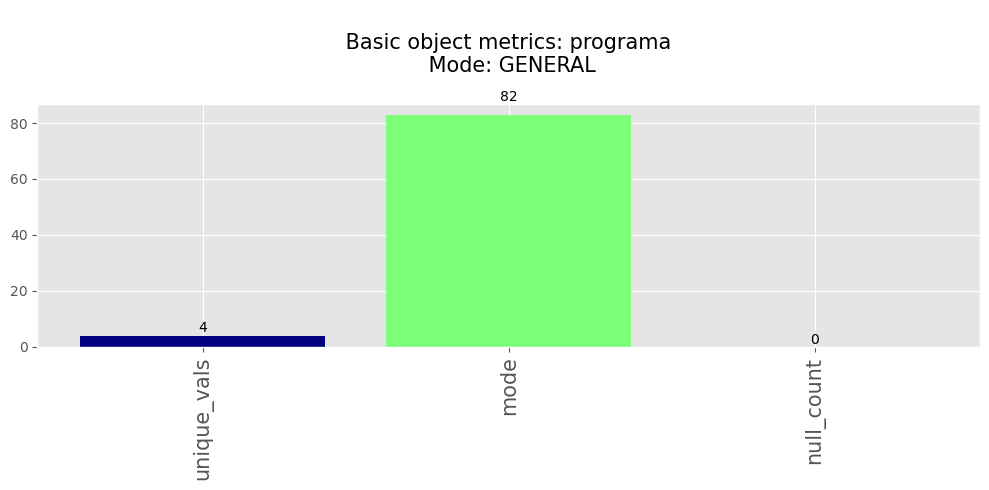

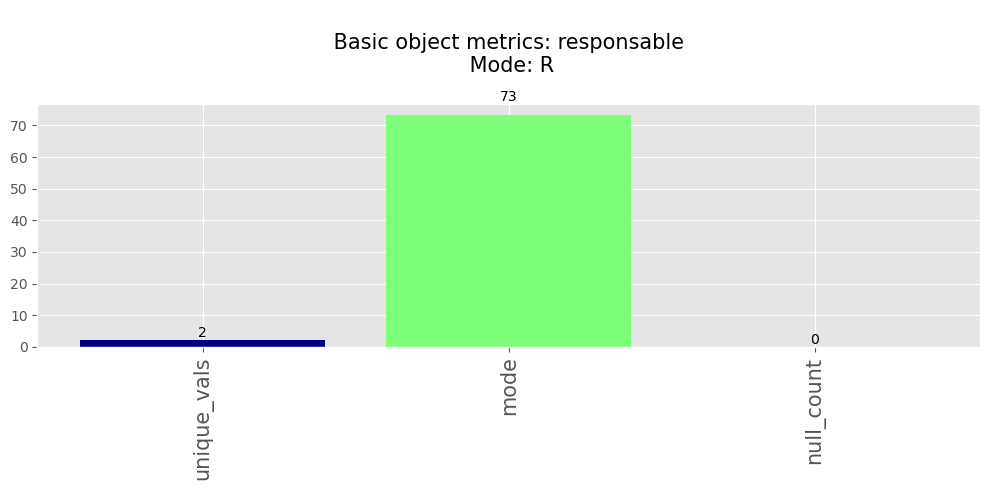

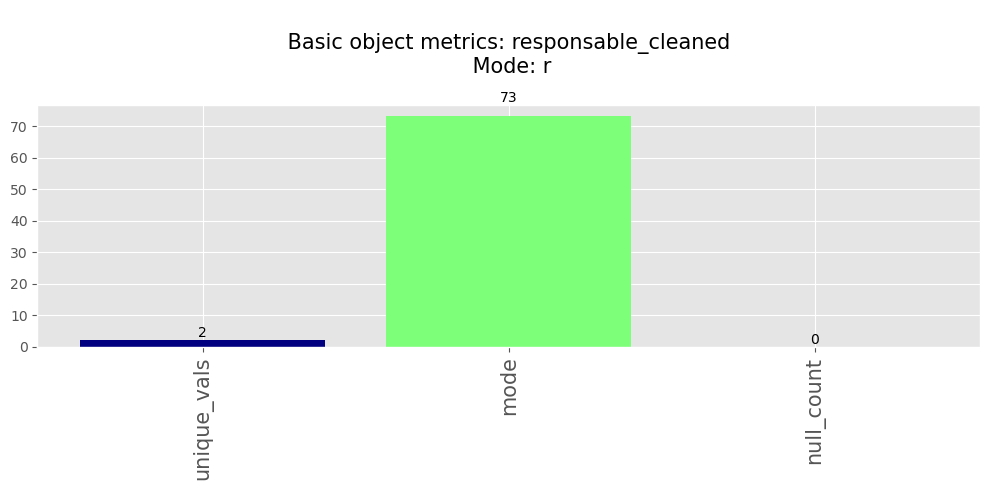

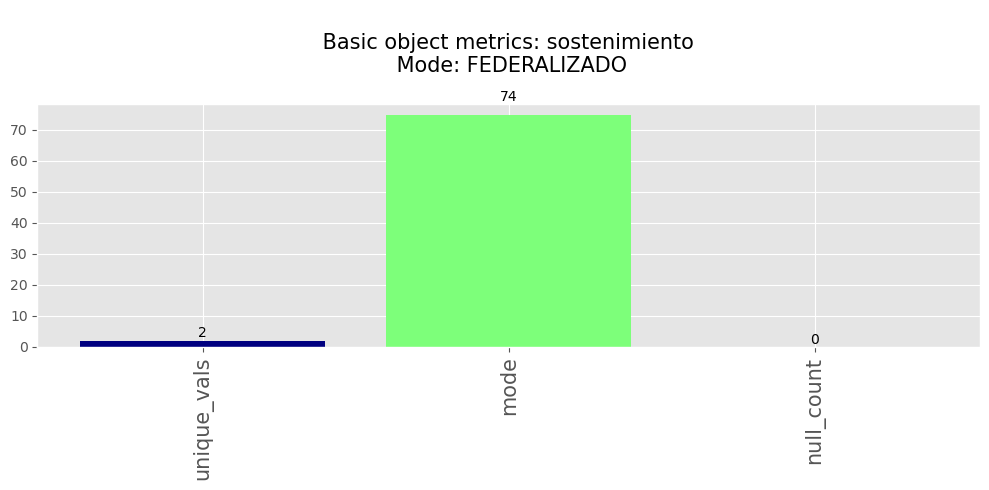

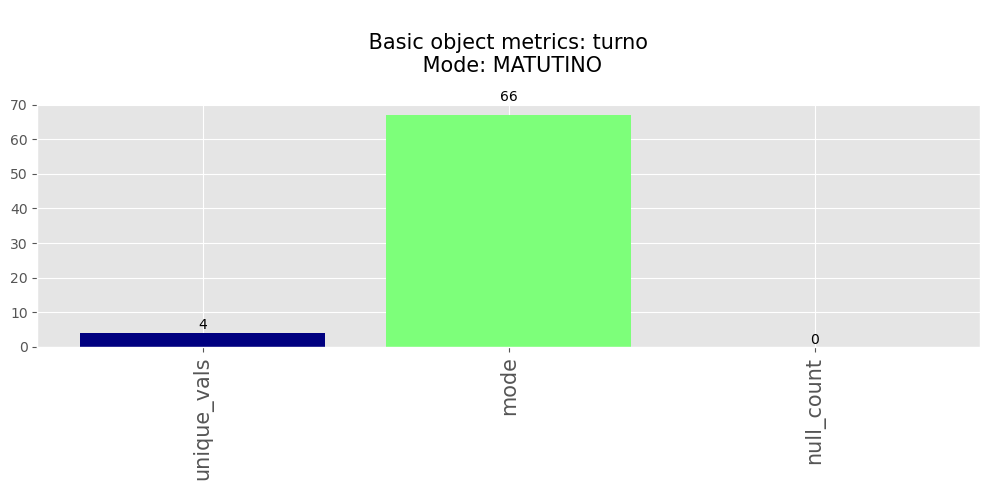

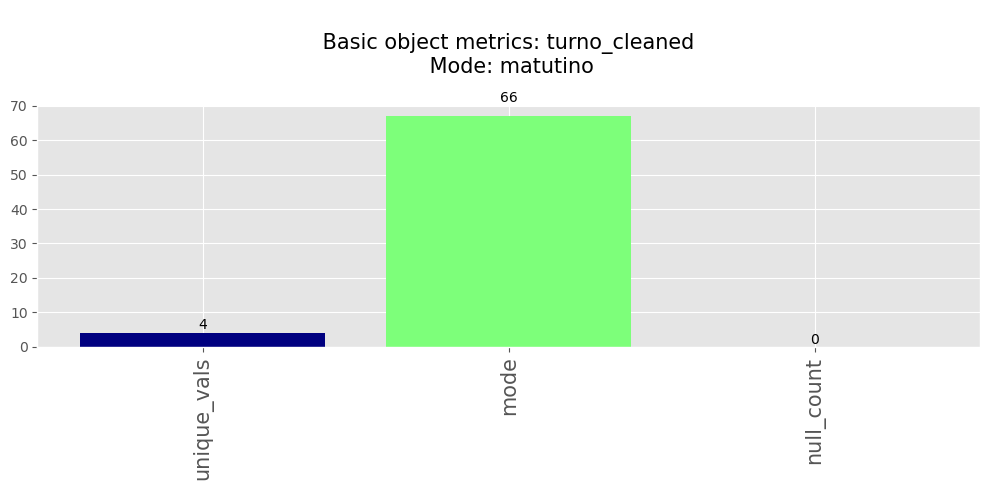

In [131]:
cat_stats = get_cat_stats(df)
plot_categorical(df, cat_stats)

##### Nuevas conclusiones antes del StoryTelling


## StoryTelling
Este concepto es muy sonado en empresas basadas en datos, de nada nos sirve los datos si no podemos describir qué tenemos en ellos. 

Ya hicimos conclusiones pero eso bien podría ser para un equipo de _data science_ o analítico (DS+BI), ¿qué pasa si presentamos nuestros datos? 

Hagamos unos ejemplos de agrupación y visualización con pandas y mapas. Para eso vamos a usar un nuevo mapa de los municipios del estado de Jalisco.

### Agrupación y medidas estadísticas
Supongamos que queremos hacer un análisis sencillo del promedio de alguna variable agrupada por turnos para ver si hay una diferencia entre el _performance_ de nuestros datos  a través de turnos educativos.

Referencias para el graficado de la dona: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py

In [132]:
# Definir a través de qué vamos a agrupar
grouper = ['turno']

In [133]:
# Definir qué variables vamos a medir
performers = ['docente', 'aulas_uso', 'eficiencia_terminal']

In [134]:
# Definir qué vamos a medirle a esas variables
stats = ['mean', 'std', 'count']

In [135]:
# Definir dict de métricas 
metrics = {v: stats for v in performers}
metrics

{'docente': ['mean', 'std', 'count'],
 'aulas_uso': ['mean', 'std', 'count'],
 'eficiencia_terminal': ['mean', 'std', 'count']}

In [136]:
magia_calculada = {v: stats for v in performers}
magia_calculada

{'docente': ['mean', 'std', 'count'],
 'aulas_uso': ['mean', 'std', 'count'],
 'eficiencia_terminal': ['mean', 'std', 'count']}

In [137]:
# Grafiquemos en una dona el promedio de los datos


Grafiquemos ahora un mapa con valores del estado

Alguna referencias (no usadas en este código, pero útiles para el proceso): https://towardsdatascience.com/mapping-with-matplotlib-pandas-geopandas-and-basemap-in-python-d11b57ab5dac


Initiating with .shp file reading over limitemunicipal_mgj2012_modificadodecreto26837 type of files.
Found file .shp: LimiteMunicipal_MGJ2012_modificadoDecreto26837.
Done with file seek over limitemunicipal_mgj2012_modificadodecreto26837.


C:\Users\hecto\AppData\Local\Temp\ipykernel_7592\403170049.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['municipio'].replace(ugly_dict, inplace=True)


<Axes: >

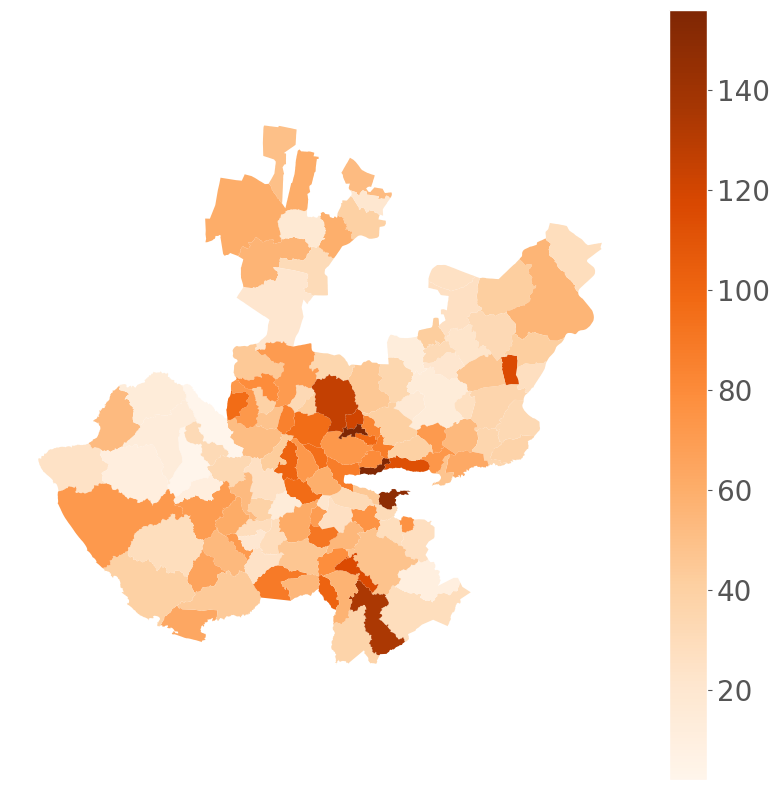

In [147]:
# Leyendo mapas
data = df.copy()
col = 'beneficiarios_alimentos_dif_2014_digit'
file_name = 'limitemunicipal_mgj2012_modificadodecreto26837'
jalisco = get_shp_files(basedir=basedir, object_type=file_name)
jalisco = jalisco[list(jalisco.keys())[0]]

# Limpiando los mapas de Jalisco
jalisco['NOMBRE'] = jalisco['NOMBRE'].apply(lambda x: unidecode.unidecode(x))

# Reemplazando algunos caracteres del mapa de Jalisco
ugly_dict = {'BOLAÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x91OS': 'BOLANOS',
        'CAÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x91ADAS DE OBREGON': 'CANADAS DE OBREGON',
        'SAN MARTIN DE BOLAÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x91OS': 'SAN MARTIN DE BOLANOS',
        'TLAJOMULCO DE ZUÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x91IGA': 'TLAJOMULCO DE ZUNIGA'}

df['municipio'].replace(ugly_dict, inplace=True)

# Merge
mean = df.groupby('municipio')[col].mean()
jalisco_merged = pd.merge(jalisco, mean, left_on='NOMBRE', right_index=True)

# Map
cmap = 'Oranges'

fig, ax = plt.subplots(figsize=(10,10))
ax.axis('off')

vmin, vmax = df[col].min(), df[col].max()
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, ax=ax)
cbar.ax.tick_params(labelsize = 20)

jalisco_merged.plot(col, cmap=cmap, ax=ax)